El tercer acercamiento se realiza con el archivo "230310_formaciones_oferta_724.csv", que tiene contiene 39.102 instancias (registros) con 47 características

02/03/2023 La Directora del proyecto SENA, decide realizar el análisis sobre los aprendices matriculados en la primera oferta Titulada Presencial 2018.

10/03/2023 Se recibe el archivo "230310_formaciones_oferta_724.csv"

-Identificación de archivo a procesar

-Cargue del archivo en Github

-Cargue del archivo desde Github

-Exploración de las caracteríticas del archivo

-Identificación de características

-Identificación de características categóricas y las características numéricas

-Exploración de valores en las características:

  *Faltantes

  *Únicos
-Identificación de posibles caracteríticas a desechar

-Identificación de estrategia para valores faltantes en las caracteríticas

Cargue del archivo desde github

In [ ]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
#https://drive.google.com/file/d/1flzdpualWKZrAtri3LvlOuAL0dgeFttj/view?usp=share_link

Cargue del conjunto de datos 230310_formaciones_oferta_724.csv en Pandas.

In [ ]:
#para leerlo desde github
df = pd.read_csv('https://raw.githubusercontent.com/armaacum/data/main/230310_formaciones_oferta_724.csv',encoding='latin1', sep = ';')


<ipython-input-342-b88df2a848d4>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/armaacum/data/main/230310_formaciones_oferta_724.csv',encoding='latin1', sep = ';')


Se exploran las caracteríticas del archivo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39102 entries, 0 to 39101
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NIS                       39102 non-null  int64  
 1   GENERO                    39102 non-null  object 
 2   FECHA_NACIMIENTO          39102 non-null  object 
 3   ESTADO_CIVIL              39102 non-null  object 
 4   ESTRATO                   39102 non-null  int64  
 5   PUNTAJE_ICFES             1906 non-null   object 
 6   NIVEL_SISBEN              6997 non-null   float64
 7   DBU_HIJOS                 115 non-null    float64
 8   COD_PAIS_RESIDENCIA       39102 non-null  int64  
 9   PAIS_RESIDENCIA           39102 non-null  object 
 10  COD_DPTO_RESIDENCIA       39102 non-null  int64  
 11  DPTO_RESIDENCIA           39102 non-null  object 
 12  COD_MUNICIPIO_RESIDENCIA  39102 non-null  int64  
 13  MUNICIPIO_RESIDENCIA      39102 non-null  object 
 14  COD_ZO

In [ ]:
df.shape

(39102, 47)

El archivo contiene 39102 intancias por 47 características

Se identifican los nombre de todas las características

In [ ]:
def check(data):
    l=[]
    columns=data.columns
    for col in columns:
        dtypes=data[col].dtypes
        nunique=data[col].nunique()
        sum_null=data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    res=pd.DataFrame(l)
    res.columns=['column','dtypes','nunique','sum_null']
    return res
check(df)

column   dtypes  nunique  sum_null
0                        NIS    int64    38054         0
1                     GENERO   object        2         0
2           FECHA_NACIMIENTO   object    10113         0
3               ESTADO_CIVIL   object        7         0
4                    ESTRATO    int64        6         0
5              PUNTAJE_ICFES   object      543     37196
6               NIVEL_SISBEN  float64        5     32105
7                  DBU_HIJOS  float64        3     38987
8        COD_PAIS_RESIDENCIA    int64       15         0
9            PAIS_RESIDENCIA   object       15         0
10       COD_DPTO_RESIDENCIA    int64       51         0
11           DPTO_RESIDENCIA   object       53         0
12  COD_MUNICIPIO_RESIDENCIA    int64      900         0
13      MUNICIPIO_RESIDENCIA   object      853         0
14       COD_ZONA_RESIDENCIA  float64      273     36321
15     COD_BARRIO_RESIDENCIA  float64     1245     36682
16             CODIGO_ESTADO    int64        9         0
17           ESTADO_APRENDIZ   object        9         0
18       COD_NIVEL_FORMACION    int64        6         0
19           NIVEL_FORMACION   object        6         0
20                 MODALIDAD   object        1         0
21              COD_PROGRAMA    int64      215         0
22           NOMBRE_PROGRAMA   object      215         0
23   CODIGO_RED_CONOCIMIENTO  float64       26     29138
24      NOM_RED_CONOCIMIENTO   object       26     29138
25     COD_LINEA_TECNOLÓGICA    int64        5         0
26     NOM_LINEA_TECNOLÓGICA   object        5         0
27  CÓDIGO_TECNOLOGÍA_DE_RED    int64       24         0
28  NOMBRE_TECNOLOGÍA_DE_RED   object       24         0
29           FICHA_NUM_CURSO    int64     1381         0
30           CÓDIGO_REGIONAL    int64       33         0
31           NOMBRE_REGIONAL   object       33         0
32             CÓDIGO_CENTRO    int64      110         0
33                      SEDE   object      103         0
34                      EDAD    int64       76         0
35     CÓDIGO_TIPO_POBLACIÓN  float64       41      2005
36     NOMBRE_TIPO_POBLACIÓN   object       41      2005
37       APOYO_SOSTNMTO_2018    int64        2         0
38       APOYO_SOSTNMTO_2019    int64        2         0
39       APOYO_SOSTNMTO_2020    int64        2         0
40       APOYO_SOSTNMTO_2021    int64        1         0
41       APOYO_SOSTNMTO_2022    int64        1         0
42       APOYO_SOSTNMTO_2023    int64        1         0
43            APOYO_FIC_2018    int64        2         0
44            APOYO_FIC_2019    int64        2         0
45            APOYO_FIC_2020    int64        2         0
46            APOYO_FIC_2021    int64        1         0

In [ ]:
columns = df.columns.values
columns

array(['NIS', 'GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'ESTRATO',
       'PUNTAJE_ICFES', 'NIVEL_SISBEN', 'DBU_HIJOS',
       'COD_PAIS_RESIDENCIA', 'PAIS_RESIDENCIA', 'COD_DPTO_RESIDENCIA',
       'DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA',
       'MUNICIPIO_RESIDENCIA', 'COD_ZONA_RESIDENCIA',
       'COD_BARRIO_RESIDENCIA', 'CODIGO_ESTADO', 'ESTADO_APRENDIZ',
       'COD_NIVEL_FORMACION', 'NIVEL_FORMACION', 'MODALIDAD',
       'COD_PROGRAMA', 'NOMBRE_PROGRAMA', 'CODIGO_RED_CONOCIMIENTO',
       'NOM_RED_CONOCIMIENTO', 'COD_LINEA_TECNOLÓGICA',
       'NOM_LINEA_TECNOLÓGICA', 'CÓDIGO_TECNOLOGÍA_DE_RED',
       'NOMBRE_TECNOLOGÍA_DE_RED', 'FICHA_NUM_CURSO', 'CÓDIGO_REGIONAL',
       'NOMBRE_REGIONAL', 'CÓDIGO_CENTRO', 'SEDE', 'EDAD',
       'CÓDIGO_TIPO_POBLACIÓN', 'NOMBRE_TIPO_POBLACIÓN',
       'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019',
       'APOYO_SOSTNMTO_2020', 'APOYO_SOSTNMTO_2021',
       'APOYO_SOSTNMTO_2022', 'APOYO_SOSTNMTO_2023', 'APOYO_FIC_2018',
       'APOYO_F

Se identifican las características categóricas y las características numéricas

In [ ]:
for t in columns:
  print(t, df[t].dtype)

NIS int64
GENERO object
FECHA_NACIMIENTO object
ESTADO_CIVIL object
ESTRATO int64
PUNTAJE_ICFES object
NIVEL_SISBEN float64
DBU_HIJOS float64
COD_PAIS_RESIDENCIA int64
PAIS_RESIDENCIA object
COD_DPTO_RESIDENCIA int64
DPTO_RESIDENCIA object
COD_MUNICIPIO_RESIDENCIA int64
MUNICIPIO_RESIDENCIA object
COD_ZONA_RESIDENCIA float64
COD_BARRIO_RESIDENCIA float64
CODIGO_ESTADO int64
ESTADO_APRENDIZ object
COD_NIVEL_FORMACION int64
NIVEL_FORMACION object
MODALIDAD object
COD_PROGRAMA int64
NOMBRE_PROGRAMA object
CODIGO_RED_CONOCIMIENTO float64
NOM_RED_CONOCIMIENTO object
COD_LINEA_TECNOLÓGICA int64
NOM_LINEA_TECNOLÓGICA object
CÓDIGO_TECNOLOGÍA_DE_RED int64
NOMBRE_TECNOLOGÍA_DE_RED object
FICHA_NUM_CURSO int64
CÓDIGO_REGIONAL int64
NOMBRE_REGIONAL object
CÓDIGO_CENTRO int64
SEDE object
EDAD int64
CÓDIGO_TIPO_POBLACIÓN float64
NOMBRE_TIPO_POBLACIÓN object
APOYO_SOSTNMTO_2018 int64
APOYO_SOSTNMTO_2019 int64
APOYO_SOSTNMTO_2020 int64
APOYO_SOSTNMTO_2021 int64
APOYO_SOSTNMTO_2022 int64
APOYO_SOSTNMT

In [ ]:
categoricos_col =[]
for t in columns:
  if df[t].dtype == 'object':
    categoricos_col.append(t)
categoricos_col


['GENERO',
 'FECHA_NACIMIENTO',
 'ESTADO_CIVIL',
 'PUNTAJE_ICFES',
 'PAIS_RESIDENCIA',
 'DPTO_RESIDENCIA',
 'MUNICIPIO_RESIDENCIA',
 'ESTADO_APRENDIZ',
 'NIVEL_FORMACION',
 'MODALIDAD',
 'NOMBRE_PROGRAMA',
 'NOM_RED_CONOCIMIENTO',
 'NOM_LINEA_TECNOLÓGICA',
 'NOMBRE_TECNOLOGÍA_DE_RED',
 'NOMBRE_REGIONAL',
 'SEDE',
 'NOMBRE_TIPO_POBLACIÓN']

In [ ]:
numericas_col=[]
for t in columns:
  if df[t].dtype == 'int64':
    numericas_col.append(t)
numericas_col

['NIS',
 'ESTRATO',
 'COD_PAIS_RESIDENCIA',
 'COD_DPTO_RESIDENCIA',
 'COD_MUNICIPIO_RESIDENCIA',
 'CODIGO_ESTADO',
 'COD_NIVEL_FORMACION',
 'COD_PROGRAMA',
 'COD_LINEA_TECNOLÓGICA',
 'CÓDIGO_TECNOLOGÍA_DE_RED',
 'FICHA_NUM_CURSO',
 'CÓDIGO_REGIONAL',
 'CÓDIGO_CENTRO',
 'EDAD',
 'APOYO_SOSTNMTO_2018',
 'APOYO_SOSTNMTO_2019',
 'APOYO_SOSTNMTO_2020',
 'APOYO_SOSTNMTO_2021',
 'APOYO_SOSTNMTO_2022',
 'APOYO_SOSTNMTO_2023',
 'APOYO_FIC_2018',
 'APOYO_FIC_2019',
 'APOYO_FIC_2020',
 'APOYO_FIC_2021']

In [ ]:
data=[]
for d in columns:
  w=df[d].unique()
  print("Cantidad de valores únicos en ",d, " = ",len(w))


Cantidad de valores únicos en  NIS  =  38054
Cantidad de valores únicos en  GENERO  =  2
Cantidad de valores únicos en  FECHA_NACIMIENTO  =  10113
Cantidad de valores únicos en  ESTADO_CIVIL  =  7
Cantidad de valores únicos en  ESTRATO  =  6
Cantidad de valores únicos en  PUNTAJE_ICFES  =  544
Cantidad de valores únicos en  NIVEL_SISBEN  =  6
Cantidad de valores únicos en  DBU_HIJOS  =  4
Cantidad de valores únicos en  COD_PAIS_RESIDENCIA  =  15
Cantidad de valores únicos en  PAIS_RESIDENCIA  =  15
Cantidad de valores únicos en  COD_DPTO_RESIDENCIA  =  51
Cantidad de valores únicos en  DPTO_RESIDENCIA  =  53
Cantidad de valores únicos en  COD_MUNICIPIO_RESIDENCIA  =  900
Cantidad de valores únicos en  MUNICIPIO_RESIDENCIA  =  853
Cantidad de valores únicos en  COD_ZONA_RESIDENCIA  =  274
Cantidad de valores únicos en  COD_BARRIO_RESIDENCIA  =  1246
Cantidad de valores únicos en  CODIGO_ESTADO  =  9
Cantidad de valores únicos en  ESTADO_APRENDIZ  =  9
Cantidad de valores únicos en  COD_

De acuerdo a los resultados anteriores se concluye que la caracterítica MODALIDAD tiene el mismo valor para todas las intancias, al no variar, no se tendrá en cuenta en el análisis.

In [ ]:
df.isnull().sum()

NIS                             0
GENERO                          0
FECHA_NACIMIENTO                0
ESTADO_CIVIL                    0
ESTRATO                         0
PUNTAJE_ICFES               37196
NIVEL_SISBEN                32105
DBU_HIJOS                   38987
COD_PAIS_RESIDENCIA             0
PAIS_RESIDENCIA                 0
COD_DPTO_RESIDENCIA             0
DPTO_RESIDENCIA                 0
COD_MUNICIPIO_RESIDENCIA        0
MUNICIPIO_RESIDENCIA            0
COD_ZONA_RESIDENCIA         36321
COD_BARRIO_RESIDENCIA       36682
CODIGO_ESTADO                   0
ESTADO_APRENDIZ                 0
COD_NIVEL_FORMACION             0
NIVEL_FORMACION                 0
MODALIDAD                       0
COD_PROGRAMA                    0
NOMBRE_PROGRAMA                 0
CODIGO_RED_CONOCIMIENTO     29138
NOM_RED_CONOCIMIENTO        29138
COD_LINEA_TECNOLÓGICA           0
NOM_LINEA_TECNOLÓGICA           0
CÓDIGO_TECNOLOGÍA_DE_RED        0
NOMBRE_TECNOLOGÍA_DE_RED        0
FICHA_NUM_CURS

In [ ]:
df["NIS"].value_counts()

NIS
26206428    4
26160318    4
25775421    4
26104737    4
24361021    4
           ..
26208492    1
20899019    1
25238026    1
26221573    1
14218541    1
Name: count, Length: 38054, dtype: int64

In [ ]:
frecuencia = df["NIS"].value_counts()
total_valores = len(df["NIS"])
for NIS, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 3 :
      print(f"NIS: {NIS}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

NIS: 26206428, Frecuencia: 4, Porcentaje: 0.01%
NIS: 26160318, Frecuencia: 4, Porcentaje: 0.01%
NIS: 25775421, Frecuencia: 4, Porcentaje: 0.01%
NIS: 26104737, Frecuencia: 4, Porcentaje: 0.01%
NIS: 24361021, Frecuencia: 4, Porcentaje: 0.01%
NIS: 26039723, Frecuencia: 4, Porcentaje: 0.01%


In [ ]:
df["GENERO"].value_counts()

GENERO
F    20044
M    19058
Name: count, dtype: int64

In [ ]:
frecuencia = df["GENERO"].value_counts()
total_valores = len(df["GENERO"])
for GENERO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"GENERO: {GENERO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

GENERO: F, Frecuencia: 20044, Porcentaje: 51.26%
GENERO: M, Frecuencia: 19058, Porcentaje: 48.74%


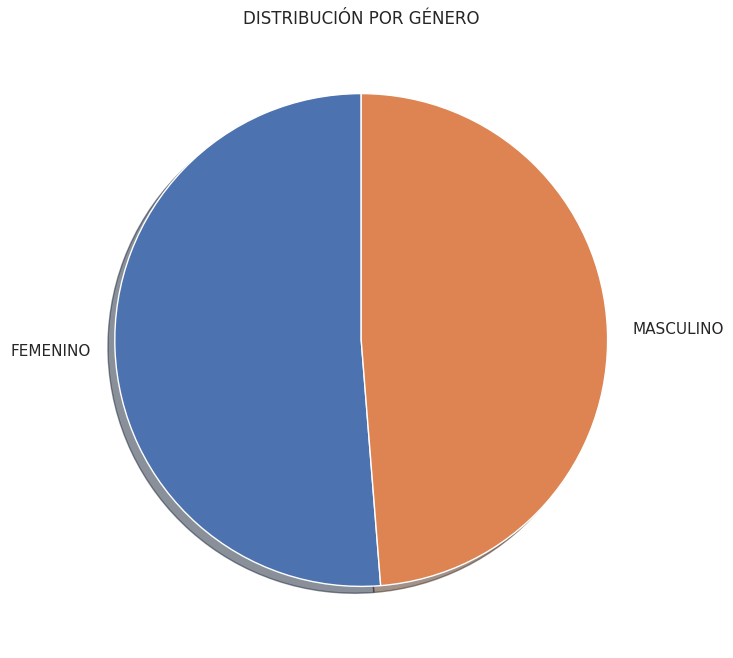

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('DISTRIBUCIÓN POR GÉNERO')
ay = df["GENERO"].value_counts()
mylabels = ["FEMENINO", "MASCULINO"]
plt.pie(ay, labels = mylabels, startangle = 90, shadow = True)
plt.show()

In [ ]:
print("FEMENINO  {:.2f} %".format(df.apply(lambda x: x['GENERO'] == 'F', axis=1).sum() / len(df) *100))
print("MASCULINO {:.2f} %".format(df.apply(lambda x: x['GENERO'] == 'M', axis=1).sum() / len(df) *100))

FEMENINO  51.26 %
MASCULINO 48.74 %


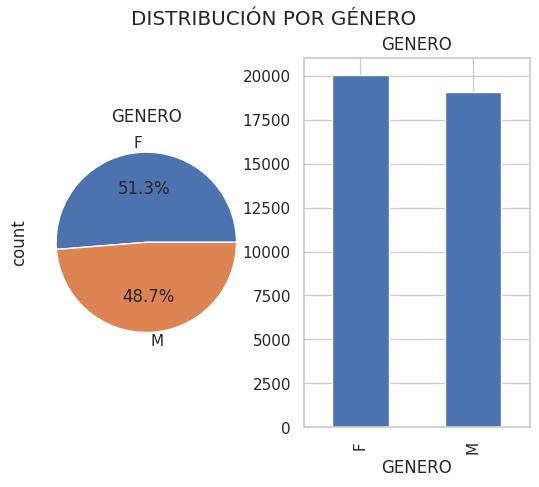

In [ ]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA GENERO
genero = df["GENERO"].value_counts()
plt.subplot(1,2,1)
genero.plot(kind="pie", autopct='%1.01f%%')
plt.title("GENERO")
#plt.suptitle("suptitle")

plt.subplot(1,2,2)
genero.plot(kind="bar")
plt.title("GENERO")
plt.suptitle("DISTRIBUCIÓN POR GÉNERO")
plt.show()

In [ ]:
print("Número de valores únicos: ",len(df["FECHA_NACIMIENTO"].unique()))

Número de valores únicos:  10113


In [ ]:
print("Número de valores únicos: ",len(df["FECHA_NACIMIENTO"].str.slice(6, 10).unique()))

Número de valores únicos:  133


In [ ]:
df["FECHA_NACIMIENTO"].str.slice(6, 10)

0        1998
1        2001
2        1974
3        1978
4        1999
         ... 
39097    1972
39098    1977
39099    1999
39100    1979
39101    2000
Name: FECHA_NACIMIENTO, Length: 39102, dtype: object

In [ ]:
frecuencia = df["FECHA_NACIMIENTO"].value_counts()
total_valores = len(df["FECHA_NACIMIENTO"])
for FECHA_NACIMIENTO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"FECHA_NACIMIENTO: {FECHA_NACIMIENTO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

Se han truncado las últimas 5000 líneas del flujo de salida.
FECHA_NACIMIENTO: 12/06/1978, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 27/05/1987, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 19/01/1996, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 8/10/1995, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 5/09/1970, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 11/05/1989, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 11/02/1989, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 17/07/1992, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 12/07/1985, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 19/01/1984, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 3/03/1991, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 4/02/1991, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 11/02/1967, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 26/05/1965, Frecuencia: 2, Porcentaje: 0.01%
FECHA_NACIMIENTO: 15/12/1987, Frecuencia: 2, Porcentaje: 0.01

In [ ]:
#Estado civil del usuario. Valores de chequeo: V - Viudo; E - Separado ; U - Unión Libre ; C - Casado; S - Soltero; I - Indiferente ,  N No Ingresado
df["ESTADO_CIVIL"].value_counts()

ESTADO_CIVIL
S    20606
N     9016
U     4310
I     2562
C     2234
E      317
V       57
Name: count, dtype: int64

In [ ]:
df["ESTADO_CIVIL"].unique()

array(['N', 'S', 'U', 'I', 'C', 'E', 'V'], dtype=object)

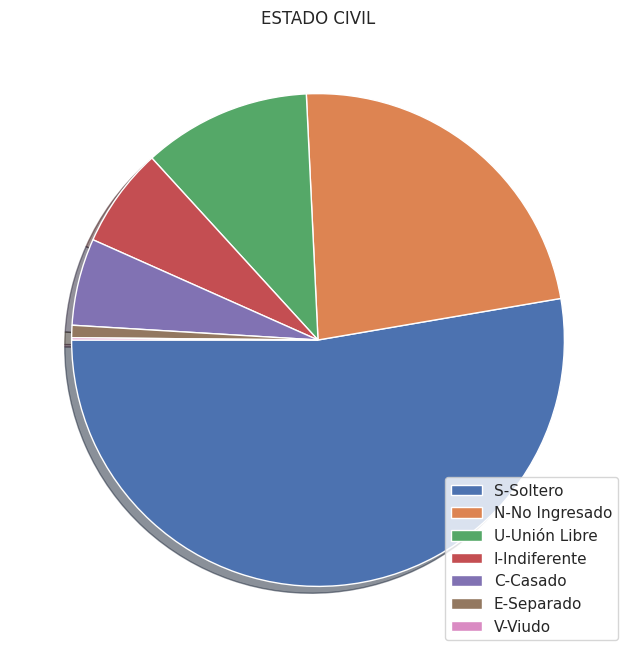

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('ESTADO CIVIL')
ay = df["ESTADO_CIVIL"].value_counts()
#mylabels = df["ESTADO_CIVIL"].unique() #["V-Viudo", "E-Separado", "U-Unión Libre", "C-Casado", "S-Soltero", "I-Indiferente", "N-No Ingresado"]
mylabels = ["S-Soltero","N-No Ingresado", "U-Unión Libre","I-Indiferente" ,"C-Casado","E-Separado","V-Viudo"]
plt.pie(df["ESTADO_CIVIL"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

In [ ]:
print("SOLTERO  {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'S', axis=1).sum() / len(df) *100))
print("UNION LIBRE {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'U', axis=1).sum() / len(df) *100))
print("CASADO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'C', axis=1).sum() / len(df) *100))
print("VIUDO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'V', axis=1).sum() / len(df) *100))
print("SEPARADO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'E', axis=1).sum() / len(df) *100))
print("INDIFERENTE {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'I', axis=1).sum() / len(df) *100))
print("NO INGRESADO {:.2f} %".format(df.apply(lambda x: x['ESTADO_CIVIL'] == 'N', axis=1).sum() / len(df) *100))


SOLTERO  52.70 %
UNION LIBRE 11.02 %
CASADO 5.71 %
VIUDO 0.15 %
SEPARADO 0.81 %
INDIFERENTE 6.55 %
NO INGRESADO 23.06 %


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR ESTADO CIVIL'}, xlabel='ESTADO_CIVIL', ylabel='No. DE APRENDICES'>

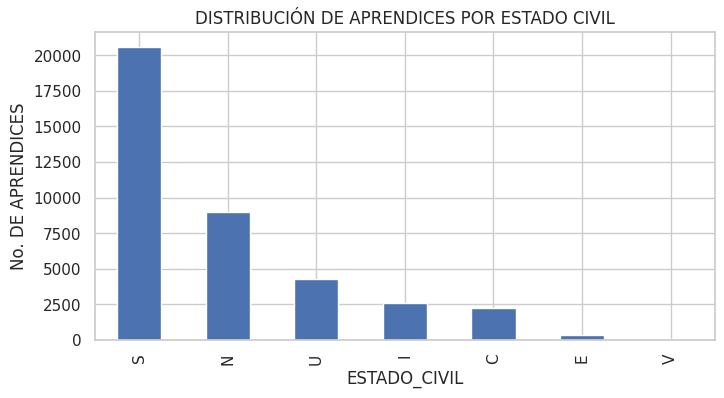

In [ ]:
plt.xlabel("ESTADO_CIVIL")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTADO CIVIL")
df["ESTADO_CIVIL"].value_counts().plot(kind='bar', figsize=(8,4))

Análisis ESTRATO

In [ ]:
#Estado civil del usuario. Valores de chequeo: V - Viudo; E - Separado ; U - Unión Libre ; C - Casado; S - Soltero; I - Indiferente ,  N No Ingresado
df["ESTRATO"].value_counts()

ESTRATO
1    19781
2    14611
3     4422
4      238
5       38
6       12
Name: count, dtype: int64

In [ ]:
df["ESTRATO"].unique()

array([2, 4, 3, 1, 5, 6])

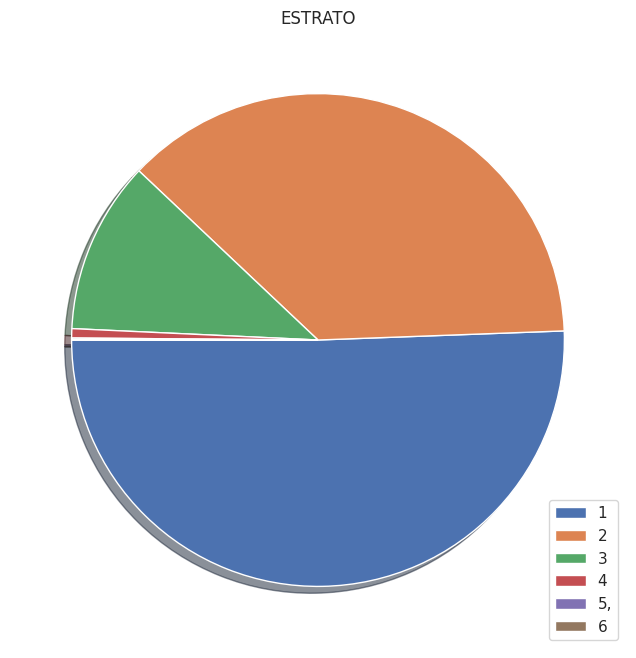

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('ESTRATO')
ay = df["ESTRATO"].value_counts()
mylabels = ['1', '2', '3', '4', '5,', '6']
plt.pie(df["ESTRATO"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR ESTRATO'}, xlabel='ESTRATO', ylabel='No. DE APRENDICES'>

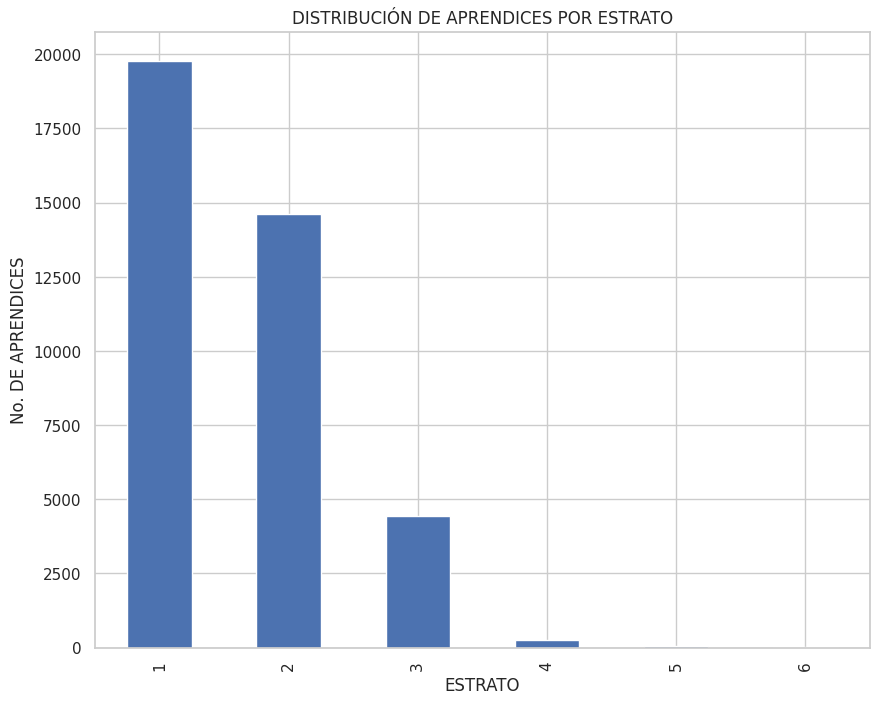

In [ ]:
plt.xlabel("ESTRATO")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTRATO")
df["ESTRATO"].value_counts().plot(kind='bar', figsize=(10,8))

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR ESTRATO'}, ylabel='ESTRATO'>

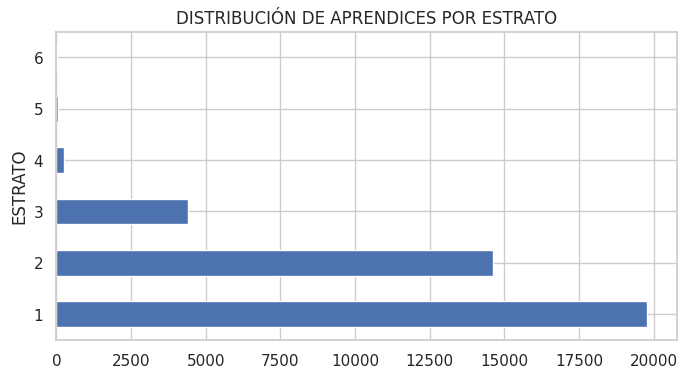

In [ ]:
plt.xlabel("ESTRATO")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTRATO")
df["ESTRATO"].value_counts().plot(kind='barh', figsize=(8,4))

In [ ]:
frecuencia = df["ESTRATO"].value_counts()
total_valores = len(df["ESTRATO"])
for ESTRATO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"ESTRATO: {ESTRATO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

ESTRATO: 1, Frecuencia: 19781, Porcentaje: 50.59%
ESTRATO: 2, Frecuencia: 14611, Porcentaje: 37.37%
ESTRATO: 3, Frecuencia: 4422, Porcentaje: 11.31%
ESTRATO: 4, Frecuencia: 238, Porcentaje: 0.61%
ESTRATO: 5, Frecuencia: 38, Porcentaje: 0.10%
ESTRATO: 6, Frecuencia: 12, Porcentaje: 0.03%


PUNTAJE ICFES

In [ ]:
df["PUNTAJE_ICFES"].value_counts()

PUNTAJE_ICFES
45      29
250     24
298     21
300     19
49      19
        ..
208      1
452      1
422      1
203      1
66.0     1
Name: count, Length: 543, dtype: int64

In [ ]:
df["PUNTAJE_ICFES"].isnull().sum()

37196

In [ ]:
ICFES = df['PUNTAJE_ICFES'].str.replace(',', '.')
ICFES = ICFES.astype(float)

In [ ]:
print("Valor máximo de FCH_REGISTRO:", ICFES.max())
print("Valor mínimo de FCH_REGISTRO:", ICFES.min())

Valor máximo de FCH_REGISTRO: 999.0
Valor mínimo de FCH_REGISTRO: 2.0


NIVEL_SISBEN

In [ ]:
df["NIVEL_SISBEN"].value_counts()

NIVEL_SISBEN
1.0    3205
2.0    2138
6.0    1127
3.0     523
4.0       4
Name: count, dtype: int64

In [ ]:
df["NIVEL_SISBEN"].unique()

array([nan,  1.,  2.,  6.,  3.,  4.])

In [ ]:
df["NIVEL_SISBEN"].isnull().sum()

32105

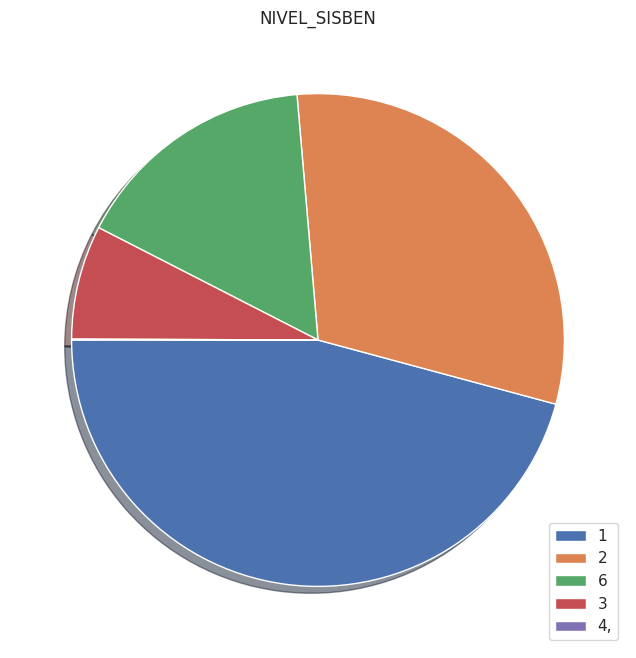

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('NIVEL_SISBEN')
ay = df["NIVEL_SISBEN"].value_counts()
mylabels = ['1', '2', '6', '3', '4,', 'nan']
plt.pie(df["NIVEL_SISBEN"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

DBU_HIJOS

In [ ]:
df["DBU_HIJOS"].value_counts()

DBU_HIJOS
0.0    94
1.0    14
2.0     7
Name: count, dtype: int64

In [ ]:
df["DBU_HIJOS"].unique()

array([nan,  0.,  1.,  2.])

In [ ]:
print("Cantidad de nulos: ", df["DBU_HIJOS"].isnull().sum(), "  y  corresponde al ", df["DBU_HIJOS"].isnull().sum()/len(df["DBU_HIJOS"]) *100, " %")

Cantidad de nulos:  38987   y  corresponde al  99.7058973965526  %


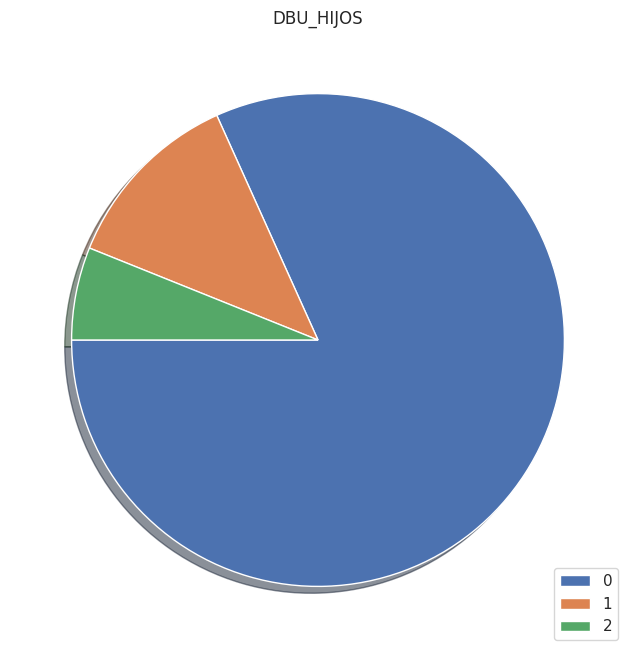

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('DBU_HIJOS')
ay = df["DBU_HIJOS"].value_counts()
mylabels = ['0', '1', '2', 'nan']
plt.pie(df["DBU_HIJOS"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR NÚMERO DE HIJOS'}, xlabel='DBU_HIJOS', ylabel='No. DE APRENDICES'>

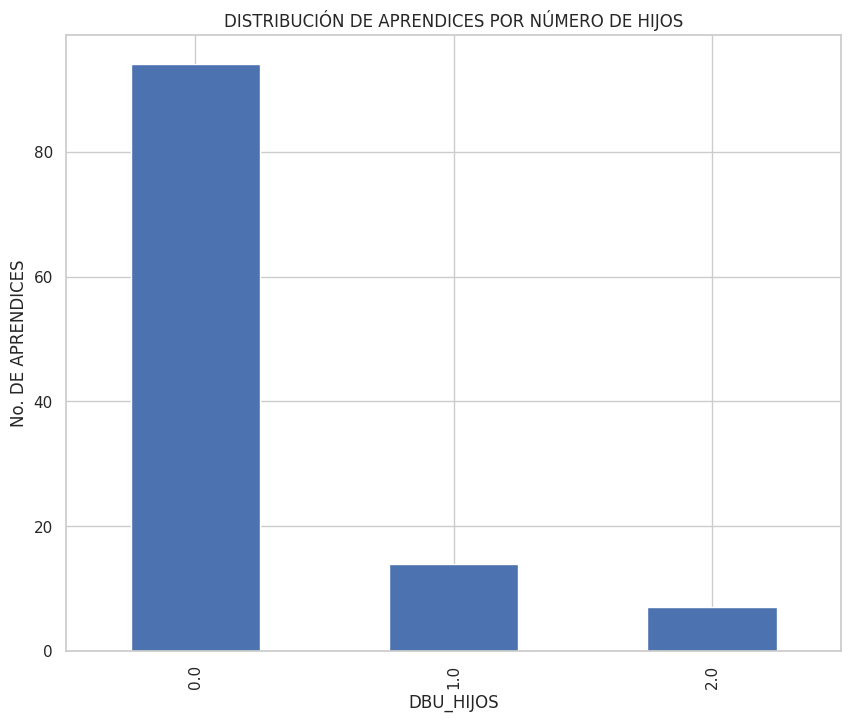

In [ ]:
plt.xlabel("NÚMERO DE HIJOS")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR NÚMERO DE HIJOS")
df["DBU_HIJOS"].value_counts().plot(kind='bar', figsize=(10,8))

COD_PAIS_RESIDENCIA

In [ ]:
df["COD_PAIS_RESIDENCIA"].value_counts()

COD_PAIS_RESIDENCIA
57     39078
58         6
34         4
56         3
147        1
351        1
39         1
32         1
51         1
61         1
49         1
593        1
54         1
40         1
52         1
Name: count, dtype: int64

In [ ]:
df["COD_PAIS_RESIDENCIA"].unique()

array([ 57, 147, 351,  39,  32,  58,  51,  61,  49,  56, 593,  54,  34,
        40,  52])

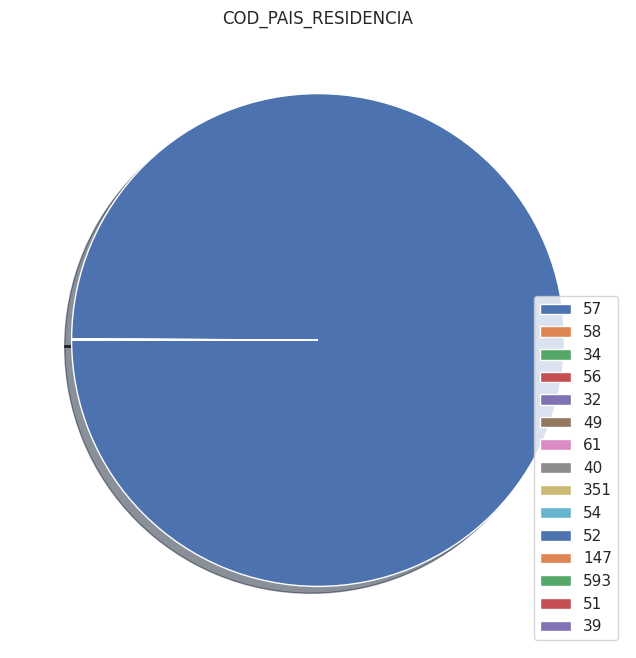

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('COD_PAIS_RESIDENCIA')
ay = df["COD_PAIS_RESIDENCIA"].value_counts()
mylabels = [57,  58,  34,  56,  32, 49, 61,  40, 351,  54,  52, 147, 593,
        51,  39]
plt.pie(df["COD_PAIS_RESIDENCIA"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR PAIS DE RESIDENCIA'}, ylabel='COD_PAIS_RESIDENCIA'>

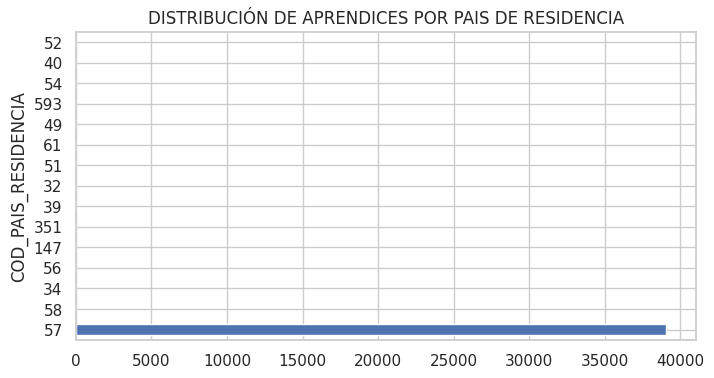

In [ ]:
plt.xlabel("PAIS DE RESIDENCIA")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR PAIS DE RESIDENCIA")
df["COD_PAIS_RESIDENCIA"].value_counts().plot(kind='barh',  figsize=(8,4))

In [ ]:
df["PAIS_RESIDENCIA"].unique()

array(['COLOMBIA', 'ESTADOS UNIDOS', 'PORTUGAL', 'ITALIA', 'BÉLGICA',
       'VENEZUELA', 'PERÚ', 'AUSTRALIA', 'ALEMANIA', 'CHILE', 'ECUADOR',
       'ARGENTINA', 'ESPAÑA', 'RUMANIA', 'MÉXICO'], dtype=object)

In [ ]:
frecuencia = df["PAIS_RESIDENCIA"].value_counts()
total_valores = len(df["PAIS_RESIDENCIA"])
for PAIS_RESIDENCIA, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"PAIS_RESIDENCIA: {PAIS_RESIDENCIA}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

PAIS_RESIDENCIA: COLOMBIA, Frecuencia: 39078, Porcentaje: 99.94%
PAIS_RESIDENCIA: VENEZUELA, Frecuencia: 6, Porcentaje: 0.02%
PAIS_RESIDENCIA: ESPAÑA, Frecuencia: 4, Porcentaje: 0.01%
PAIS_RESIDENCIA: CHILE, Frecuencia: 3, Porcentaje: 0.01%
PAIS_RESIDENCIA: ESTADOS UNIDOS, Frecuencia: 1, Porcentaje: 0.00%
PAIS_RESIDENCIA: PORTUGAL, Frecuencia: 1, Porcentaje: 0.00%
PAIS_RESIDENCIA: ITALIA, Frecuencia: 1, Porcentaje: 0.00%
PAIS_RESIDENCIA: BÉLGICA, Frecuencia: 1, Porcentaje: 0.00%
PAIS_RESIDENCIA: PERÚ, Frecuencia: 1, Porcentaje: 0.00%
PAIS_RESIDENCIA: AUSTRALIA, Frecuencia: 1, Porcentaje: 0.00%
PAIS_RESIDENCIA: ALEMANIA, Frecuencia: 1, Porcentaje: 0.00%
PAIS_RESIDENCIA: ECUADOR, Frecuencia: 1, Porcentaje: 0.00%
PAIS_RESIDENCIA: ARGENTINA, Frecuencia: 1, Porcentaje: 0.00%
PAIS_RESIDENCIA: RUMANIA, Frecuencia: 1, Porcentaje: 0.00%
PAIS_RESIDENCIA: MÉXICO, Frecuencia: 1, Porcentaje: 0.00%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR PAIS DE RESIDENCIA'}, xlabel='PAIS_RESIDENCIA', ylabel='No. DE APRENDICES'>

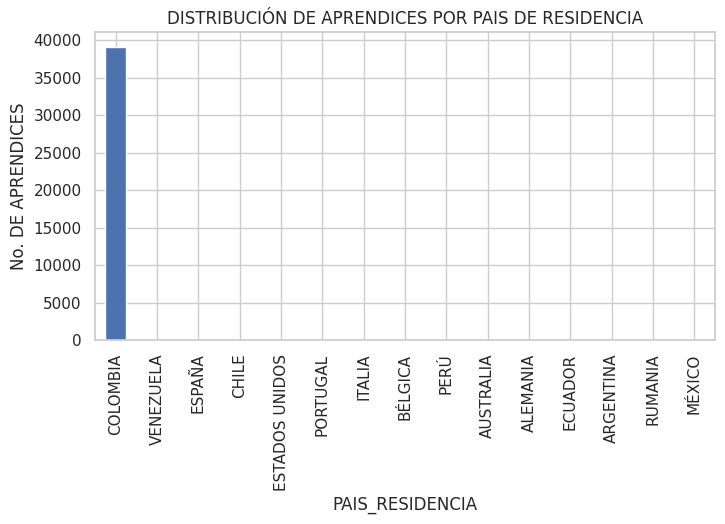

In [ ]:
plt.xlabel("PAIS DE RESIDENCIA")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR PAIS DE RESIDENCIA")
df["PAIS_RESIDENCIA"].value_counts().plot(kind='bar',  figsize=(8,4))

COD_DPTO_RESIDENCIA

In [ ]:
df["COD_DPTO_RESIDENCIA"].value_counts()

COD_DPTO_RESIDENCIA
57011     9208
57005     3953
57025     3793
57068     1979
57008     1801
57023     1551
57054     1444
57076     1409
57013     1404
57015     1274
57086     1040
57047      886
57041      868
57066      848
57085      828
57063      817
57050      746
57073      732
57052      616
57027      592
57070      588
57019      470
57017      438
57081      398
57018      379
57095      204
57044      186
57094      171
57020      155
57099      103
57088       85
57097       68
57091       44
58019        5
34051        3
56013        1
56004        1
40041        1
34046        1
56009        1
54008        1
593020       1
51013        1
58003        1
49010        1
61006        1
32001        1
39070        1
351015       1
147013       1
52008        1
Name: count, dtype: int64

In [ ]:
df["COD_DPTO_RESIDENCIA"].unique()

array([ 57011,  57044,  57025,  57013,  57023,  57020,  57047,  57015,
        57085,  57068,  57005,  57081,  57050,  57008,  57088,  57019,
        57054,  57073,  57017,  57063,  57076,  57052,  57041,  57066,
        57070,  57095,  57018,  57099,  57086,  57027, 147013,  57094,
       351015,  39070,  57091,  32001,  57097,  58019,  51013,  61006,
        49010,  58003,  56013, 593020,  54008,  56009,  34046,  34051,
        40041,  56004,  52008])

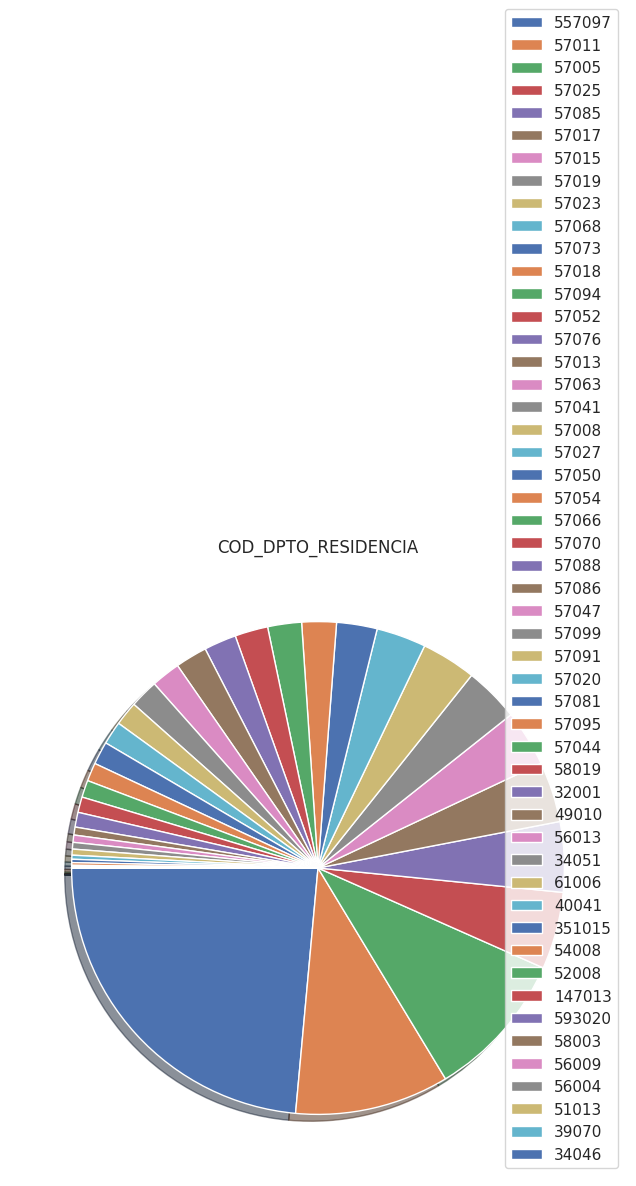

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('COD_DPTO_RESIDENCIA')
ay = df["COD_DPTO_RESIDENCIA"].value_counts()
mylabels = [557097,  57011,  57005,  57025,  57085,  57017,  57015,  57019,
        57023,  57068,  57073,  57018,  57094,  57052,  57076,  57013,
        57063,  57041,  57008,  57027,  57050,  57054,  57066,  57070,
        57088,  57086,  57047,  57099,  57091,  57020,  57081,  57095,
        57044,  58019,  32001,  49010,  56013,  34051,  61006,  40041,
       351015,  54008,  52008, 147013, 593020,  58003,  56009,  56004,
        51013,  39070,  34046]
plt.pie(df["COD_DPTO_RESIDENCIA"].value_counts(),  startangle = 180,shadow = True)
plt.legend(mylabels, loc='lower right',)
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR DPTO DE RESIDENCIA'}, xlabel='COD_DPTO_RESIDENCIA', ylabel='No. DE APRENDICES'>

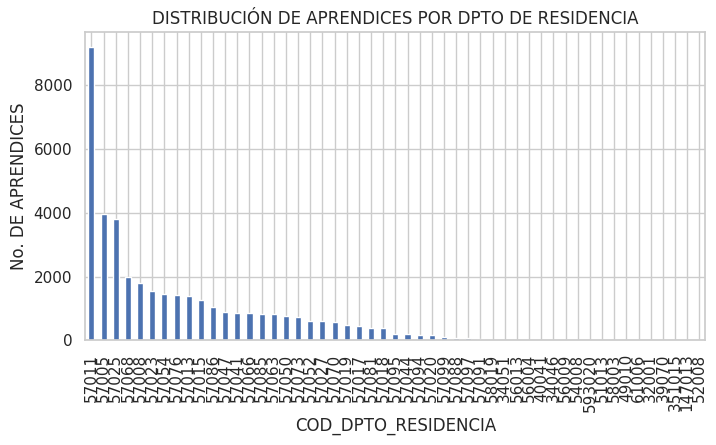

In [ ]:
plt.xlabel("DEPARTAMENTO DE RESIDENCIA")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR DPTO DE RESIDENCIA")
df["COD_DPTO_RESIDENCIA"].value_counts().plot(kind='bar',  figsize=(8,4))

In [ ]:
df["DPTO_RESIDENCIA"].value_counts()

DPTO_RESIDENCIA
BOGOTÁ D.C.                         9208
ANTIOQUIA                           3953
CUNDINAMARCA                        3793
SANTANDER                           1979
ATLÁNTICO                           1801
CÓRDOBA                             1551
NORTE DE SANTANDER                  1444
VALLE DEL CAUCA                     1409
BOLÍVAR                             1404
BOYACÁ                              1274
PUTUMAYO                            1039
MAGDALENA                            885
HUILA                                868
RISARALDA                            848
CASANARE                             828
QUINDÍO                              817
META                                 746
TOLIMA                               732
NARIÑO                               616
CHOCÓ                                592
SUCRE                                588
CAUCA                                470
CALDAS                               438
ARAUCA                               398


In [ ]:
df["DPTO_RESIDENCIA"].unique()

array(['BOGOTÁ D.C.', 'LA GUAJIRA', 'CUNDINAMARCA', 'BOLÍVAR', 'CÓRDOBA',
       'CESAR', 'MAGDALENA', 'BOYACÁ', 'CASANARE', 'SANTANDER',
       'ANTIOQUIA', 'ARAUCA', 'META', 'ATLÁNTICO',
       'SAN ANDRÉS Y PROVIDENCIA', 'CAUCA', 'NORTE DE SANTANDER',
       'TOLIMA', 'CALDAS', 'QUINDÍO', 'VALLE DEL CAUCA', 'NARIÑO',
       'HUILA', 'RISARALDA', 'SUCRE', 'GUAVIARE', 'CAQUETÁ', 'VICHADA',
       'PUTUMAYO', 'CHOCÓ', 'FLORIDA', 'GUAINÍA', 'SETÚBAL', 'ANCONA',
       'AMAZONAS', 'BRUSELAS', 'VAUPÉS', 'TÁCHIRA', 'LIMA', 'PUTUMAYO ',
       'VICTORIA', 'RENANIA SEPTENTRIONAL-WESTFALIA', 'APURE',
       'REGIÓN METROPOLITANA DE SANTIAGO', 'MAGDALENA ', 'PICHINCHA',
       'DISTRITO FEDERAL', 'IX LA ARAUCANÍA', 'A CORUÑA', 'MADRID',
       'BUCAREST', 'IV COQUIMBO', 'DURANGO'], dtype=object)

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR DPTO DE RESIDENCIA'}, xlabel='DPTO_RESIDENCIA', ylabel='No. DE APRENDICES'>

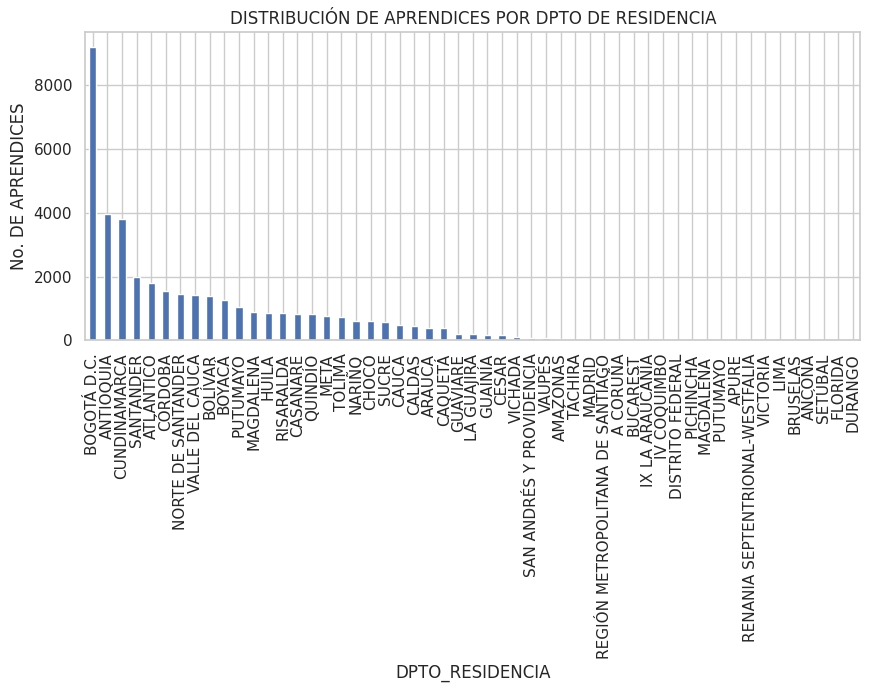

In [ ]:
plt.xlabel("DEPARTAMENTO DE RESIDENCIA")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR DPTO DE RESIDENCIA")
df["DPTO_RESIDENCIA"].value_counts().plot(kind='bar',  figsize=(10,4))

Identificación de valores nan en todas las características:

In [ ]:
frecuencia = df["DPTO_RESIDENCIA"].value_counts()
total_valores = len(df["DPTO_RESIDENCIA"])
for DPTO_RESIDENCIA, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"DPTO_RESIDENCIA: {DPTO_RESIDENCIA}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

DPTO_RESIDENCIA: BOGOTÁ D.C., Frecuencia: 9208, Porcentaje: 23.55%
DPTO_RESIDENCIA: ANTIOQUIA, Frecuencia: 3953, Porcentaje: 10.11%
DPTO_RESIDENCIA: CUNDINAMARCA, Frecuencia: 3793, Porcentaje: 9.70%
DPTO_RESIDENCIA: SANTANDER, Frecuencia: 1979, Porcentaje: 5.06%
DPTO_RESIDENCIA: ATLÁNTICO, Frecuencia: 1801, Porcentaje: 4.61%
DPTO_RESIDENCIA: CÓRDOBA, Frecuencia: 1551, Porcentaje: 3.97%
DPTO_RESIDENCIA: NORTE DE SANTANDER, Frecuencia: 1444, Porcentaje: 3.69%
DPTO_RESIDENCIA: VALLE DEL CAUCA, Frecuencia: 1409, Porcentaje: 3.60%
DPTO_RESIDENCIA: BOLÍVAR, Frecuencia: 1404, Porcentaje: 3.59%
DPTO_RESIDENCIA: BOYACÁ, Frecuencia: 1274, Porcentaje: 3.26%
DPTO_RESIDENCIA: PUTUMAYO, Frecuencia: 1039, Porcentaje: 2.66%
DPTO_RESIDENCIA: MAGDALENA, Frecuencia: 885, Porcentaje: 2.26%
DPTO_RESIDENCIA: HUILA, Frecuencia: 868, Porcentaje: 2.22%
DPTO_RESIDENCIA: RISARALDA, Frecuencia: 848, Porcentaje: 2.17%
DPTO_RESIDENCIA: CASANARE, Frecuencia: 828, Porcentaje: 2.12%
DPTO_RESIDENCIA: QUINDÍO, Frecuenci

In [ ]:
df["COD_MUNICIPIO_RESIDENCIA"].value_counts()

COD_MUNICIPIO_RESIDENCIA
57011001    9208
57005001    1702
57013001    1068
57025754     947
57008001     912
            ... 
57041676       1
57073067       1
57005237       1
57005873       1
57068720       1
Name: count, Length: 900, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["COD_MUNICIPIO_RESIDENCIA"].unique()))

Número de valores únicos:  900


In [ ]:
frecuencia = df["COD_MUNICIPIO_RESIDENCIA"].value_counts()
total_valores = len(df["COD_MUNICIPIO_RESIDENCIA"])
for municipio, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo >= 500:
      print(f"Municipio: {municipio}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

Municipio: 57011001, Frecuencia: 9208, Porcentaje: 23.55%
Municipio: 57005001, Frecuencia: 1702, Porcentaje: 4.35%
Municipio: 57013001, Frecuencia: 1068, Porcentaje: 2.73%
Municipio: 57025754, Frecuencia: 947, Porcentaje: 2.42%
Municipio: 57008001, Frecuencia: 912, Porcentaje: 2.33%
Municipio: 57076001, Frecuencia: 696, Porcentaje: 1.78%
Municipio: 57054001, Frecuencia: 590, Porcentaje: 1.51%
Municipio: 57063001, Frecuencia: 536, Porcentaje: 1.37%


In [ ]:
df["MUNICIPIO_RESIDENCIA"].value_counts()

MUNICIPIO_RESIDENCIA
BOGOTÁ                   9208
MEDELLÍN                 1702
CARTAGENA                1068
SOACHA                    947
BARRANQUILLA              912
                         ... 
REMOLINO                    1
ANGELOPOLIS                 1
TAMALAMEQUE                 1
LA FLORIDA                  1
SANTA HELENA DEL OPÓN       1
Name: count, Length: 853, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["MUNICIPIO_RESIDENCIA"].unique()))

Número de valores únicos:  853


In [ ]:
frecuencia = df["MUNICIPIO_RESIDENCIA"].value_counts()
total_valores = len(df["MUNICIPIO_RESIDENCIA"])
for municipio, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo >= 400:
      print(f"Municipio: {municipio}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

Municipio: BOGOTÁ, Frecuencia: 9208, Porcentaje: 23.55%
Municipio: MEDELLÍN, Frecuencia: 1702, Porcentaje: 4.35%
Municipio: CARTAGENA, Frecuencia: 1068, Porcentaje: 2.73%
Municipio: SOACHA, Frecuencia: 947, Porcentaje: 2.42%
Municipio: BARRANQUILLA, Frecuencia: 912, Porcentaje: 2.33%
Municipio: CALI, Frecuencia: 696, Porcentaje: 1.78%
Municipio: CÚCUTA, Frecuencia: 590, Porcentaje: 1.51%
Municipio: ARMENIA, Frecuencia: 537, Porcentaje: 1.37%
Municipio: VILLAVICENCIO, Frecuencia: 492, Porcentaje: 1.26%
Municipio: SOLEDAD, Frecuencia: 465, Porcentaje: 1.19%
Municipio: BUCARAMANGA, Frecuencia: 449, Porcentaje: 1.15%
Municipio: IBAGUÉ, Frecuencia: 437, Porcentaje: 1.12%
Municipio: YOPAL, Frecuencia: 425, Porcentaje: 1.09%


In [ ]:
df["COD_ZONA_RESIDENCIA"].value_counts()

COD_ZONA_RESIDENCIA
7.0      188
8.0      174
11.0     161
19.0     112
10.0     109
        ... 
320.0      1
70.0       1
67.0       1
366.0      1
225.0      1
Name: count, Length: 273, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["COD_ZONA_RESIDENCIA"].unique()))

Número de valores únicos:  274


In [ ]:
frecuencia = df["COD_ZONA_RESIDENCIA"].value_counts()
total_valores = len(df["COD_ZONA_RESIDENCIA"])
for COD_ZONA_RESIDENCIA, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo >= 100:
      print(f"COD_ZONA_RESIDENCIA: {COD_ZONA_RESIDENCIA}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

COD_ZONA_RESIDENCIA: 7.0, Frecuencia: 188, Porcentaje: 0.48%
COD_ZONA_RESIDENCIA: 8.0, Frecuencia: 174, Porcentaje: 0.44%
COD_ZONA_RESIDENCIA: 11.0, Frecuencia: 161, Porcentaje: 0.41%
COD_ZONA_RESIDENCIA: 19.0, Frecuencia: 112, Porcentaje: 0.29%
COD_ZONA_RESIDENCIA: 10.0, Frecuencia: 109, Porcentaje: 0.28%


In [ ]:
valores_nulos = df["COD_ZONA_RESIDENCIA"].isnull().sum()
total_valores = len(df["COD_ZONA_RESIDENCIA"])
porcentaje_nulos = (valores_nulos / total_valores) * 100
print(f"Valores nulos en 'COD_ZONA_RESIDENCIA': {valores_nulos}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

Valores nulos en 'COD_ZONA_RESIDENCIA': 36321
Porcentaje de valores nulos: 92.89%


In [ ]:
df["COD_BARRIO_RESIDENCIA"].value_counts()

COD_BARRIO_RESIDENCIA
304.0     33
424.0     19
2920.0    16
2298.0    15
664.0     14
          ..
4459.0     1
442.0      1
490.0      1
2435.0     1
2193.0     1
Name: count, Length: 1245, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["COD_BARRIO_RESIDENCIA"].unique()))

Número de valores únicos:  1246


In [ ]:
frecuencia = df["COD_BARRIO_RESIDENCIA"].value_counts()
total_valores = len(df["COD_BARRIO_RESIDENCIA"])
for COD_BARRIO_RESIDENCIA, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo >= 14:
      print(f"COD_BARRIO_RESIDENCIA: {COD_BARRIO_RESIDENCIA}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

COD_BARRIO_RESIDENCIA: 304.0, Frecuencia: 33, Porcentaje: 0.08%
COD_BARRIO_RESIDENCIA: 424.0, Frecuencia: 19, Porcentaje: 0.05%
COD_BARRIO_RESIDENCIA: 2920.0, Frecuencia: 16, Porcentaje: 0.04%
COD_BARRIO_RESIDENCIA: 2298.0, Frecuencia: 15, Porcentaje: 0.04%
COD_BARRIO_RESIDENCIA: 664.0, Frecuencia: 14, Porcentaje: 0.04%


In [ ]:
valores_nulos = df["COD_BARRIO_RESIDENCIA"].isnull().sum()
total_valores = len(df["COD_BARRIO_RESIDENCIA"])
porcentaje_nulos = (valores_nulos / total_valores) * 100
print(f"Valores nulos en 'COD_BARRIO_RESIDENCIA': {valores_nulos}")
print(f"Porcentaje de valores nulos: {porcentaje_nulos:.2f}%")

Valores nulos en 'COD_BARRIO_RESIDENCIA': 36682
Porcentaje de valores nulos: 93.81%


In [ ]:
df["CODIGO_ESTADO"].value_counts()

CODIGO_ESTADO
3     19896
2     11859
6      3487
7      1819
11     1772
12      226
1        18
4        15
8        10
Name: count, dtype: int64

In [ ]:
df["CODIGO_ESTADO"].isnull().sum()

0

In [ ]:
frecuencia = df["CODIGO_ESTADO"].value_counts()
total_valores = len(df["CODIGO_ESTADO"])
for CODIGO_ESTADO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"CODIGO_ESTADO: {CODIGO_ESTADO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

CODIGO_ESTADO: 3, Frecuencia: 19896, Porcentaje: 50.88%
CODIGO_ESTADO: 2, Frecuencia: 11859, Porcentaje: 30.33%
CODIGO_ESTADO: 6, Frecuencia: 3487, Porcentaje: 8.92%
CODIGO_ESTADO: 7, Frecuencia: 1819, Porcentaje: 4.65%
CODIGO_ESTADO: 11, Frecuencia: 1772, Porcentaje: 4.53%
CODIGO_ESTADO: 12, Frecuencia: 226, Porcentaje: 0.58%
CODIGO_ESTADO: 1, Frecuencia: 18, Porcentaje: 0.05%
CODIGO_ESTADO: 4, Frecuencia: 15, Porcentaje: 0.04%
CODIGO_ESTADO: 8, Frecuencia: 10, Porcentaje: 0.03%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR ESTADO'}, xlabel='CODIGO_ESTADO', ylabel='No. DE APRENDICES'>

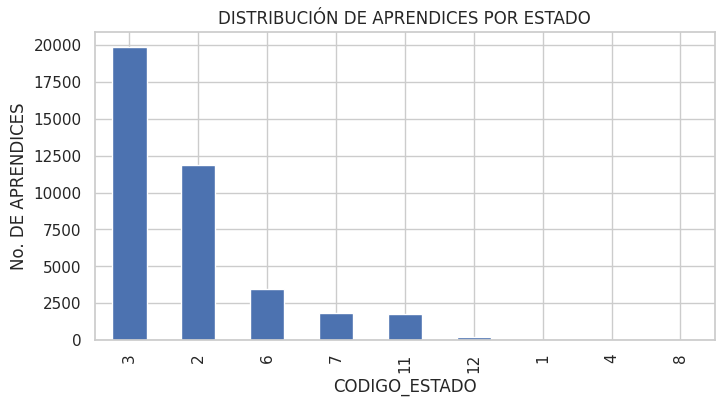

In [ ]:
plt.xlabel("CÓDIGO ESTADOS")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTADO")
df["CODIGO_ESTADO"].value_counts().plot(kind='bar',  figsize=(8,4))

In [ ]:
df["ESTADO_APRENDIZ"].value_counts()

ESTADO_APRENDIZ
CERTIFICADO          19896
CANCELADO            11859
RETIRO VOLUNTARIO     3487
FORMACION             1819
TRASLADO              1772
POR CERTIFICAR         226
APLAZADO                18
CONDICIONADO            15
INDUCCION               10
Name: count, dtype: int64

In [ ]:
df["ESTADO_APRENDIZ"].isnull().sum()

0

In [ ]:
frecuencia = df["ESTADO_APRENDIZ"].value_counts()
total_valores = len(df["ESTADO_APRENDIZ"])
for ESTADO_APRENDIZ, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"ESTADO_APRENDIZ: {ESTADO_APRENDIZ}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

ESTADO_APRENDIZ: CERTIFICADO, Frecuencia: 19896, Porcentaje: 50.88%
ESTADO_APRENDIZ: CANCELADO, Frecuencia: 11859, Porcentaje: 30.33%
ESTADO_APRENDIZ: RETIRO VOLUNTARIO, Frecuencia: 3487, Porcentaje: 8.92%
ESTADO_APRENDIZ: FORMACION, Frecuencia: 1819, Porcentaje: 4.65%
ESTADO_APRENDIZ: TRASLADO, Frecuencia: 1772, Porcentaje: 4.53%
ESTADO_APRENDIZ: POR CERTIFICAR, Frecuencia: 226, Porcentaje: 0.58%
ESTADO_APRENDIZ: APLAZADO, Frecuencia: 18, Porcentaje: 0.05%
ESTADO_APRENDIZ: CONDICIONADO, Frecuencia: 15, Porcentaje: 0.04%
ESTADO_APRENDIZ: INDUCCION, Frecuencia: 10, Porcentaje: 0.03%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR ESTADO'}, xlabel='ESTADO_APRENDIZ', ylabel='No. DE APRENDICES'>

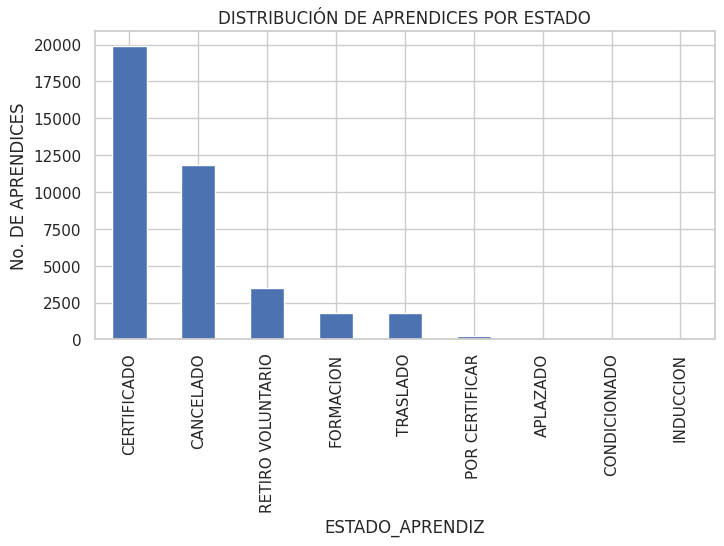

In [ ]:
plt.xlabel("ESTADO_APRENDIZ")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTADO")
df["ESTADO_APRENDIZ"].value_counts().plot(kind='bar',  figsize=(8,4))

In [ ]:
df["COD_NIVEL_FORMACION"].value_counts()

COD_NIVEL_FORMACION
2      26480
6      10162
7       1038
10       978
1        379
223       65
Name: count, dtype: int64

In [ ]:
df["COD_NIVEL_FORMACION"].isnull().sum()

0

In [ ]:
frecuencia = df["COD_NIVEL_FORMACION"].value_counts()
total_valores = len(df["COD_NIVEL_FORMACION"])
for COD_NIVEL_FORMACION, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"COD_NIVEL_FORMACION: {COD_NIVEL_FORMACION}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

COD_NIVEL_FORMACION: 2, Frecuencia: 26480, Porcentaje: 67.72%
COD_NIVEL_FORMACION: 6, Frecuencia: 10162, Porcentaje: 25.99%
COD_NIVEL_FORMACION: 7, Frecuencia: 1038, Porcentaje: 2.65%
COD_NIVEL_FORMACION: 10, Frecuencia: 978, Porcentaje: 2.50%
COD_NIVEL_FORMACION: 1, Frecuencia: 379, Porcentaje: 0.97%
COD_NIVEL_FORMACION: 223, Frecuencia: 65, Porcentaje: 0.17%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR COD_NIVEL_FORMACION'}, xlabel='COD_NIVEL_FORMACION', ylabel='No. DE APRENDICES'>

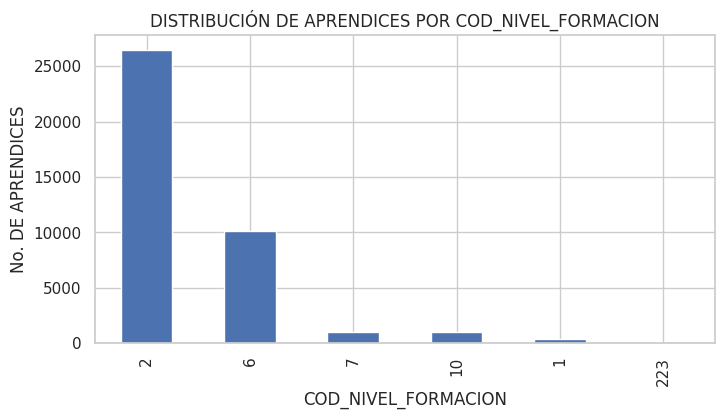

In [ ]:
plt.xlabel("COD_NIVEL_FORMACION")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR COD_NIVEL_FORMACION")
df["COD_NIVEL_FORMACION"].value_counts().plot(kind='bar', figsize=(8,4))

In [ ]:
df["NIVEL_FORMACION"].value_counts()

NIVEL_FORMACION
TÉCNICO                        26480
TECNÓLOGO                      10162
ESPECIALIZACIÓN TECNOLÓGICA     1038
OPERARIO                         978
AUXILIAR                         379
PROFUNDIZACIÓN TÉCNICA            65
Name: count, dtype: int64

In [ ]:
df["NIVEL_FORMACION"].isnull().sum()

0

In [ ]:
frecuencia = df["NIVEL_FORMACION"].value_counts()
total_valores = len(df["NIVEL_FORMACION"])
for NIVEL_FORMACION, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"NIVEL_FORMACION: {NIVEL_FORMACION}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

NIVEL_FORMACION: TÉCNICO, Frecuencia: 26480, Porcentaje: 67.72%
NIVEL_FORMACION: TECNÓLOGO, Frecuencia: 10162, Porcentaje: 25.99%
NIVEL_FORMACION: ESPECIALIZACIÓN TECNOLÓGICA, Frecuencia: 1038, Porcentaje: 2.65%
NIVEL_FORMACION: OPERARIO, Frecuencia: 978, Porcentaje: 2.50%
NIVEL_FORMACION: AUXILIAR, Frecuencia: 379, Porcentaje: 0.97%
NIVEL_FORMACION: PROFUNDIZACIÓN TÉCNICA, Frecuencia: 65, Porcentaje: 0.17%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR NIVEL_FORMACION'}, xlabel='NIVEL_FORMACION', ylabel='No. DE APRENDICES'>

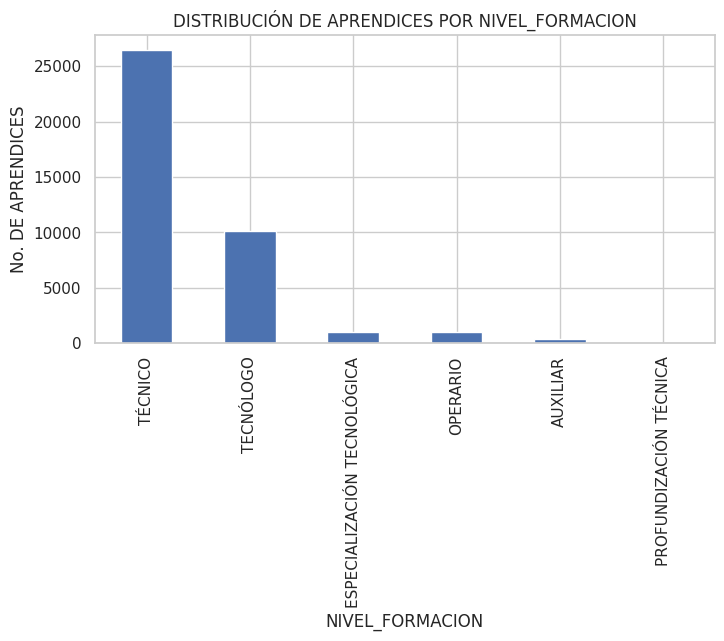

In [ ]:
plt.xlabel("NIVEL_FORMACION")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR NIVEL_FORMACION")
df["NIVEL_FORMACION"].value_counts().plot(kind='bar', figsize=(8,4))

In [ ]:
df["MODALIDAD"].value_counts()

MODALIDAD
PRESENCIAL    39102
Name: count, dtype: int64

In [ ]:
df["MODALIDAD"].isnull().sum()

0

In [ ]:
df["COD_PROGRAMA"].value_counts()

COD_PROGRAMA
122121    2361
228185    2341
112005    1478
133146    1367
134401    1231
          ... 
931501      15
836221      15
722303      15
135304      15
733302       7
Name: count, Length: 215, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["COD_PROGRAMA"].unique()))

Número de valores únicos:  215


In [ ]:
df["COD_PROGRAMA"].isnull().sum()

0

In [ ]:
frecuencia = df["COD_PROGRAMA"].value_counts()
total_valores = len(df["COD_PROGRAMA"])
for COD_PROGRAMA, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 1200:
      print(f"COD_PROGRAMA: {COD_PROGRAMA}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

COD_PROGRAMA: 122121, Frecuencia: 2361, Porcentaje: 6.04%
COD_PROGRAMA: 228185, Frecuencia: 2341, Porcentaje: 5.99%
COD_PROGRAMA: 112005, Frecuencia: 1478, Porcentaje: 3.78%
COD_PROGRAMA: 133146, Frecuencia: 1367, Porcentaje: 3.50%
COD_PROGRAMA: 134401, Frecuencia: 1231, Porcentaje: 3.15%


In [ ]:
df["NOMBRE_PROGRAMA"].value_counts()

NOMBRE_PROGRAMA
ASISTENCIA ADMINISTRATIVA                                   2361
SISTEMAS                                                    2341
GESTIÓN DEL TALENTO HUMANO                                  1478
CONTABILIZACIÓN DE OPERACIONES COMERCIALES Y FINANCIERAS    1367
ASISTENCIA EN ORGANIZACIÓN DE ARCHIVOS                      1231
                                                            ... 
INSPECCION Y ENSAYOS CON PROCESOS NO DESTRUCTIVOS             15
CONSTRUCCIÓN DE ESTRUCTURAS EN CONCRETO                       15
GESTIÓN SOSTENIBLE DE LA BIODIVERSIDAD VEGETAL                15
INFORMACIÓN TURÍSTICA                                         15
MANEJO DE VIVEROS                                              7
Name: count, Length: 215, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["NOMBRE_PROGRAMA"].unique()))

Número de valores únicos:  215


In [ ]:
df["NOMBRE_PROGRAMA"].isnull().sum()

0

In [ ]:
frecuencia = df["NOMBRE_PROGRAMA"].value_counts()
total_valores = len(df["NOMBRE_PROGRAMA"])
for NOMBRE_PROGRAMA, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 1200:
      print(f"NOMBRE_PROGRAMA: {NOMBRE_PROGRAMA}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

NOMBRE_PROGRAMA: ASISTENCIA ADMINISTRATIVA, Frecuencia: 2361, Porcentaje: 6.04%
NOMBRE_PROGRAMA: SISTEMAS, Frecuencia: 2341, Porcentaje: 5.99%
NOMBRE_PROGRAMA: GESTIÓN DEL TALENTO HUMANO, Frecuencia: 1478, Porcentaje: 3.78%
NOMBRE_PROGRAMA: CONTABILIZACIÓN DE OPERACIONES COMERCIALES Y FINANCIERAS, Frecuencia: 1367, Porcentaje: 3.50%
NOMBRE_PROGRAMA: ASISTENCIA EN ORGANIZACIÓN DE ARCHIVOS, Frecuencia: 1231, Porcentaje: 3.15%


In [ ]:
df["CODIGO_RED_CONOCIMIENTO"].value_counts()

CODIGO_RED_CONOCIMIENTO
26.0    1438
9.0     1308
10.0     886
8.0      854
23.0     677
16.0     611
30.0     606
14.0     536
4.0      454
13.0     337
5.0      320
22.0     258
29.0     254
28.0     247
19.0     210
1.0      139
27.0     126
6.0      112
24.0     110
2.0      106
21.0      86
11.0      84
25.0      80
3.0       69
18.0      37
17.0      19
Name: count, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["CODIGO_RED_CONOCIMIENTO"].unique()))

Número de valores únicos:  27


In [ ]:
df["CODIGO_RED_CONOCIMIENTO"].isnull().sum()

29138

In [ ]:
frecuencia = df["CODIGO_RED_CONOCIMIENTO"].value_counts()
total_valores = len(df["CODIGO_RED_CONOCIMIENTO"])
for CODIGO_RED_CONOCIMIENTO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 1200:
      print(f"CODIGO_RED_CONOCIMIENTO: {CODIGO_RED_CONOCIMIENTO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

CODIGO_RED_CONOCIMIENTO: 26.0, Frecuencia: 1438, Porcentaje: 3.68%
CODIGO_RED_CONOCIMIENTO: 9.0, Frecuencia: 1308, Porcentaje: 3.35%


In [ ]:
df["NOM_RED_CONOCIMIENTO"].value_counts()

NOM_RED_CONOCIMIENTO
RED DE CONOCIMIENTO EN SALUD                                           1438
RED DE CONOCIMIENTO EN ENERGÍA ELÉCTRICA                               1308
RED DE CONOCIMIENTO EN ELECTRÓNICA Y AUTOMATIZACIÓN                     886
RED DE CONOCIMIENTO EN MECÁNICA INDUSTRIAL                              854
RED DE CONOCIMIENTO AGRÍCOLA                                            677
RED DE CONOCIMIENTO TEXTIL, CONFECCIÓN, DISEÑO Y MODA                   611
RED DE CONOCIMIENTO EN SERVICIOS PERSONALES                             606
RED DE CONOCIMIENTO AUTOMOTOR                                           536
RED DE CONOCIMIENTO EN GESTIÓN ADMINISTRATIVA, Y FINANCIERA             454
RED DE CONOCIMIENTO EN INFORMÁTICA, DISEÑO Y DESARROLLO DE SOFTWARE     337
RED DE CONOCIMIENTO EN COMERCIO Y VENTAS                                320
RED DE CONOCIMIENTO EN CONSTRUCCIÓN E INFRAESTRUCTURA                   258
RED DE CONOCIMIENTO EN TRANSPORTE                                  

In [ ]:
print("Número de valores únicos: ",len(df["NOM_RED_CONOCIMIENTO"].unique()))

Número de valores únicos:  27


In [ ]:
df["NOM_RED_CONOCIMIENTO"].isnull().sum()

29138

In [ ]:
frecuencia = df["NOM_RED_CONOCIMIENTO"].value_counts()
total_valores = len(df["NOM_RED_CONOCIMIENTO"])
for NOM_RED_CONOCIMIENTO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 600:
      print(f"NOM_RED_CONOCIMIENTO: {NOM_RED_CONOCIMIENTO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

NOM_RED_CONOCIMIENTO: RED DE CONOCIMIENTO EN SALUD, Frecuencia: 1438, Porcentaje: 3.68%
NOM_RED_CONOCIMIENTO: RED DE CONOCIMIENTO EN ENERGÍA ELÉCTRICA, Frecuencia: 1308, Porcentaje: 3.35%
NOM_RED_CONOCIMIENTO: RED DE CONOCIMIENTO EN ELECTRÓNICA Y AUTOMATIZACIÓN, Frecuencia: 886, Porcentaje: 2.27%
NOM_RED_CONOCIMIENTO: RED DE CONOCIMIENTO EN MECÁNICA INDUSTRIAL, Frecuencia: 854, Porcentaje: 2.18%
NOM_RED_CONOCIMIENTO: RED DE CONOCIMIENTO AGRÍCOLA, Frecuencia: 677, Porcentaje: 1.73%
NOM_RED_CONOCIMIENTO: RED DE CONOCIMIENTO TEXTIL, CONFECCIÓN, DISEÑO Y MODA, Frecuencia: 611, Porcentaje: 1.56%
NOM_RED_CONOCIMIENTO: RED DE CONOCIMIENTO EN SERVICIOS PERSONALES, Frecuencia: 606, Porcentaje: 1.55%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR RED DE CONOCIMIENTO'}, ylabel='NOM_RED_CONOCIMIENTO'>

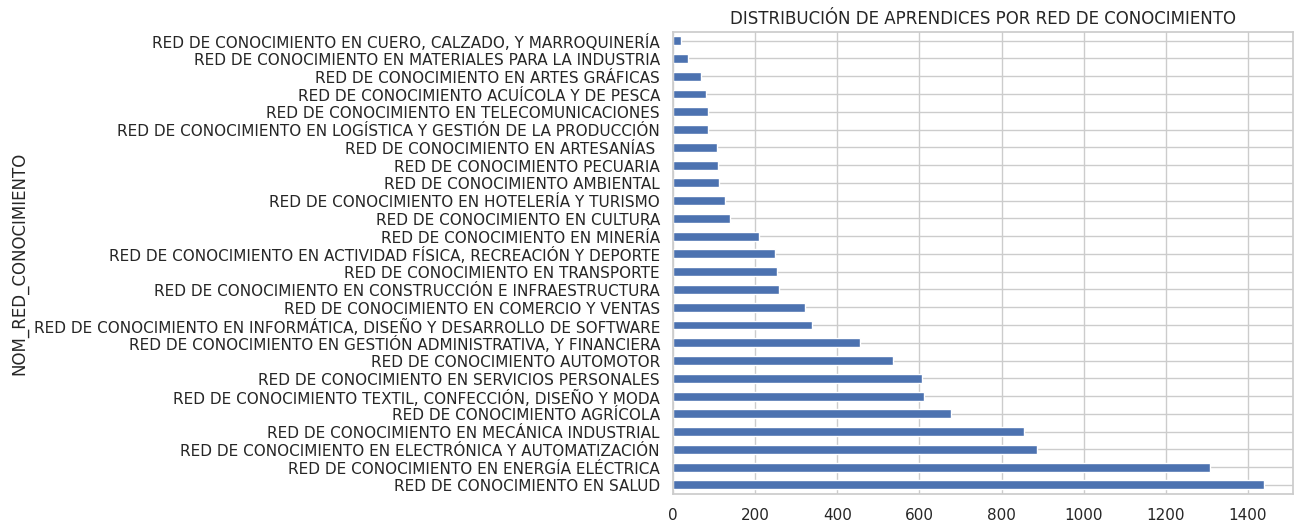

In [ ]:
plt.xlabel("NOM_RED_CONOCIMIENTO")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR RED DE CONOCIMIENTO")
df["NOM_RED_CONOCIMIENTO"].value_counts().plot(kind='barh', figsize=(8,6))

In [ ]:
df["COD_LINEA_TECNOLÓGICA"].value_counts()

COD_LINEA_TECNOLÓGICA
5    20643
3     9012
1     5568
4     2105
2     1774
Name: count, dtype: int64

In [ ]:
df["COD_LINEA_TECNOLÓGICA"].isnull().sum()

0

In [ ]:
print("Número de valores únicos: ",len(df["COD_LINEA_TECNOLÓGICA"].unique()))

Número de valores únicos:  5


In [ ]:
frecuencia = df["COD_LINEA_TECNOLÓGICA"].value_counts()
total_valores = len(df["COD_LINEA_TECNOLÓGICA"])
for COD_LINEA_TECNOLÓGICA, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"COD_LINEA_TECNOLÓGICA: {COD_LINEA_TECNOLÓGICA}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

COD_LINEA_TECNOLÓGICA: 5, Frecuencia: 20643, Porcentaje: 52.79%
COD_LINEA_TECNOLÓGICA: 3, Frecuencia: 9012, Porcentaje: 23.05%
COD_LINEA_TECNOLÓGICA: 1, Frecuencia: 5568, Porcentaje: 14.24%
COD_LINEA_TECNOLÓGICA: 4, Frecuencia: 2105, Porcentaje: 5.38%
COD_LINEA_TECNOLÓGICA: 2, Frecuencia: 1774, Porcentaje: 4.54%


In [ ]:
df["NOM_LINEA_TECNOLÓGICA"].value_counts()

NOM_LINEA_TECNOLÓGICA
CLIENTE                                                                          20643
PRODUCCIÓN Y TRANSFORMACIÓN                                                       9012
TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES  GESTIÓN DE LA INFORMACIÓN     5568
MATERIALES HERRAMIENTAS                                                           2105
DISEÑO                                                                            1774
Name: count, dtype: int64

In [ ]:
df["NOM_LINEA_TECNOLÓGICA"].isnull().sum()

0

In [ ]:
print("Número de valores únicos: ",len(df["NOM_LINEA_TECNOLÓGICA"].unique()))

Número de valores únicos:  5


In [ ]:
frecuencia = df["NOM_LINEA_TECNOLÓGICA"].value_counts()
total_valores = len(df["NOM_LINEA_TECNOLÓGICA"])
for NOM_LINEA_TECNOLÓGICA, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"NOM_LINEA_TECNOLÓGICA: {NOM_LINEA_TECNOLÓGICA}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

NOM_LINEA_TECNOLÓGICA: CLIENTE, Frecuencia: 20643, Porcentaje: 52.79%
NOM_LINEA_TECNOLÓGICA: PRODUCCIÓN Y TRANSFORMACIÓN, Frecuencia: 9012, Porcentaje: 23.05%
NOM_LINEA_TECNOLÓGICA: TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACIONES  GESTIÓN DE LA INFORMACIÓN, Frecuencia: 5568, Porcentaje: 14.24%
NOM_LINEA_TECNOLÓGICA: MATERIALES HERRAMIENTAS, Frecuencia: 2105, Porcentaje: 5.38%
NOM_LINEA_TECNOLÓGICA: DISEÑO, Frecuencia: 1774, Porcentaje: 4.54%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR LINEA TECNOLÓGICA'}, ylabel='NOM_LINEA_TECNOLÓGICA'>

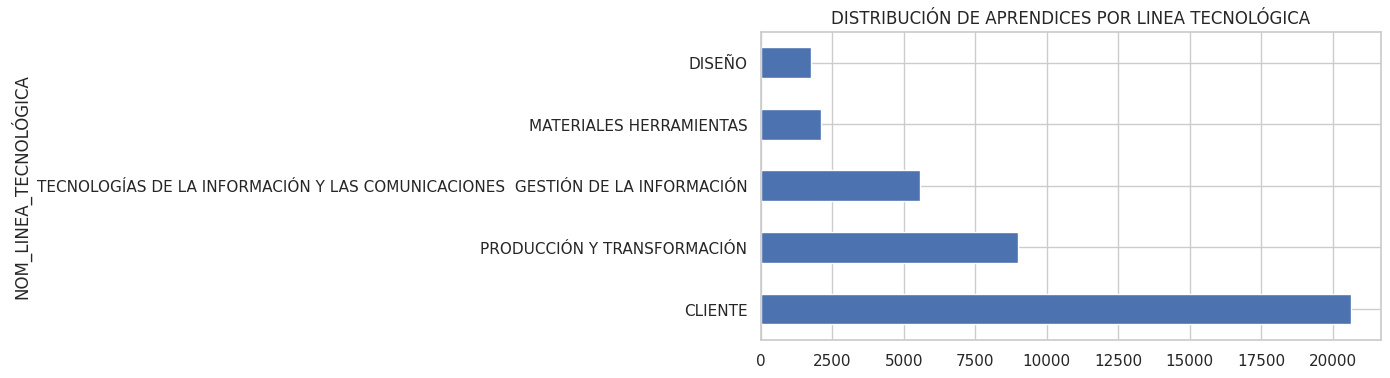

In [ ]:
plt.xlabel("NOM_LINEA_TECNOLÓGICA")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR LINEA TECNOLÓGICA")
df["NOM_LINEA_TECNOLÓGICA"].value_counts().plot(kind='barh', figsize=(8,4))

In [ ]:
df["CÓDIGO_TECNOLOGÍA_DE_RED"].value_counts()

CÓDIGO_TECNOLOGÍA_DE_RED
25    12248
1      4992
24     3467
9      2740
23     2452
10     2234
18     1974
22     1489
8      1453
11     1311
21      970
4       946
12      589
2       576
6       488
13      372
5       234
7       210
3       106
14      103
16       86
17       23
19       22
20       17
Name: count, dtype: int64

In [ ]:
df["CÓDIGO_TECNOLOGÍA_DE_RED"].isnull().sum()

0

In [ ]:
print("Número de valores únicos: ",len(df["CÓDIGO_TECNOLOGÍA_DE_RED"].unique()))

Número de valores únicos:  24


In [ ]:
frecuencia = df["CÓDIGO_TECNOLOGÍA_DE_RED"].value_counts()
total_valores = len(df["CÓDIGO_TECNOLOGÍA_DE_RED"])
for CÓDIGO_TECNOLOGÍA_DE_RED, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 2400:
      print(f"CÓDIGO_TECNOLOGÍA_DE_RED: {CÓDIGO_TECNOLOGÍA_DE_RED}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

CÓDIGO_TECNOLOGÍA_DE_RED: 25, Frecuencia: 12248, Porcentaje: 31.32%
CÓDIGO_TECNOLOGÍA_DE_RED: 1, Frecuencia: 4992, Porcentaje: 12.77%
CÓDIGO_TECNOLOGÍA_DE_RED: 24, Frecuencia: 3467, Porcentaje: 8.87%
CÓDIGO_TECNOLOGÍA_DE_RED: 9, Frecuencia: 2740, Porcentaje: 7.01%
CÓDIGO_TECNOLOGÍA_DE_RED: 23, Frecuencia: 2452, Porcentaje: 6.27%


In [ ]:
C_col = []
N_col = []
for col in df.columns:
    if df[col].dtype == 'object':
        C_col.append(col)
    else:
        N_col.append(col)

# Imprimir las listas actualizadas
print(f"# Columnas Numéricas = {len(N_col)}", N_col)
print(f"# Columnas Categóricas = {len(C_col)}", C_col)

# Columnas Numéricas = 30 ['NIS', 'ESTRATO', 'NIVEL_SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESIDENCIA', 'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA', 'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA', 'CODIGO_ESTADO', 'COD_NIVEL_FORMACION', 'COD_PROGRAMA', 'CODIGO_RED_CONOCIMIENTO', 'COD_LINEA_TECNOLÓGICA', 'CÓDIGO_TECNOLOGÍA_DE_RED', 'FICHA_NUM_CURSO', 'CÓDIGO_REGIONAL', 'CÓDIGO_CENTRO', 'EDAD', 'CÓDIGO_TIPO_POBLACIÓN', 'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019', 'APOYO_SOSTNMTO_2020', 'APOYO_SOSTNMTO_2021', 'APOYO_SOSTNMTO_2022', 'APOYO_SOSTNMTO_2023', 'APOYO_FIC_2018', 'APOYO_FIC_2019', 'APOYO_FIC_2020', 'APOYO_FIC_2021']
# Columnas Categóricas = 17 ['GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'PUNTAJE_ICFES', 'PAIS_RESIDENCIA', 'DPTO_RESIDENCIA', 'MUNICIPIO_RESIDENCIA', 'ESTADO_APRENDIZ', 'NIVEL_FORMACION', 'MODALIDAD', 'NOMBRE_PROGRAMA', 'NOM_RED_CONOCIMIENTO', 'NOM_LINEA_TECNOLÓGICA', 'NOMBRE_TECNOLOGÍA_DE_RED', 'NOMBRE_REGIONAL', 'SEDE', 'NOMBRE_TIPO_POBLACIÓN']


In [ ]:
print("Análisis de Columnas Categóricas")
result_dfs = []
for col in C_col:
    col_counts = df[col].value_counts()
    total_rows = len(df)
    col_percentages = (col_counts / total_rows) * 100

    result_df = pd.DataFrame({
        "Valores Únicos": col_counts.index,
        "Recuento": col_counts.values,
        "Porcentaje por Categoría": col_percentages.values
    })
    result_dfs.append(result_df)
for col, result_df in zip(C_col, result_dfs):
    print(f"\nAnálisis para la columna '{col}':")
    display(result_df)
    print("-" * 50)

Análisis de Columnas Categóricas

Análisis para la columna 'GENERO':


Valores Únicos  Recuento  Porcentaje por Categoría
0              F     20044                 51.260805
1              M     19058                 48.739195

--------------------------------------------------

Análisis para la columna 'FECHA_NACIMIENTO':


Valores Únicos  Recuento  Porcentaje por Categoría
0          1/01/2000        35                  0.089509
1         21/12/2000        32                  0.081837
2          4/12/2000        28                  0.071608
3         26/05/2000        27                  0.069050
4         18/02/2000        25                  0.063935
...              ...       ...                       ...
10108     13/02/1964         1                  0.002557
10109      2/01/1972         1                  0.002557
10110      4/05/1987         1                  0.002557
10111     12/10/2001         1                  0.002557
10112     13/11/1961         1                  0.002557

[10113 rows x 3 columns]

--------------------------------------------------

Análisis para la columna 'ESTADO_CIVIL':


Valores Únicos  Recuento  Porcentaje por Categoría
0              S     20606                 52.698072
1              N      9016                 23.057644
2              U      4310                 11.022454
3              I      2562                  6.552095
4              C      2234                  5.713263
5              E       317                  0.810700
6              V        57                  0.145773

--------------------------------------------------

Análisis para la columna 'PUNTAJE_ICFES':


Valores Únicos  Recuento  Porcentaje por Categoría
0               45        29                  0.074165
1              250        24                  0.061378
2              298        21                  0.053706
3              300        19                  0.048591
4               49        19                  0.048591
..             ...       ...                       ...
538            208         1                  0.002557
539            452         1                  0.002557
540            422         1                  0.002557
541            203         1                  0.002557
542           66.0         1                  0.002557

[543 rows x 3 columns]

--------------------------------------------------

Análisis para la columna 'PAIS_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0         COLOMBIA     39078                 99.938622
1        VENEZUELA         6                  0.015344
2           ESPAÑA         4                  0.010230
3            CHILE         3                  0.007672
4   ESTADOS UNIDOS         1                  0.002557
5         PORTUGAL         1                  0.002557
6           ITALIA         1                  0.002557
7          BÉLGICA         1                  0.002557
8             PERÚ         1                  0.002557
9        AUSTRALIA         1                  0.002557
10        ALEMANIA         1                  0.002557
11         ECUADOR         1                  0.002557
12       ARGENTINA         1                  0.002557
13         RUMANIA         1                  0.002557
14          MÉXICO         1                  0.002557

--------------------------------------------------

Análisis para la columna 'DPTO_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0                        BOGOTÁ D.C.      9208                 23.548668
1                          ANTIOQUIA      3953                 10.109457
2                       CUNDINAMARCA      3793                  9.700271
3                          SANTANDER      1979                  5.061122
4                          ATLÁNTICO      1801                  4.605903
5                            CÓRDOBA      1551                  3.966549
6                 NORTE DE SANTANDER      1444                  3.692906
7                    VALLE DEL CAUCA      1409                  3.603396
8                            BOLÍVAR      1404                  3.590609
9                             BOYACÁ      1274                  3.258145
10                          PUTUMAYO      1039                  2.657153
11                         MAGDALENA       885                  2.263311
12                             HUILA       868                  2.219835
13                         RISARALDA       848                  2.168687
14                          CASANARE       828                  2.117539
15                           QUINDÍO       817                  2.089407
16                              META       746                  1.907831
17                            TOLIMA       732                  1.872027
18                            NARIÑO       616                  1.575367
19                             CHOCÓ       592                  1.513989
20                             SUCRE       588                  1.503759
21                             CAUCA       470                  1.201985
22                            CALDAS       438                  1.120147
23                            ARAUCA       398                  1.017851
24                           CAQUETÁ       379                  0.969260
25                          GUAVIARE       204                  0.521712
26                        LA GUAJIRA       186                  0.475679
27                           GUAINÍA       171                  0.437318
28                             CESAR       155                  0.396399
29                           VICHADA       103                  0.263414
30          SAN ANDRÉS Y PROVIDENCIA        85                  0.217380
31                            VAUPÉS        68                  0.173904
32                          AMAZONAS        44                  0.112526
33                           TÁCHIRA         5                  0.012787
34                            MADRID         3                  0.007672
35  REGIÓN METROPOLITANA DE SANTIAGO         1                  0.002557
36                          A CORUÑA         1                  0.002557
37                          BUCAREST         1                  0.002557
38                   IX LA ARAUCANÍA         1                  0.002557
39                       IV COQUIMBO         1                  0.002557
40                  DISTRITO FEDERAL         1                  0.002557
41                         PICHINCHA         1                  0.002557
42                        MAGDALENA          1                  0.002557
43                         PUTUMAYO          1                  0.002557
44                             APURE         1                  0.002557
45   RENANIA SEPTENTRIONAL-WESTFALIA         1                  0.002557
46                          VICTORIA         1                  0.002557
47                              LIMA         1                  0.002557
48                          BRUSELAS         1                  0.002557
49                            ANCONA         1                  0.002557
50                           SETÚBAL         1                  0.002557
51                           FLORIDA         1                  0.002557
52                           DURANGO         1                  0.002557

--------------------------------------------------

Análisis para la columna 'MUNICIPIO_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0                   BOGOTÁ      9208                 23.548668
1                 MEDELLÍN      1702                  4.352719
2                CARTAGENA      1068                  2.731318
3                   SOACHA       947                  2.421871
4             BARRANQUILLA       912                  2.332362
..                     ...       ...                       ...
848               REMOLINO         1                  0.002557
849            ANGELOPOLIS         1                  0.002557
850            TAMALAMEQUE         1                  0.002557
851             LA FLORIDA         1                  0.002557
852  SANTA HELENA DEL OPÓN         1                  0.002557

[853 rows x 3 columns]

--------------------------------------------------

Análisis para la columna 'ESTADO_APRENDIZ':


Valores Únicos  Recuento  Porcentaje por Categoría
0        CERTIFICADO     19896                 50.882308
1          CANCELADO     11859                 30.328372
2  RETIRO VOLUNTARIO      3487                  8.917702
3          FORMACION      1819                  4.651936
4           TRASLADO      1772                  4.531738
5     POR CERTIFICAR       226                  0.577976
6           APLAZADO        18                  0.046033
7       CONDICIONADO        15                  0.038361
8          INDUCCION        10                  0.025574

--------------------------------------------------

Análisis para la columna 'NIVEL_FORMACION':


Valores Únicos  Recuento  Porcentaje por Categoría
0                      TÉCNICO     26480                 67.720321
1                    TECNÓLOGO     10162                 25.988440
2  ESPECIALIZACIÓN TECNOLÓGICA      1038                  2.654596
3                     OPERARIO       978                  2.501151
4                     AUXILIAR       379                  0.969260
5       PROFUNDIZACIÓN TÉCNICA        65                  0.166232

--------------------------------------------------

Análisis para la columna 'MODALIDAD':


Valores Únicos  Recuento  Porcentaje por Categoría
0     PRESENCIAL     39102                     100.0

--------------------------------------------------

Análisis para la columna 'NOMBRE_PROGRAMA':


Valores Únicos  Recuento  \
0                            ASISTENCIA ADMINISTRATIVA      2361   
1                                             SISTEMAS      2341   
2                           GESTIÓN DEL TALENTO HUMANO      1478   
3    CONTABILIZACIÓN DE OPERACIONES COMERCIALES Y F...      1367   
4               ASISTENCIA EN ORGANIZACIÓN DE ARCHIVOS      1231   
..                                                 ...       ...   
210  INSPECCION Y ENSAYOS CON PROCESOS NO DESTRUCTIVOS        15   
211            CONSTRUCCIÓN DE ESTRUCTURAS EN CONCRETO        15   
212     GESTIÓN SOSTENIBLE DE LA BIODIVERSIDAD VEGETAL        15   
213                              INFORMACIÓN TURÍSTICA        15   
214                                  MANEJO DE VIVEROS         7   

     Porcentaje por Categoría  
0                    6.038054  
1                    5.986906  
2                    3.779858  
3                    3.495985  
4                    3.148177  
..                        ...  
210                  0.038361  
211                  0.038361  
212                  0.038361  
213                  0.038361  
214                  0.017902  

[215 rows x 3 columns]

--------------------------------------------------

Análisis para la columna 'NOM_RED_CONOCIMIENTO':


Valores Únicos  Recuento  \
0                        RED DE CONOCIMIENTO EN SALUD      1438   
1            RED DE CONOCIMIENTO EN ENERGÍA ELÉCTRICA      1308   
2   RED DE CONOCIMIENTO EN ELECTRÓNICA Y AUTOMATIZ...       886   
3          RED DE CONOCIMIENTO EN MECÁNICA INDUSTRIAL       854   
4                        RED DE CONOCIMIENTO AGRÍCOLA       677   
5   RED DE CONOCIMIENTO TEXTIL, CONFECCIÓN, DISEÑO...       611   
6         RED DE CONOCIMIENTO EN SERVICIOS PERSONALES       606   
7                       RED DE CONOCIMIENTO AUTOMOTOR       536   
8   RED DE CONOCIMIENTO EN GESTIÓN ADMINISTRATIVA,...       454   
9   RED DE CONOCIMIENTO EN INFORMÁTICA, DISEÑO Y D...       337   
10           RED DE CONOCIMIENTO EN COMERCIO Y VENTAS       320   
11  RED DE CONOCIMIENTO EN CONSTRUCCIÓN E INFRAEST...       258   
12                  RED DE CONOCIMIENTO EN TRANSPORTE       254   
13  RED DE CONOCIMIENTO EN ACTIVIDAD FÍSICA, RECRE...       247   
14                     RED DE CONOCIMIENTO EN MINERÍA       210   
15                     RED DE CONOCIMIENTO EN CULTURA       139   
16         RED DE CONOCIMIENTO EN HOTELERÍA Y TURISMO       126   
17                      RED DE CONOCIMIENTO AMBIENTAL       112   
18                       RED DE CONOCIMIENTO PECUARIA       110   
19                 RED DE CONOCIMIENTO EN ARTESANÍAS        106   
20  RED DE CONOCIMIENTO EN LOGÍSTICA Y GESTIÓN DE ...        86   
21          RED DE CONOCIMIENTO EN TELECOMUNICACIONES        84   
22            RED DE CONOCIMIENTO ACUÍCOLA Y DE PESCA        80   
23              RED DE CONOCIMIENTO EN ARTES GRÁFICAS        69   
24  RED DE CONOCIMIENTO EN MATERIALES PARA LA INDU...        37   
25  RED DE CONOCIMIENTO EN CUERO, CALZADO, Y MARRO...        19   

    Porcentaje por Categoría  
0                   3.677561  
1                   3.345097  
2                   2.265869  
3                   2.184032  
4                   1.731369  
5                   1.562580  
6                   1.549793  
7                   1.370774  
8                   1.161066  
9                   0.861848  
10                  0.818372  
11                  0.659813  
12                  0.649583  
13                  0.631681  
14                  0.537057  
15                  0.355481  
16                  0.322234  
17                  0.286430  
18                  0.281316  
19                  0.271086  
20                  0.219938  
21                  0.214823  
22                  0.204593  
23                  0.176462  
24                  0.094624  
25                  0.048591

--------------------------------------------------

Análisis para la columna 'NOM_LINEA_TECNOLÓGICA':


Valores Únicos  Recuento  \
0                                            CLIENTE     20643   
1                        PRODUCCIÓN Y TRANSFORMACIÓN      9012   
2  TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACI...      5568   
3                            MATERIALES HERRAMIENTAS      2105   
4                                             DISEÑO      1774   

   Porcentaje por Categoría  
0                 52.792696  
1                 23.047414  
2                 14.239681  
3                  5.383356  
4                  4.536852

--------------------------------------------------

Análisis para la columna 'NOMBRE_TECNOLOGÍA_DE_RED':


Valores Únicos  Recuento  \
0   TECNOLOGÍAS DE GESTIÓN ADMINISTRATIVA Y SERVIC...     12248   
1   TECNOLOGÍAS DE LA INFORMACIÓN, DISEÑO Y DESARR...      4992   
2                   TECNOLOGÍAS DE SERVICIOS DE SALUD      3467   
3   TECNOLOGÍAS DE MANTENIMIENTO PREDICTIVO, PREVE...      2740   
4                 TECNOLOGÍAS DE SERVICIOS TURÍSTICOS      2452   
5               TECNOLOGÍAS  DE PRODUCCIÓN INDUSTRIAL      2234   
6                     MATERIALES PARA LA CONSTRUCCIÓN      1974   
7                              LOGÍSTICA Y TRANSPORTE      1489   
8                               TECNOLOGÍAS AGRÍCOLAS      1453   
9                   TECNOLOGÍAS  DE PRODUCCIÓN LIMPIA      1311   
10                          VENTAS Y COMERCIALIZACIÓN       970   
11                     DISEÑO DE MODAS Y CONFECCIONES       946   
12                              TECNOLOGÍAS PECUARIAS       589   
13  TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACI...       576   
14         DISEÑO DE MÁQUINAS Y EQUIPOS AUTOMATIZADOS       488   
15                      TECNOLOGÍAS  AGROINDUSTRIALES       372   
16                                 DISEÑO DE PRODUCTO       234   
17          EXPLOTACIÓN Y TRANSFORMACIÓN DE MINERALES       210   
18              DISEÑO DE JOYAS Y OBJETOS ARTESANALES       106   
19                TECNOLOGÍAS  DE PRODUCCIÓN ACUÍCOLA       103   
20                          BIOTECNOLOGÍA  INDUSTRIAL        86   
21                             BIOTECNOLOGÍA  VEGETAL        23   
22                       MATERIALES PARA LA INDUSTRIA        22   
23  INVESTIGACIÓN, PLANEACIÓN Y DESARROLLO DE MERC...        17   

    Porcentaje por Categoría  
0                  31.323206  
1                  12.766610  
2                   8.866554  
3                   7.007314  
4                   6.270779  
5                   5.713263  
6                   5.048335  
7                   3.807989  
8                   3.715922  
9                   3.352770  
10                  2.480692  
11                  2.419314  
12                  1.506317  
13                  1.473070  
14                  1.248018  
15                  0.951358  
16                  0.598435  
17                  0.537057  
18                  0.271086  
19                  0.263414  
20                  0.219938  
21                  0.058821  
22                  0.056263  
23                  0.043476

--------------------------------------------------

Análisis para la columna 'NOMBRE_REGIONAL':


Valores Únicos  Recuento  Porcentaje por Categoría
0     REGIONAL DISTRITO CAPITAL      9699                 24.804358
1            REGIONAL ANTIOQUIA      4024                 10.291034
2         REGIONAL CUNDINAMARCA      3557                  9.096721
3            REGIONAL SANTANDER      2088                  5.339880
4            REGIONAL ATLÁNTICO      1841                  4.708199
5              REGIONAL CÓRDOBA      1509                  3.859138
6   REGIONAL NORTE DE SANTANDER      1454                  3.718480
7              REGIONAL BOLÍVAR      1335                  3.414148
8                REGIONAL VALLE      1334                  3.411590
9               REGIONAL BOYACÁ      1263                  3.230014
10            REGIONAL PUTUMAYO      1103                  2.820828
11             REGIONAL QUINDÍO       883                  2.258197
12           REGIONAL RISARALDA       876                  2.240295
13               REGIONAL HUILA       871                  2.227508
14           REGIONAL MAGDALENA       853                  2.181474
15            REGIONAL CASANARE       773                  1.976881
16                REGIONAL META       692                  1.769730
17               REGIONAL CHOCÓ       616                  1.575367
18              REGIONAL NARIÑO       589                  1.506317
19               REGIONAL SUCRE       564                  1.442381
20              REGIONAL TOLIMA       564                  1.442381
21               REGIONAL CAUCA       448                  1.145721
22              REGIONAL ARAUCA       434                  1.109918
23             REGIONAL CAQUETÁ       381                  0.974375
24              REGIONAL CALDAS       376                  0.961588
25            REGIONAL GUAVIARE       217                  0.554959
26             REGIONAL GUAJIRA       179                  0.457777
27             REGIONAL GUAINÍA       177                  0.452662
28             REGIONAL VICHADA       108                  0.276201
29               REGIONAL CESAR        92                  0.235282
30          REGIONAL SAN ANDRÉS        91                  0.232725
31              REGIONAL VAUPÉS        75                  0.191806
32            REGIONAL AMAZONAS        36                  0.092067

--------------------------------------------------

Análisis para la columna 'SEDE':


Valores Únicos  Recuento  \
0                     CENTRO DE GESTION ADMINISTRATIVA      2235   
1                       CENTRO DE COMERCIO Y SERVICIOS      2211   
2                      CENTRO DE SERVICIOS FINANCIEROS      2006   
3    CENTRO DE ELECTRICIDAD, ELECTRÓNICA Y TELECOMU...      1442   
4    CENTRO DE LA INDUSTRIA, LA EMPRESA Y LOS SERVI...      1127   
..                                                 ...       ...   
98                  CENTRO DE INDUSTRIA Y CONSTRUCCION        33   
99   CENTRO AGROINDUSTRIAL Y PESQUERO DE LA COSTA P...        31   
100  CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...        29   
101  COMPLEJO TECNOLOGICO, TURISTICO Y AGROINDUSTRI...        28   
102  CENTRO DE FORMACIÓN EN DISEÑO, CONFECCIÓN Y MODA.        25   

     Porcentaje por Categoría  
0                    5.715820  
1                    5.654442  
2                    5.130172  
3                    3.687791  
4                    2.882206  
..                        ...  
98                   0.084395  
99                   0.079280  
100                  0.074165  
101                  0.071608  
102                  0.063935  

[103 rows x 3 columns]

--------------------------------------------------

Análisis para la columna 'NOMBRE_TIPO_POBLACIÓN':


Valores Únicos  Recuento  \
0                                             NINGUNA     22518   
1                        DESPLAZADOS POR LA VIOLENCIA      4291   
2                                 JOVENES VULNERABLES      3760   
3                                       EMPRENDEDORES      1769   
4                             MUJER CABEZA DE FAMILIA      1193   
5                              ADOLESCENTE TRABAJADOR       768   
6        AFROCOLOMBIANOS DESPLAZADOS POR LA VIOLENCIA       473   
7                                            INDIGENA       394   
8                                      AFROCOLOMBIANO       386   
9                                               NEGRO       364   
10                                HOMICIDIO / MASACRE       171   
11                DESPLAZADOS POR FENOMENOS NATURALES       139   
12             INDÍGENAS DESPLAZADOS POR LA VIOLENCIA       120   
13                                      MICROEMPRESAS       101   
14                         DESPLAZADOS DISCAPACITADOS        80   
15                                       TERCERA EDAD        74   
16                               REMITIDOS POR EL PAL        72   
17                                          ARTESANOS        57   
18                                             RAIZAL        40   
19                                SOLDADOS CAMPESINOS        38   
20                                     DISCAPACITADOS        34   
21           DISCAPACITADO LIMITACION FISICA O MOTORA        33   
22               PERSONAS EN PROCESO DE REINTEGRACIÓN        26   
23                               DESAPARICIÓN FORZADA        26   
24                                              INPEC        26   
25          DISCAPACITADO LIMITACION AUDITIVA O SORDA        21   
26                                            AMENAZA        19   
27            DISCAPACITADO LIMITACION VISUAL O CIEGA        19   
28          ADOLESCENTE EN CONFLICTO CON LA LEY PENAL        15   
29                            DISCAPACITADO COGNITIVO        15   
30  MINAS ANTIPERSONAL, MUNICIÓN SIN EXPLOTAR, Y A...        14   
31  ACTOS TERRORISTA/ATENTADOS/COMBATES/ENFRENTAMI...        11   
32                               REMITIDOS POR EL CIE         6   
33  DESPLAZADOS POR FENÓMENOS NATURALES CABEZA DE ...         6   
34                                         PALENQUERO         5   
35                               DISCAPACITADO MENTAL         4   
36                                          SECUESTRO         3   
37  DELITOS CONTRA LA LIBERTAD Y LA INTEGRIDAD SEX...         2   
38                                            TORTURA         2   
39                SOBREVIVIENTES MINAS ANTIPERSONALES         1   
40  VINCULACIÓN DE NIÑOS, NIÑAS Y ADOLESCENTES A A...         1   

    Porcentaje por Categoría  
0                  57.587847  
1                  10.973863  
2                   9.615876  
3                   4.524065  
4                   3.050995  
5                   1.964094  
6                   1.209657  
7                   1.007621  
8                   0.987162  
9                   0.930899  
10                  0.437318  
11                  0.355481  
12                  0.306890  
13                  0.258299  
14                  0.204593  
15                  0.189249  
16                  0.184134  
17                  0.145773  
18                  0.102297  
19                  0.097182  
20                  0.086952  
21                  0.084395  
22                  0.066493  
23                  0.066493  
24                  0.066493  
25                  0.053706  
26                  0.048591  
27                  0.048591  
28                  0.038361  
29                  0.038361  
30                  0.035804  
31                  0.028132  
32                  0.015344  
33                  0.015344  
34                  0.012787  
35                  0.010230  
36                  0.007672  
37                  0.005115  
38             

--------------------------------------------------


In [ ]:
df["NOMBRE_TECNOLOGÍA_DE_RED"].value_counts()

NOMBRE_TECNOLOGÍA_DE_RED
TECNOLOGÍAS DE GESTIÓN ADMINISTRATIVA Y SERVICIOS FINANCIEROS                               12248
TECNOLOGÍAS DE LA INFORMACIÓN, DISEÑO Y DESARROLLO DE SOFTWARE                               4992
TECNOLOGÍAS DE SERVICIOS DE SALUD                                                            3467
TECNOLOGÍAS DE MANTENIMIENTO PREDICTIVO, PREVENTIVO Y  CORRECTIVO                            2740
TECNOLOGÍAS DE SERVICIOS TURÍSTICOS                                                          2452
TECNOLOGÍAS  DE PRODUCCIÓN INDUSTRIAL                                                        2234
MATERIALES PARA LA CONSTRUCCIÓN                                                              1974
LOGÍSTICA Y TRANSPORTE                                                                       1489
TECNOLOGÍAS AGRÍCOLAS                                                                        1453
TECNOLOGÍAS  DE PRODUCCIÓN LIMPIA                                                            

In [ ]:
df["NOMBRE_TECNOLOGÍA_DE_RED"].isnull().sum()

0

In [ ]:
print("Número de valores únicos: ",len(df["NOMBRE_TECNOLOGÍA_DE_RED"].unique()))

Número de valores únicos:  24


In [ ]:
frecuencia = df["NOMBRE_TECNOLOGÍA_DE_RED"].value_counts()
total_valores = len(df["NOMBRE_TECNOLOGÍA_DE_RED"])
for NOMBRE_TECNOLOGÍA_DE_RED, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 2400:
      print(f"NOMBRE_TECNOLOGÍA_DE_RED: {NOMBRE_TECNOLOGÍA_DE_RED}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

NOMBRE_TECNOLOGÍA_DE_RED: TECNOLOGÍAS DE GESTIÓN ADMINISTRATIVA Y SERVICIOS FINANCIEROS, Frecuencia: 12248, Porcentaje: 31.32%
NOMBRE_TECNOLOGÍA_DE_RED: TECNOLOGÍAS DE LA INFORMACIÓN, DISEÑO Y DESARROLLO DE SOFTWARE, Frecuencia: 4992, Porcentaje: 12.77%
NOMBRE_TECNOLOGÍA_DE_RED: TECNOLOGÍAS DE SERVICIOS DE SALUD, Frecuencia: 3467, Porcentaje: 8.87%
NOMBRE_TECNOLOGÍA_DE_RED: TECNOLOGÍAS DE MANTENIMIENTO PREDICTIVO, PREVENTIVO Y  CORRECTIVO, Frecuencia: 2740, Porcentaje: 7.01%
NOMBRE_TECNOLOGÍA_DE_RED: TECNOLOGÍAS DE SERVICIOS TURÍSTICOS, Frecuencia: 2452, Porcentaje: 6.27%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR TECNOLOGÍA DE RED'}, ylabel='NOMBRE_TECNOLOGÍA_DE_RED'>

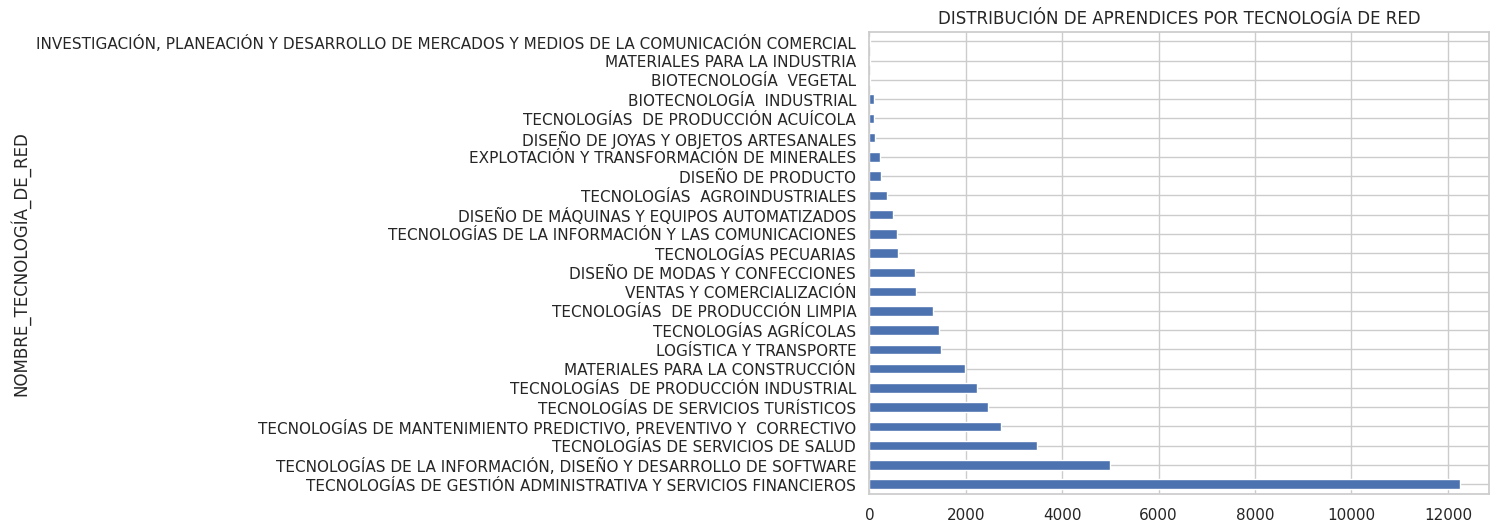

In [ ]:
plt.xlabel("NOMBRE_TECNOLOGÍA_DE_RED")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR TECNOLOGÍA DE RED")
df["NOMBRE_TECNOLOGÍA_DE_RED"].value_counts().plot(kind='barh', figsize=(8,6))

In [ ]:
df["FICHA_NUM_CURSO"].value_counts()

FICHA_NUM_CURSO
1581575    216
1581582    211
1581576    203
1576858    138
1578581    120
          ... 
1578605      4
1578856      3
1580799      3
1571975      3
1578867      3
Name: count, Length: 1381, dtype: int64

In [ ]:
df["FICHA_NUM_CURSO"].isnull().sum()

0

In [ ]:
print("Número de valores únicos: ",len(df["FICHA_NUM_CURSO"].unique()))

Número de valores únicos:  1381


In [ ]:
frecuencia = df["FICHA_NUM_CURSO"].value_counts()
total_valores = len(df["FICHA_NUM_CURSO"])
for FICHA_NUM_CURSO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 130:
      print(f"FICHA_NUM_CURSO: {FICHA_NUM_CURSO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

FICHA_NUM_CURSO: 1581575, Frecuencia: 216, Porcentaje: 0.55%
FICHA_NUM_CURSO: 1581582, Frecuencia: 211, Porcentaje: 0.54%
FICHA_NUM_CURSO: 1581576, Frecuencia: 203, Porcentaje: 0.52%
FICHA_NUM_CURSO: 1576858, Frecuencia: 138, Porcentaje: 0.35%


In [ ]:
df["CÓDIGO_REGIONAL"].value_counts()

CÓDIGO_REGIONAL
11    9699
5     4024
25    3557
68    2088
8     1841
23    1509
54    1454
13    1335
76    1334
15    1263
86    1103
63     883
66     876
41     871
47     853
85     773
50     692
27     616
52     589
70     564
73     564
19     448
81     434
18     381
17     376
95     217
44     179
94     177
99     108
20      92
88      91
97      75
91      36
Name: count, dtype: int64

In [ ]:
df["CÓDIGO_REGIONAL"].isnull().sum()

0

In [ ]:
print("Número de valores únicos: ",len(df["CÓDIGO_REGIONAL"].unique()))

Número de valores únicos:  33


In [ ]:
frecuencia = df["CÓDIGO_REGIONAL"].value_counts()
total_valores = len(df["CÓDIGO_REGIONAL"])
for CÓDIGO_REGIONAL, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 1500:
      print(f"CÓDIGO_REGIONAL: {CÓDIGO_REGIONAL}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

CÓDIGO_REGIONAL: 11, Frecuencia: 9699, Porcentaje: 24.80%
CÓDIGO_REGIONAL: 5, Frecuencia: 4024, Porcentaje: 10.29%
CÓDIGO_REGIONAL: 25, Frecuencia: 3557, Porcentaje: 9.10%
CÓDIGO_REGIONAL: 68, Frecuencia: 2088, Porcentaje: 5.34%
CÓDIGO_REGIONAL: 8, Frecuencia: 1841, Porcentaje: 4.71%
CÓDIGO_REGIONAL: 23, Frecuencia: 1509, Porcentaje: 3.86%


In [ ]:
df["NOMBRE_REGIONAL"].value_counts()

NOMBRE_REGIONAL
REGIONAL DISTRITO CAPITAL      9699
REGIONAL ANTIOQUIA             4024
REGIONAL CUNDINAMARCA          3557
REGIONAL SANTANDER             2088
REGIONAL ATLÁNTICO             1841
REGIONAL CÓRDOBA               1509
REGIONAL NORTE DE SANTANDER    1454
REGIONAL BOLÍVAR               1335
REGIONAL VALLE                 1334
REGIONAL BOYACÁ                1263
REGIONAL PUTUMAYO              1103
REGIONAL QUINDÍO                883
REGIONAL RISARALDA              876
REGIONAL HUILA                  871
REGIONAL MAGDALENA              853
REGIONAL CASANARE               773
REGIONAL META                   692
REGIONAL CHOCÓ                  616
REGIONAL NARIÑO                 589
REGIONAL SUCRE                  564
REGIONAL TOLIMA                 564
REGIONAL CAUCA                  448
REGIONAL ARAUCA                 434
REGIONAL CAQUETÁ                381
REGIONAL CALDAS                 376
REGIONAL GUAVIARE               217
REGIONAL GUAJIRA                179
REGIONAL GUA

In [ ]:
df["NOMBRE_REGIONAL"].isnull().sum()

0

In [ ]:
print("Número de valores únicos: ",len(df["NOMBRE_REGIONAL"].unique()))

Número de valores únicos:  33


In [ ]:
frecuencia = df["NOMBRE_REGIONAL"].value_counts()
total_valores = len(df["NOMBRE_REGIONAL"])
for NOMBRE_REGIONAL, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 1500:
      print(f"NOMBRE_REGIONAL: {NOMBRE_REGIONAL}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

NOMBRE_REGIONAL: REGIONAL DISTRITO CAPITAL, Frecuencia: 9699, Porcentaje: 24.80%
NOMBRE_REGIONAL: REGIONAL ANTIOQUIA, Frecuencia: 4024, Porcentaje: 10.29%
NOMBRE_REGIONAL: REGIONAL CUNDINAMARCA, Frecuencia: 3557, Porcentaje: 9.10%
NOMBRE_REGIONAL: REGIONAL SANTANDER, Frecuencia: 2088, Porcentaje: 5.34%
NOMBRE_REGIONAL: REGIONAL ATLÁNTICO, Frecuencia: 1841, Porcentaje: 4.71%
NOMBRE_REGIONAL: REGIONAL CÓRDOBA, Frecuencia: 1509, Porcentaje: 3.86%


In [ ]:
frecuencia = df["NOMBRE_REGIONAL"].value_counts()
total_valores = len(df["NOMBRE_REGIONAL"])
for NOMBRE_REGIONAL, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo < 100:
      print(f"NOMBRE_REGIONAL: {NOMBRE_REGIONAL}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

NOMBRE_REGIONAL: REGIONAL CESAR, Frecuencia: 92, Porcentaje: 0.24%
NOMBRE_REGIONAL: REGIONAL SAN ANDRÉS, Frecuencia: 91, Porcentaje: 0.23%
NOMBRE_REGIONAL: REGIONAL VAUPÉS, Frecuencia: 75, Porcentaje: 0.19%
NOMBRE_REGIONAL: REGIONAL AMAZONAS, Frecuencia: 36, Porcentaje: 0.09%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR REGIONAL'}, ylabel='NOMBRE_REGIONAL'>

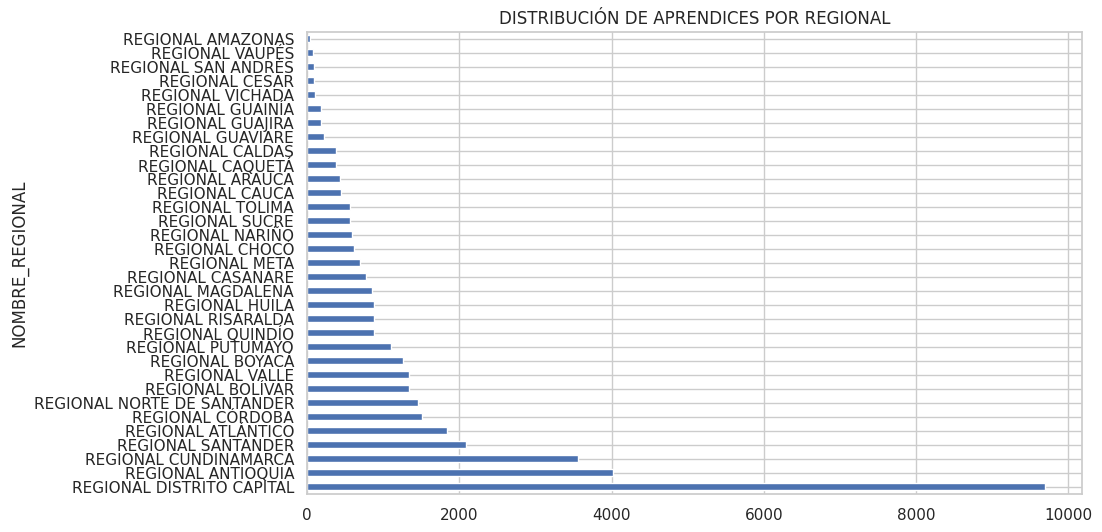

In [ ]:
plt.xlabel("NOMBRE_REGIONAL")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR REGIONAL")
df["NOMBRE_REGIONAL"].value_counts().plot(kind='barh', figsize=(10,6))

In [ ]:
df["CÓDIGO_CENTRO"].value_counts()

CÓDIGO_CENTRO
9404    2235
9405    2006
9210    1442
9518    1103
9512     984
        ... 
9226      33
9535      31
9101      29
9549      28
9202      25
Name: count, Length: 110, dtype: int64

In [ ]:
df["CÓDIGO_CENTRO"].isnull().sum()

0

In [ ]:
print("Número de valores únicos: ",len(df["CÓDIGO_CENTRO"].unique()))

Número de valores únicos:  110


In [ ]:
frecuencia = df["CÓDIGO_CENTRO"].value_counts()
total_valores = len(df["CÓDIGO_CENTRO"])
for CÓDIGO_CENTRO, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 900:
      print(f"CÓDIGO_CENTRO: {CÓDIGO_CENTRO}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

CÓDIGO_CENTRO: 9404, Frecuencia: 2235, Porcentaje: 5.72%
CÓDIGO_CENTRO: 9405, Frecuencia: 2006, Porcentaje: 5.13%
CÓDIGO_CENTRO: 9210, Frecuencia: 1442, Porcentaje: 3.69%
CÓDIGO_CENTRO: 9518, Frecuencia: 1103, Porcentaje: 2.82%
CÓDIGO_CENTRO: 9512, Frecuencia: 984, Porcentaje: 2.52%
CÓDIGO_CENTRO: 9115, Frecuencia: 915, Porcentaje: 2.34%


In [ ]:
df["SEDE"].value_counts()

SEDE
CENTRO DE GESTION ADMINISTRATIVA                                             2235
CENTRO DE COMERCIO Y SERVICIOS                                               2211
CENTRO DE SERVICIOS FINANCIEROS                                              2006
CENTRO DE ELECTRICIDAD, ELECTRÓNICA Y TELECOMUNICACIONES                     1442
CENTRO DE LA INDUSTRIA, LA EMPRESA Y LOS SERVICIOS                           1127
                                                                             ... 
CENTRO DE INDUSTRIA Y CONSTRUCCION                                             33
CENTRO AGROINDUSTRIAL Y PESQUERO DE LA COSTA PACIFICA                          31
CENTRO DE LOS RECURSOS NATURALES RENOVABLES - LA SALADA                        29
COMPLEJO TECNOLOGICO, TURISTICO Y AGROINDUSTRIAL DEL OCCIDENTE ANTIOQUEÑO      28
CENTRO DE FORMACIÓN EN DISEÑO, CONFECCIÓN Y MODA.                              25
Name: count, Length: 103, dtype: int64

In [ ]:
print("Número de valores únicos: ",len(df["SEDE"].unique()))

Número de valores únicos:  103


In [ ]:
frecuencia = df["SEDE"].value_counts()
total_valores = len(df["SEDE"])
for SEDE, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 900:
      print(f"SEDE: {SEDE}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

SEDE: CENTRO DE GESTION ADMINISTRATIVA, Frecuencia: 2235, Porcentaje: 5.72%
SEDE: CENTRO DE COMERCIO Y SERVICIOS, Frecuencia: 2211, Porcentaje: 5.65%
SEDE: CENTRO DE SERVICIOS FINANCIEROS, Frecuencia: 2006, Porcentaje: 5.13%
SEDE: CENTRO DE ELECTRICIDAD, ELECTRÓNICA Y TELECOMUNICACIONES, Frecuencia: 1442, Porcentaje: 3.69%
SEDE: CENTRO DE LA INDUSTRIA, LA EMPRESA Y LOS SERVICIOS, Frecuencia: 1127, Porcentaje: 2.88%
SEDE: CENTRO AGROFORESTAL Y ACUICOLA ARAPAIMA, Frecuencia: 1103, Porcentaje: 2.82%
SEDE: CENTRO DE BIOTECNOLOGIA AGROPECUARIA, Frecuencia: 984, Porcentaje: 2.52%
SEDE: CENTRO AGROPECUARIO Y DE BIOTECNOLOGIA EL PORVENIR, Frecuencia: 915, Porcentaje: 2.34%


In [ ]:
df["EDAD"].value_counts()

EDAD
17    4909
18    4447
19    3370
20    2770
21    2297
      ... 
83       1
89       1
66       1
71       1
86       1
Name: count, Length: 76, dtype: int64

In [ ]:
df["EDAD"].isnull().sum()

0

In [ ]:
print("Número de valores únicos: ",len(df["EDAD"].unique()))

Número de valores únicos:  76


In [ ]:
frecuencia = df["EDAD"].value_counts()
total_valores = len(df["EDAD"])
for EDAD, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 900:
      print(f"EDAD: {EDAD}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

EDAD: 17, Frecuencia: 4909, Porcentaje: 12.55%
EDAD: 18, Frecuencia: 4447, Porcentaje: 11.37%
EDAD: 19, Frecuencia: 3370, Porcentaje: 8.62%
EDAD: 20, Frecuencia: 2770, Porcentaje: 7.08%
EDAD: 21, Frecuencia: 2297, Porcentaje: 5.87%
EDAD: 22, Frecuencia: 2009, Porcentaje: 5.14%
EDAD: 23, Frecuencia: 1784, Porcentaje: 4.56%
EDAD: 24, Frecuencia: 1575, Porcentaje: 4.03%
EDAD: 25, Frecuencia: 1415, Porcentaje: 3.62%
EDAD: 16, Frecuencia: 1394, Porcentaje: 3.57%
EDAD: 26, Frecuencia: 1282, Porcentaje: 3.28%
EDAD: 27, Frecuencia: 1120, Porcentaje: 2.86%
EDAD: 28, Frecuencia: 1040, Porcentaje: 2.66%
EDAD: 29, Frecuencia: 954, Porcentaje: 2.44%


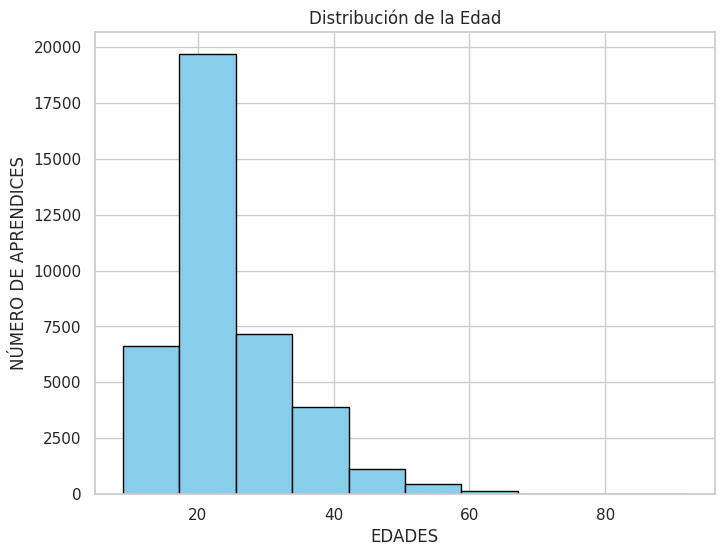

In [ ]:
# Graficar la distribución utilizando Matplotlib
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.hist(df['EDAD'], bins=10, color='skyblue', edgecolor='black')  # Histograma
plt.xlabel('EDADES')  # Etiqueta del eje x
plt.ylabel('NÚMERO DE APRENDICES')  # Etiqueta del eje y
plt.title('Distribución de la Edad')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar la gráfica

In [ ]:
df["CÓDIGO_TIPO_POBLACIÓN"].value_counts()

CÓDIGO_TIPO_POBLACIÓN
34.0     22518
3.0       4291
8.0       3760
64.0      1769
10.0      1193
14.0       768
127.0      473
6.0        394
130.0      386
11.0       364
138.0      171
4.0        139
101.0      120
124.0      101
129.0       80
13.0        74
19.0        72
123.0       57
132.0       40
20.0        38
121.0       34
26.0        33
12.0        26
137.0       26
122.0       26
24.0        21
135.0       19
25.0        19
9.0         15
104.0       15
134.0       14
143.0       11
102.0        6
126.0        6
131.0        5
105.0        4
139.0        3
136.0        2
140.0        2
33.0         1
141.0        1
Name: count, dtype: int64

In [ ]:
nulos=df["CÓDIGO_TIPO_POBLACIÓN"].isnull().sum()
unicos = len(df["CÓDIGO_TIPO_POBLACIÓN"].unique())
print("Valores Nulos: ", nulos, "\nValores Únicos: ",unicos)

Valores Nulos:  2005 
Valores Únicos:  42


In [ ]:
frecuencia = df["CÓDIGO_TIPO_POBLACIÓN"].value_counts()
total_valores = len(df["CÓDIGO_TIPO_POBLACIÓN"])
for CÓDIGO_TIPO_POBLACIÓN, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 1000:
      print(f"CÓDIGO_TIPO_POBLACIÓN: {CÓDIGO_TIPO_POBLACIÓN}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

CÓDIGO_TIPO_POBLACIÓN: 34.0, Frecuencia: 22518, Porcentaje: 57.59%
CÓDIGO_TIPO_POBLACIÓN: 3.0, Frecuencia: 4291, Porcentaje: 10.97%
CÓDIGO_TIPO_POBLACIÓN: 8.0, Frecuencia: 3760, Porcentaje: 9.62%
CÓDIGO_TIPO_POBLACIÓN: 64.0, Frecuencia: 1769, Porcentaje: 4.52%
CÓDIGO_TIPO_POBLACIÓN: 10.0, Frecuencia: 1193, Porcentaje: 3.05%


In [ ]:
df["NOMBRE_TIPO_POBLACIÓN"].value_counts()

NOMBRE_TIPO_POBLACIÓN
NINGUNA                                                                                     22518
DESPLAZADOS POR LA VIOLENCIA                                                                 4291
JOVENES VULNERABLES                                                                          3760
EMPRENDEDORES                                                                                1769
MUJER CABEZA DE FAMILIA                                                                      1193
ADOLESCENTE TRABAJADOR                                                                        768
AFROCOLOMBIANOS DESPLAZADOS POR LA VIOLENCIA                                                  473
INDIGENA                                                                                      394
AFROCOLOMBIANO                                                                                386
NEGRO                                                                                         36

In [ ]:
nulos=df["NOMBRE_TIPO_POBLACIÓN"].isnull().sum()
unicos = len(df["NOMBRE_TIPO_POBLACIÓN"].unique())
print("Valores Nulos: ", nulos, "\nValores Únicos: ",unicos)

Valores Nulos:  2005 
Valores Únicos:  42


In [ ]:
frecuencia = df["NOMBRE_TIPO_POBLACIÓN"].value_counts()
total_valores = len(df["NOMBRE_TIPO_POBLACIÓN"])
for NOMBRE_TIPO_POBLACIÓN, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 1000:
      print(f"NOMBRE_TIPO_POBLACIÓN: {NOMBRE_TIPO_POBLACIÓN}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

NOMBRE_TIPO_POBLACIÓN: NINGUNA, Frecuencia: 22518, Porcentaje: 57.59%
NOMBRE_TIPO_POBLACIÓN: DESPLAZADOS POR LA VIOLENCIA, Frecuencia: 4291, Porcentaje: 10.97%
NOMBRE_TIPO_POBLACIÓN: JOVENES VULNERABLES, Frecuencia: 3760, Porcentaje: 9.62%
NOMBRE_TIPO_POBLACIÓN: EMPRENDEDORES, Frecuencia: 1769, Porcentaje: 4.52%
NOMBRE_TIPO_POBLACIÓN: MUJER CABEZA DE FAMILIA, Frecuencia: 1193, Porcentaje: 3.05%


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR TIPO DE POBLACIÓN'}, ylabel='NOMBRE_TIPO_POBLACIÓN'>

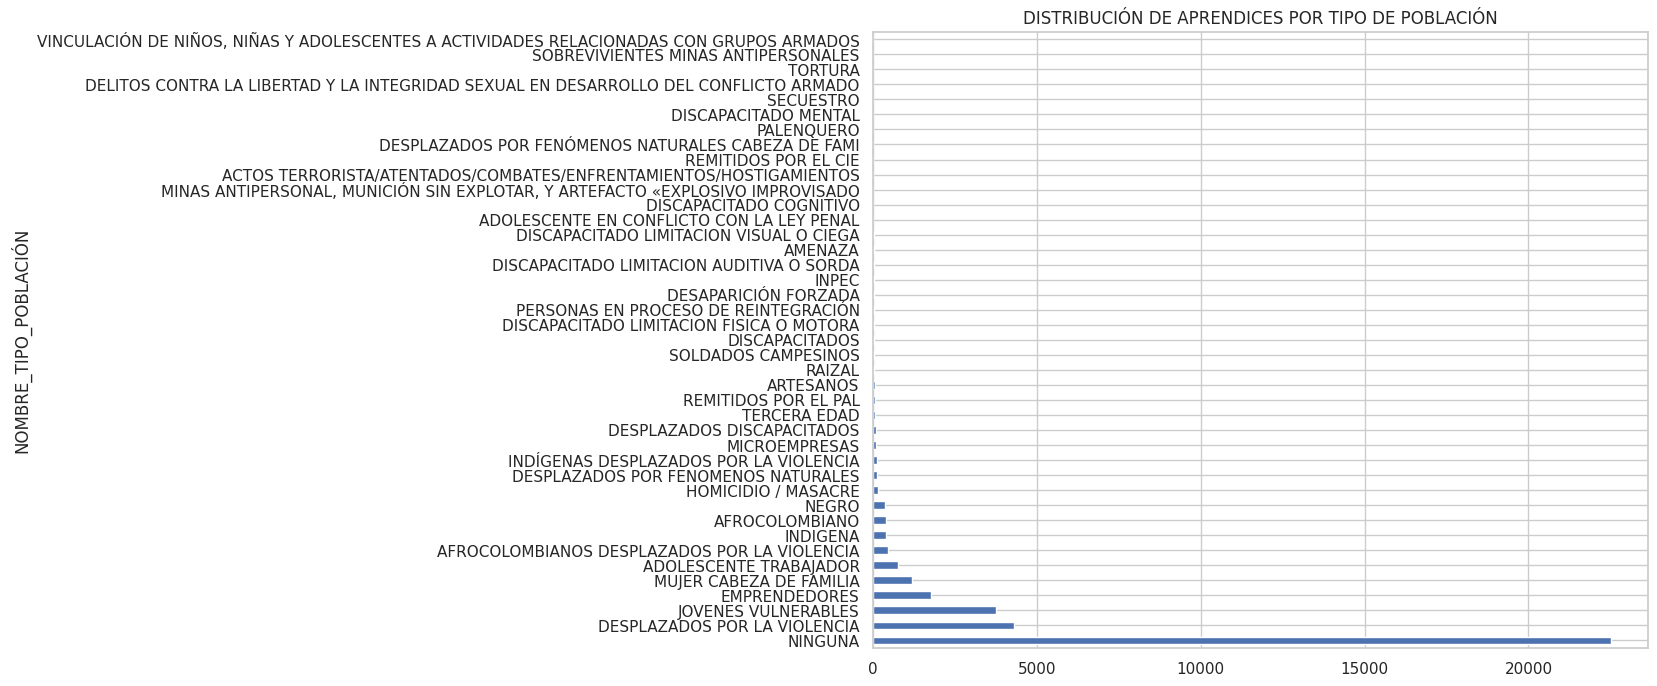

In [ ]:
plt.xlabel("NOMBRE_TIPO_POBLACIÓN")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR TIPO DE POBLACIÓN")
df["NOMBRE_TIPO_POBLACIÓN"].value_counts().plot(kind='barh', figsize=(10,8))

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR TIPO DE POBLACIÓN'}, xlabel='NOMBRE_TIPO_POBLACIÓN', ylabel='No. DE APRENDICES'>

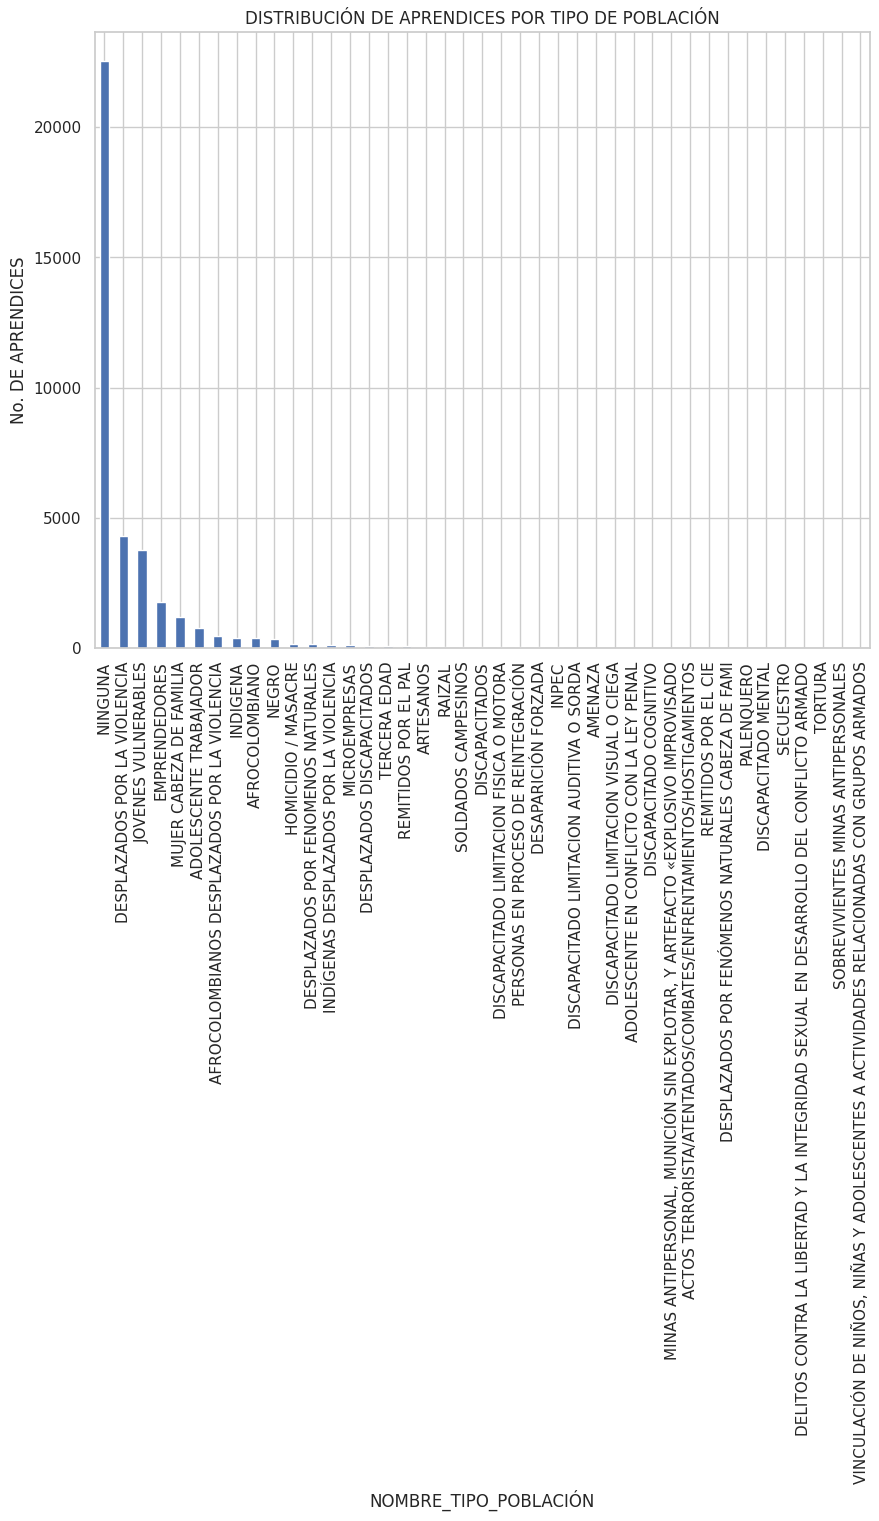

In [ ]:
plt.xlabel("NOMBRE_TIPO_POBLACIÓN")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR TIPO DE POBLACIÓN")
df["NOMBRE_TIPO_POBLACIÓN"].value_counts().plot(kind='bar', figsize=(10,8))

In [ ]:
df["APOYO_SOSTNMTO_2018"].value_counts()

APOYO_SOSTNMTO_2018
0    37502
1     1600
Name: count, dtype: int64

In [ ]:
frecuencia = df["APOYO_SOSTNMTO_2018"].value_counts()
total_valores = len(df["APOYO_SOSTNMTO_2018"])
for APOYO_SOSTNMTO_2018, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 1000:
      print(f"APOYO_SOSTNMTO_2018: {APOYO_SOSTNMTO_2018}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

APOYO_SOSTNMTO_2018: 0, Frecuencia: 37502, Porcentaje: 95.91%
APOYO_SOSTNMTO_2018: 1, Frecuencia: 1600, Porcentaje: 4.09%


In [ ]:
df["APOYO_SOSTNMTO_2019"].value_counts()

APOYO_SOSTNMTO_2019
0    37878
1     1224
Name: count, dtype: int64

In [ ]:
frecuencia = df["APOYO_SOSTNMTO_2019"].value_counts()
total_valores = len(df["APOYO_SOSTNMTO_2019"])
for APOYO_SOSTNMTO_2019, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 1000:
      print(f"APOYO_SOSTNMTO_2019: {APOYO_SOSTNMTO_2019}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

APOYO_SOSTNMTO_2019: 0, Frecuencia: 37878, Porcentaje: 96.87%
APOYO_SOSTNMTO_2019: 1, Frecuencia: 1224, Porcentaje: 3.13%


In [ ]:
df["APOYO_SOSTNMTO_2020"].value_counts()

APOYO_SOSTNMTO_2020
0    38993
1      109
Name: count, dtype: int64

In [ ]:
frecuencia = df["APOYO_SOSTNMTO_2020"].value_counts()
total_valores = len(df["APOYO_SOSTNMTO_2020"])
for APOYO_SOSTNMTO_2020, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    if conteo > 100:
      print(f"APOYO_SOSTNMTO_2020: {APOYO_SOSTNMTO_2020}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

APOYO_SOSTNMTO_2020: 0, Frecuencia: 38993, Porcentaje: 99.72%
APOYO_SOSTNMTO_2020: 1, Frecuencia: 109, Porcentaje: 0.28%


In [ ]:
df["APOYO_SOSTNMTO_2021"].value_counts()

APOYO_SOSTNMTO_2021
0    39102
Name: count, dtype: int64

In [ ]:
df["APOYO_SOSTNMTO_2022"].value_counts()

APOYO_SOSTNMTO_2022
0    39102
Name: count, dtype: int64

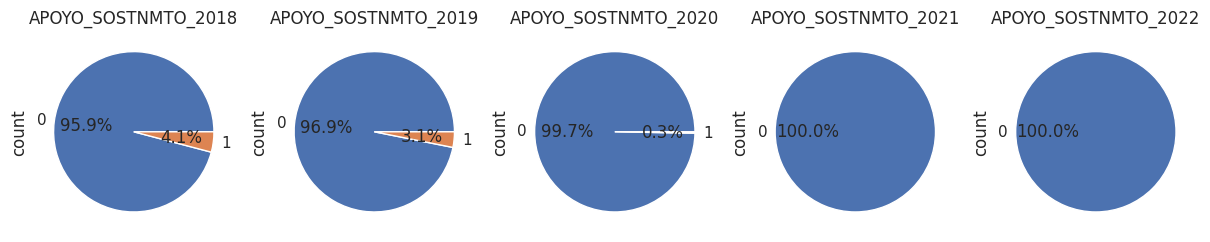

In [ ]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA APOYO_SOSTNMTO

plt.figure(figsize=(15,38))
plt.subplot(1,5,1)
df["APOYO_SOSTNMTO_2018"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_SOSTNMTO_2018")

plt.subplot(1,5,2)
df["APOYO_SOSTNMTO_2019"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_SOSTNMTO_2019")

plt.subplot(1,5,3)
df["APOYO_SOSTNMTO_2020"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_SOSTNMTO_2020")

plt.subplot(1,5,4)
df["APOYO_SOSTNMTO_2021"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_SOSTNMTO_2021")

plt.subplot(1,5,5)
df["APOYO_SOSTNMTO_2022"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_SOSTNMTO_2022")

plt.show()

In [ ]:
df["APOYO_FIC_2018"].value_counts()

APOYO_FIC_2018
0    37659
1     1443
Name: count, dtype: int64

In [ ]:
frecuencia = df["APOYO_FIC_2018"].value_counts()
total_valores = len(df["APOYO_FIC_2018"])
for APOYO_FIC_2018, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"APOYO_FIC_2018: {APOYO_FIC_2018}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

APOYO_FIC_2018: 0, Frecuencia: 37659, Porcentaje: 96.31%
APOYO_FIC_2018: 1, Frecuencia: 1443, Porcentaje: 3.69%


In [ ]:
df["APOYO_FIC_2019"].value_counts()

APOYO_FIC_2019
0    38146
1      956
Name: count, dtype: int64

In [ ]:
frecuencia = df["APOYO_FIC_2019"].value_counts()
total_valores = len(df["APOYO_FIC_2019"])
for APOYO_FIC_2019, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"APOYO_FIC_2019: {APOYO_FIC_2019}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

APOYO_FIC_2019: 0, Frecuencia: 38146, Porcentaje: 97.56%
APOYO_FIC_2019: 1, Frecuencia: 956, Porcentaje: 2.44%


In [ ]:
df["APOYO_FIC_2020"].value_counts()

APOYO_FIC_2020
0    39043
1       59
Name: count, dtype: int64

In [ ]:
frecuencia = df["APOYO_FIC_2020"].value_counts()
total_valores = len(df["APOYO_FIC_2020"])
for APOYO_FIC_2020, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"APOYO_FIC_2020: {APOYO_FIC_2020}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

APOYO_FIC_2020: 0, Frecuencia: 39043, Porcentaje: 99.85%
APOYO_FIC_2020: 1, Frecuencia: 59, Porcentaje: 0.15%


In [ ]:
df["APOYO_FIC_2021"].value_counts()

APOYO_FIC_2021
0    39102
Name: count, dtype: int64

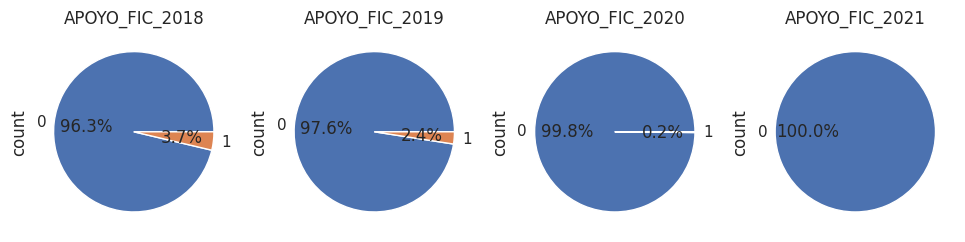

In [ ]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA APOYO_FIC

plt.figure(figsize=(15,38))
plt.subplot(1,5,1)
df["APOYO_FIC_2018"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_FIC_2018")

plt.subplot(1,5,2)
df["APOYO_FIC_2019"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_FIC_2019")

plt.subplot(1,5,3)
df["APOYO_FIC_2020"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_FIC_2020")

plt.subplot(1,5,4)
df["APOYO_FIC_2021"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_FIC_2021")

plt.show()

In [ ]:
df.isna().sum()

NIS                             0
GENERO                          0
FECHA_NACIMIENTO                0
ESTADO_CIVIL                    0
ESTRATO                         0
PUNTAJE_ICFES               37196
NIVEL_SISBEN                32105
DBU_HIJOS                   38987
COD_PAIS_RESIDENCIA             0
PAIS_RESIDENCIA                 0
COD_DPTO_RESIDENCIA             0
DPTO_RESIDENCIA                 0
COD_MUNICIPIO_RESIDENCIA        0
MUNICIPIO_RESIDENCIA            0
COD_ZONA_RESIDENCIA         36321
COD_BARRIO_RESIDENCIA       36682
CODIGO_ESTADO                   0
ESTADO_APRENDIZ                 0
COD_NIVEL_FORMACION             0
NIVEL_FORMACION                 0
MODALIDAD                       0
COD_PROGRAMA                    0
NOMBRE_PROGRAMA                 0
CODIGO_RED_CONOCIMIENTO     29138
NOM_RED_CONOCIMIENTO        29138
COD_LINEA_TECNOLÓGICA           0
NOM_LINEA_TECNOLÓGICA           0
CÓDIGO_TECNOLOGÍA_DE_RED        0
NOMBRE_TECNOLOGÍA_DE_RED        0
FICHA_NUM_CURS

In [ ]:
df.columns

Index(['NIS', 'GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'ESTRATO',
       'PUNTAJE_ICFES', 'NIVEL_SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESIDENCIA',
       'PAIS_RESIDENCIA', 'COD_DPTO_RESIDENCIA', 'DPTO_RESIDENCIA',
       'COD_MUNICIPIO_RESIDENCIA', 'MUNICIPIO_RESIDENCIA',
       'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA', 'CODIGO_ESTADO',
       'ESTADO_APRENDIZ', 'COD_NIVEL_FORMACION', 'NIVEL_FORMACION',
       'MODALIDAD', 'COD_PROGRAMA', 'NOMBRE_PROGRAMA',
       'CODIGO_RED_CONOCIMIENTO', 'NOM_RED_CONOCIMIENTO',
       'COD_LINEA_TECNOLÓGICA', 'NOM_LINEA_TECNOLÓGICA',
       'CÓDIGO_TECNOLOGÍA_DE_RED', 'NOMBRE_TECNOLOGÍA_DE_RED',
       'FICHA_NUM_CURSO', 'CÓDIGO_REGIONAL', 'NOMBRE_REGIONAL',
       'CÓDIGO_CENTRO', 'SEDE', 'EDAD', 'CÓDIGO_TIPO_POBLACIÓN',
       'NOMBRE_TIPO_POBLACIÓN', 'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019',
       'APOYO_SOSTNMTO_2020', 'APOYO_SOSTNMTO_2021', 'APOYO_SOSTNMTO_2022',
       'APOYO_SOSTNMTO_2023', 'APOYO_FIC_2018', 'APOYO_FIC_2019',
    

In [ ]:
col = ['GENERO', 'ESTADO_CIVIL', 'ESTRATO',
        'NIVEL_SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESIDENCIA',
       'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA',
       'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA', 'CODIGO_ESTADO',
       'ESTADO_APRENDIZ', 'COD_NIVEL_FORMACION', 'NIVEL_FORMACION',
       'MODALIDAD']
for n in col:
  print(n,"\n",df[n].value_counts())
  #print(col, df[n])

GENERO 
 GENERO
F    20044
M    19058
Name: count, dtype: int64
ESTADO_CIVIL 
 ESTADO_CIVIL
S    20606
N     9016
U     4310
I     2562
C     2234
E      317
V       57
Name: count, dtype: int64
ESTRATO 
 ESTRATO
1    19781
2    14611
3     4422
4      238
5       38
6       12
Name: count, dtype: int64
NIVEL_SISBEN 
 NIVEL_SISBEN
1.0    3205
2.0    2138
6.0    1127
3.0     523
4.0       4
Name: count, dtype: int64
DBU_HIJOS 
 DBU_HIJOS
0.0    94
1.0    14
2.0     7
Name: count, dtype: int64
COD_PAIS_RESIDENCIA 
 COD_PAIS_RESIDENCIA
57     39078
58         6
34         4
56         3
147        1
351        1
39         1
32         1
51         1
61         1
49         1
593        1
54         1
40         1
52         1
Name: count, dtype: int64
COD_DPTO_RESIDENCIA 
 COD_DPTO_RESIDENCIA
57011     9208
57005     3953
57025     3793
57068     1979
57008     1801
57023     1551
57054     1444
57076     1409
57013     1404
57015     1274
57086     1040
57047      886
57041      868
570

Concepto de Deserción
CODIGO_ESTADO: 1-Aplazado, 2-Cancelado, 6-Retiro Voluntario

In [ ]:
copia_df=df.copy()
copia_df['DESERCION']=''
desercion =[1,2,6]

In [ ]:
for e in range (0,len(copia_df['CODIGO_ESTADO'])):
  est=copia_df['CODIGO_ESTADO'][e]
  if est in desercion:
    copia_df['DESERCION'][e]= 1
  else:
    copia_df['DESERCION'][e]= 0

Se han truncado las últimas 5000 líneas del flujo de salida.
<ipython-input-531-124122adfdea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copia_df['DESERCION'][e]= 0
<ipython-input-531-124122adfdea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copia_df['DESERCION'][e]= 0
<ipython-input-531-124122adfdea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copia_df['DESERCION'][e]= 1
<ipython-input-531-124122adfdea>:4: SettingWithC

In [ ]:
copia_df['DESERCION'] .value_counts()

DESERCION
0    23738
1    15364
Name: count, dtype: int64

In [ ]:
print("NO DESERTÓ  {:.2f} %".format(copia_df.apply(lambda x: x['DESERCION'] == 0, axis=1).sum() / len(df) *100))
print("DESERTÓ  {:.2f} %".format(copia_df.apply(lambda x: x['DESERCION'] == 1, axis=1).sum() / len(df) *100))

NO DESERTÓ  60.71 %
DESERTÓ  39.29 %


<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES FRENTE A LA DESERCIÓN'}, xlabel='DESERCION', ylabel='No. DE APRENDICES'>

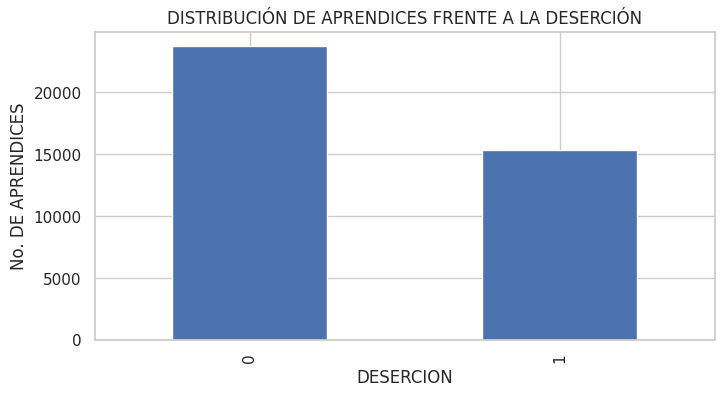

In [ ]:
plt.xlabel("DESERCIÓN (0-NO, 1-SI)")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES FRENTE A LA DESERCIÓN")
copia_df["DESERCION"].value_counts().plot(kind='bar',  figsize=(8,4))

Definición rango etareo: [17/3 2:35 p. m.] Soraida Lucero Aponte Botia
Niñez (de 0 a 11 años)
Adolescencia (de 12 a 18 años)
Juventud (de 19 a 30 años)
Adultez (de 31 a 60 años)
Vejez (de 60 años en adelante)

In [ ]:
copia_df['R_EDAD']=''

In [ ]:
for e in range (0,len(copia_df['EDAD'])):
  red=copia_df['EDAD'][e]
  if red >= 0 and red < 12:
    copia_df['R_EDAD'][e]= 'NIÑEZ'
  elif red >= 12 and red < 19:
    copia_df['R_EDAD'][e]= 'ADOLESCENCIA'
  elif red >= 19 and red < 31:
      copia_df['R_EDAD'][e]= 'JUVENTUD'
  elif red >= 31 and red < 60:
          copia_df['R_EDAD'][e]= 'ADULTEZ'
  else:
    copia_df['R_EDAD'][e]= 'VEJEZ'

Se han truncado las últimas 5000 líneas del flujo de salida.
<ipython-input-536-02abb7e86cb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copia_df['R_EDAD'][e]= 'ADOLESCENCIA'
<ipython-input-536-02abb7e86cb7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copia_df['R_EDAD'][e]= 'JUVENTUD'
<ipython-input-536-02abb7e86cb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copia_df['R_EDAD'][e]= 'ADOLESCENCIA'
<ipython-input-536-02a

In [ ]:
copia_df['R_EDAD'].value_counts()

R_EDAD
JUVENTUD        20345
ADOLESCENCIA    11065
ADULTEZ          7546
VEJEZ             145
NIÑEZ               1
Name: count, dtype: int64

In [ ]:
frecuencia = copia_df['R_EDAD'].value_counts()
total_valores = len(copia_df['R_EDAD'])
for R_EDAD, conteo in frecuencia.items():
    porcentaje = (conteo / total_valores) * 100
    print(f"R_EDAD: {R_EDAD}, Frecuencia: {conteo}, Porcentaje: {porcentaje:.2f}%")

R_EDAD: JUVENTUD, Frecuencia: 20345, Porcentaje: 52.03%
R_EDAD: ADOLESCENCIA, Frecuencia: 11065, Porcentaje: 28.30%
R_EDAD: ADULTEZ, Frecuencia: 7546, Porcentaje: 19.30%
R_EDAD: VEJEZ, Frecuencia: 145, Porcentaje: 0.37%
R_EDAD: NIÑEZ, Frecuencia: 1, Porcentaje: 0.00%


Text(0.5, 1.0, 'DISTRIBUCIÓN DE APRENDICES POR RANGO DE EDAD')

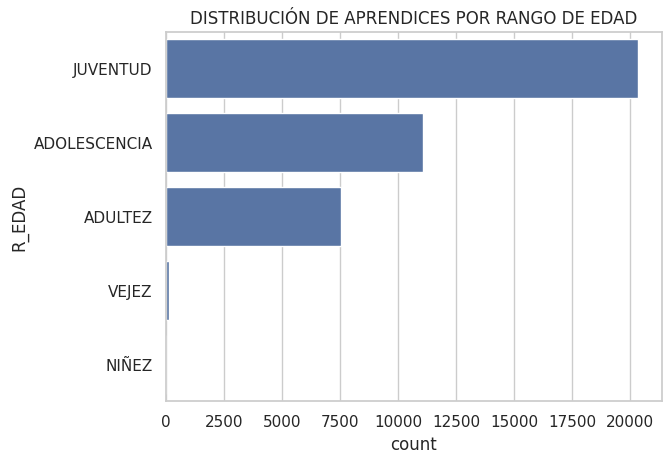

In [ ]:
figsize=(30,18)
sns.set_theme(style="whitegrid")
ax = sns.countplot(y=copia_df["R_EDAD"])
ax.set_title("DISTRIBUCIÓN DE APRENDICES POR RANGO DE EDAD")

#Análisis exploratorio:

In [ ]:
df.head()

NIS GENERO FECHA_NACIMIENTO ESTADO_CIVIL  ESTRATO PUNTAJE_ICFES  \
0  24761271      F       18/07/1998            N        2           NaN   
1  26253062      F       26/02/2001            S        2           NaN   
2   8597194      F       23/09/1974            S        4           NaN   
3  13609509      F       25/09/1978            S        3           NaN   
4  18038746      F       21/11/1999            S        1           NaN   

   NIVEL_SISBEN  DBU_HIJOS  COD_PAIS_RESIDENCIA PAIS_RESIDENCIA  ...  \
0           NaN        NaN                   57        COLOMBIA  ...   
1           NaN        NaN                   57        COLOMBIA  ...   
2           NaN        NaN                   57        COLOMBIA  ...   
3           NaN        NaN                   57        COLOMBIA  ...   
4           NaN        NaN                   57        COLOMBIA  ...   

   APOYO_SOSTNMTO_2018 APOYO_SOSTNMTO_2019  APOYO_SOSTNMTO_2020  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

  APOYO_SOSTNMTO_2021  APOYO_SOSTNMTO_2022  APOYO_SOSTNMTO_2023  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   APOYO_FIC_2018 APOYO_FIC_2019  APOYO_FIC_2020 APOYO_FIC_2021  
0               0              0               0              0  
1               0              0               0              0  
2               0              0               0              0  
3               0              0               0              0  
4               0              0               0              0  

[5 rows x 47 columns]

In [ ]:
df.shape

(39102, 47)

In [ ]:
df.columns

Index(['NIS', 'GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'ESTRATO',
       'PUNTAJE_ICFES', 'NIVEL_SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESIDENCIA',
       'PAIS_RESIDENCIA', 'COD_DPTO_RESIDENCIA', 'DPTO_RESIDENCIA',
       'COD_MUNICIPIO_RESIDENCIA', 'MUNICIPIO_RESIDENCIA',
       'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA', 'CODIGO_ESTADO',
       'ESTADO_APRENDIZ', 'COD_NIVEL_FORMACION', 'NIVEL_FORMACION',
       'MODALIDAD', 'COD_PROGRAMA', 'NOMBRE_PROGRAMA',
       'CODIGO_RED_CONOCIMIENTO', 'NOM_RED_CONOCIMIENTO',
       'COD_LINEA_TECNOLÓGICA', 'NOM_LINEA_TECNOLÓGICA',
       'CÓDIGO_TECNOLOGÍA_DE_RED', 'NOMBRE_TECNOLOGÍA_DE_RED',
       'FICHA_NUM_CURSO', 'CÓDIGO_REGIONAL', 'NOMBRE_REGIONAL',
       'CÓDIGO_CENTRO', 'SEDE', 'EDAD', 'CÓDIGO_TIPO_POBLACIÓN',
       'NOMBRE_TIPO_POBLACIÓN', 'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019',
       'APOYO_SOSTNMTO_2020', 'APOYO_SOSTNMTO_2021', 'APOYO_SOSTNMTO_2022',
       'APOYO_SOSTNMTO_2023', 'APOYO_FIC_2018', 'APOYO_FIC_2019',
    

In [ ]:
df.describe()

NIS       ESTRATO  NIVEL_SISBEN   DBU_HIJOS  \
count  3.910200e+04  39102.000000   6997.000000  115.000000   
mean   2.033092e+07      1.623523      2.262112    0.243478   
std    5.915964e+06      0.717811      1.744684    0.555535   
min    7.195145e+06      1.000000      1.000000    0.000000   
25%    1.597555e+07      1.000000      1.000000    0.000000   
50%    2.203987e+07      1.000000      2.000000    0.000000   
75%    2.579352e+07      2.000000      2.000000    0.000000   
max    3.368474e+07      6.000000      6.000000    2.000000   

       COD_PAIS_RESIDENCIA  COD_DPTO_RESIDENCIA  COD_MUNICIPIO_RESIDENCIA  \
count         39102.000000         39102.000000              3.910200e+04   
mean             57.019257         57051.949593              5.717261e+07   
std               3.139227          3139.223270              1.111482e+07   
min              32.000000         32001.000000              3.200100e+07   
25%              57.000000         57011.000000              5.701100e+07   
50%              57.000000         57023.000000              5.702318e+07   
75%              57.000000         57054.000000              5.705450e+07   
max             593.000000        593020.000000              1.000000e+09   

       COD_ZONA_RESIDENCIA  COD_BARRIO_RESIDENCIA  CODIGO_ESTADO  ...  \
count          2781.000000            2420.000000   39102.000000  ...   
mean            134.193456            2408.428099       3.565623  ...   
std             154.954509            2647.520692       2.215282  ...   
min               1.000000               2.000000       1.000000  ...   
25%              10.000000             484.750000       2.000000  ...   
50%              83.000000            1173.000000       3.000000  ...   
75%             208.000000            3095.500000       3.000000  ...   
max             466.000000            9310.000000      12.000000  ...   

       APOYO_SOSTNMTO_2018  APOYO_SOSTNMTO_2019  APOYO_SOSTNMTO_2020  \
count         39102.000000         39102.000000         39102.000000   
mean              0.040919             0.031303             0.002788   
std               0.198104             0.174137             0.052725   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               1.000000             1.000000             1.000000   

       APOYO_SOSTNMTO_2021  APOYO_SOSTNMTO_2022  APOYO_SOSTNMTO_2023  \
count              39102.0              39102.0              39102.0   
mean                   0.0                  0.0                  0.0   
std                    0.0                  0.0                  0.0   
min                    0.0                  0.0                  0.0   
25%                    0.0                  0.0                  0.0   
50%                    0.0                  0.0                  0.0   
75%                    0.0                  0.0                  0.0   
max                    0.0                  0.0                  0.0   

       APOYO_FIC_2018  APOYO_FIC_2019  APOYO_FIC_2020  APOYO_FIC_2021  
count    39102.000000    39102.000000    39102.000000         39102.0  
mean         0.036903        0.024449        0.001509             0.0  
std          0.188527        0.154440        0.038815             0.0  
min          0.000000        0.000000        0.000000             0.0  
25%          0.000000        0.000000        0.000000             0.0  
50%          0.000000        0.000000        0.000000             0.0  
75%          0.000000        0.000000        0.000000             0.0  
max          1.000000        1.000000        1.000000             0.0  

[8 rows x 30 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39102 entries, 0 to 39101
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NIS                       39102 non-null  int64  
 1   GENERO                    39102 non-null  object 
 2   FECHA_NACIMIENTO          39102 non-null  object 
 3   ESTADO_CIVIL              39102 non-null  object 
 4   ESTRATO                   39102 non-null  int64  
 5   PUNTAJE_ICFES             1906 non-null   object 
 6   NIVEL_SISBEN              6997 non-null   float64
 7   DBU_HIJOS                 115 non-null    float64
 8   COD_PAIS_RESIDENCIA       39102 non-null  int64  
 9   PAIS_RESIDENCIA           39102 non-null  object 
 10  COD_DPTO_RESIDENCIA       39102 non-null  int64  
 11  DPTO_RESIDENCIA           39102 non-null  object 
 12  COD_MUNICIPIO_RESIDENCIA  39102 non-null  int64  
 13  MUNICIPIO_RESIDENCIA      39102 non-null  object 
 14  COD_ZO

In [ ]:
def check(data):
    l=[]
    columns=data.columns
    for col in columns:
        dtypes=data[col].dtypes
        nunique=data[col].nunique()
        sum_null=data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    res=pd.DataFrame(l)
    res.columns=['column','dtypes','nunique','sum_null']
    return res
check(df)

column   dtypes  nunique  sum_null
0                        NIS    int64    38054         0
1                     GENERO   object        2         0
2           FECHA_NACIMIENTO   object    10113         0
3               ESTADO_CIVIL   object        7         0
4                    ESTRATO    int64        6         0
5              PUNTAJE_ICFES   object      543     37196
6               NIVEL_SISBEN  float64        5     32105
7                  DBU_HIJOS  float64        3     38987
8        COD_PAIS_RESIDENCIA    int64       15         0
9            PAIS_RESIDENCIA   object       15         0
10       COD_DPTO_RESIDENCIA    int64       51         0
11           DPTO_RESIDENCIA   object       53         0
12  COD_MUNICIPIO_RESIDENCIA    int64      900         0
13      MUNICIPIO_RESIDENCIA   object      853         0
14       COD_ZONA_RESIDENCIA  float64      273     36321
15     COD_BARRIO_RESIDENCIA  float64     1245     36682
16             CODIGO_ESTADO    int64        9         0
17           ESTADO_APRENDIZ   object        9         0
18       COD_NIVEL_FORMACION    int64        6         0
19           NIVEL_FORMACION   object        6         0
20                 MODALIDAD   object        1         0
21              COD_PROGRAMA    int64      215         0
22           NOMBRE_PROGRAMA   object      215         0
23   CODIGO_RED_CONOCIMIENTO  float64       26     29138
24      NOM_RED_CONOCIMIENTO   object       26     29138
25     COD_LINEA_TECNOLÓGICA    int64        5         0
26     NOM_LINEA_TECNOLÓGICA   object        5         0
27  CÓDIGO_TECNOLOGÍA_DE_RED    int64       24         0
28  NOMBRE_TECNOLOGÍA_DE_RED   object       24         0
29           FICHA_NUM_CURSO    int64     1381         0
30           CÓDIGO_REGIONAL    int64       33         0
31           NOMBRE_REGIONAL   object       33         0
32             CÓDIGO_CENTRO    int64      110         0
33                      SEDE   object      103         0
34                      EDAD    int64       76         0
35     CÓDIGO_TIPO_POBLACIÓN  float64       41      2005
36     NOMBRE_TIPO_POBLACIÓN   object       41      2005
37       APOYO_SOSTNMTO_2018    int64        2         0
38       APOYO_SOSTNMTO_2019    int64        2         0
39       APOYO_SOSTNMTO_2020    int64        2         0
40       APOYO_SOSTNMTO_2021    int64        1         0
41       APOYO_SOSTNMTO_2022    int64        1         0
42       APOYO_SOSTNMTO_2023    int64        1         0
43            APOYO_FIC_2018    int64        2         0
44            APOYO_FIC_2019    int64        2         0
45            APOYO_FIC_2020    int64        2         0
46            APOYO_FIC_2021    int64        1         0

In [ ]:
# confirmar qué hace este código
#from matplotlib import pyplot as plt
#_df_0['nunique'].plot(kind='hist', bins=20, title='nunique')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
C_col = []
N_col = []
for col in df.columns:
    if df[col].dtype == 'object':
        C_col.append(col)
    else:
        N_col.append(col)

# Imprimir las listas actualizadas
print(f"# Columnas Numéricas = {len(N_col)}", N_col)
print(f"# Columnas Categóricas = {len(C_col)}", C_col)

# Columnas Numéricas = 30 ['NIS', 'ESTRATO', 'NIVEL_SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESIDENCIA', 'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA', 'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA', 'CODIGO_ESTADO', 'COD_NIVEL_FORMACION', 'COD_PROGRAMA', 'CODIGO_RED_CONOCIMIENTO', 'COD_LINEA_TECNOLÓGICA', 'CÓDIGO_TECNOLOGÍA_DE_RED', 'FICHA_NUM_CURSO', 'CÓDIGO_REGIONAL', 'CÓDIGO_CENTRO', 'EDAD', 'CÓDIGO_TIPO_POBLACIÓN', 'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019', 'APOYO_SOSTNMTO_2020', 'APOYO_SOSTNMTO_2021', 'APOYO_SOSTNMTO_2022', 'APOYO_SOSTNMTO_2023', 'APOYO_FIC_2018', 'APOYO_FIC_2019', 'APOYO_FIC_2020', 'APOYO_FIC_2021']
# Columnas Categóricas = 17 ['GENERO', 'FECHA_NACIMIENTO', 'ESTADO_CIVIL', 'PUNTAJE_ICFES', 'PAIS_RESIDENCIA', 'DPTO_RESIDENCIA', 'MUNICIPIO_RESIDENCIA', 'ESTADO_APRENDIZ', 'NIVEL_FORMACION', 'MODALIDAD', 'NOMBRE_PROGRAMA', 'NOM_RED_CONOCIMIENTO', 'NOM_LINEA_TECNOLÓGICA', 'NOMBRE_TECNOLOGÍA_DE_RED', 'NOMBRE_REGIONAL', 'SEDE', 'NOMBRE_TIPO_POBLACIÓN']


In [ ]:
print("Análisis de Columnas Categóricas")
result_dfs = []
for col in C_col:
    col_counts = df[col].value_counts()
    total_rows = len(df)
    col_percentages = (col_counts / total_rows) * 100

    result_df = pd.DataFrame({
        "Valores Únicos": col_counts.index,
        "Recuento": col_counts.values,
        "Porcentaje por Categoría": col_percentages.values
    })
    result_dfs.append(result_df)
for col, result_df in zip(C_col, result_dfs):
    print(f"\nAnálisis para la columna '{col}':")
    display(result_df)
    print("-" * 50)

Análisis de Columnas Categóricas

Análisis para la columna 'GENERO':


Valores Únicos  Recuento  Porcentaje por Categoría
0              F     20044                 51.260805
1              M     19058                 48.739195

--------------------------------------------------

Análisis para la columna 'FECHA_NACIMIENTO':


Valores Únicos  Recuento  Porcentaje por Categoría
0          1/01/2000        35                  0.089509
1         21/12/2000        32                  0.081837
2          4/12/2000        28                  0.071608
3         26/05/2000        27                  0.069050
4         18/02/2000        25                  0.063935
...              ...       ...                       ...
10108     13/02/1964         1                  0.002557
10109      2/01/1972         1                  0.002557
10110      4/05/1987         1                  0.002557
10111     12/10/2001         1                  0.002557
10112     13/11/1961         1                  0.002557

[10113 rows x 3 columns]

--------------------------------------------------

Análisis para la columna 'ESTADO_CIVIL':


Valores Únicos  Recuento  Porcentaje por Categoría
0              S     20606                 52.698072
1              N      9016                 23.057644
2              U      4310                 11.022454
3              I      2562                  6.552095
4              C      2234                  5.713263
5              E       317                  0.810700
6              V        57                  0.145773

--------------------------------------------------

Análisis para la columna 'PUNTAJE_ICFES':


Valores Únicos  Recuento  Porcentaje por Categoría
0               45        29                  0.074165
1              250        24                  0.061378
2              298        21                  0.053706
3              300        19                  0.048591
4               49        19                  0.048591
..             ...       ...                       ...
538            208         1                  0.002557
539            452         1                  0.002557
540            422         1                  0.002557
541            203         1                  0.002557
542           66.0         1                  0.002557

[543 rows x 3 columns]

--------------------------------------------------

Análisis para la columna 'PAIS_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0         COLOMBIA     39078                 99.938622
1        VENEZUELA         6                  0.015344
2           ESPAÑA         4                  0.010230
3            CHILE         3                  0.007672
4   ESTADOS UNIDOS         1                  0.002557
5         PORTUGAL         1                  0.002557
6           ITALIA         1                  0.002557
7          BÉLGICA         1                  0.002557
8             PERÚ         1                  0.002557
9        AUSTRALIA         1                  0.002557
10        ALEMANIA         1                  0.002557
11         ECUADOR         1                  0.002557
12       ARGENTINA         1                  0.002557
13         RUMANIA         1                  0.002557
14          MÉXICO         1                  0.002557

--------------------------------------------------

Análisis para la columna 'DPTO_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0                        BOGOTÁ D.C.      9208                 23.548668
1                          ANTIOQUIA      3953                 10.109457
2                       CUNDINAMARCA      3793                  9.700271
3                          SANTANDER      1979                  5.061122
4                          ATLÁNTICO      1801                  4.605903
5                            CÓRDOBA      1551                  3.966549
6                 NORTE DE SANTANDER      1444                  3.692906
7                    VALLE DEL CAUCA      1409                  3.603396
8                            BOLÍVAR      1404                  3.590609
9                             BOYACÁ      1274                  3.258145
10                          PUTUMAYO      1039                  2.657153
11                         MAGDALENA       885                  2.263311
12                             HUILA       868                  2.219835
13                         RISARALDA       848                  2.168687
14                          CASANARE       828                  2.117539
15                           QUINDÍO       817                  2.089407
16                              META       746                  1.907831
17                            TOLIMA       732                  1.872027
18                            NARIÑO       616                  1.575367
19                             CHOCÓ       592                  1.513989
20                             SUCRE       588                  1.503759
21                             CAUCA       470                  1.201985
22                            CALDAS       438                  1.120147
23                            ARAUCA       398                  1.017851
24                           CAQUETÁ       379                  0.969260
25                          GUAVIARE       204                  0.521712
26                        LA GUAJIRA       186                  0.475679
27                           GUAINÍA       171                  0.437318
28                             CESAR       155                  0.396399
29                           VICHADA       103                  0.263414
30          SAN ANDRÉS Y PROVIDENCIA        85                  0.217380
31                            VAUPÉS        68                  0.173904
32                          AMAZONAS        44                  0.112526
33                           TÁCHIRA         5                  0.012787
34                            MADRID         3                  0.007672
35  REGIÓN METROPOLITANA DE SANTIAGO         1                  0.002557
36                          A CORUÑA         1                  0.002557
37                          BUCAREST         1                  0.002557
38                   IX LA ARAUCANÍA         1                  0.002557
39                       IV COQUIMBO         1                  0.002557
40                  DISTRITO FEDERAL         1                  0.002557
41                         PICHINCHA         1                  0.002557
42                        MAGDALENA          1                  0.002557
43                         PUTUMAYO          1                  0.002557
44                             APURE         1                  0.002557
45   RENANIA SEPTENTRIONAL-WESTFALIA         1                  0.002557
46                          VICTORIA         1                  0.002557
47                              LIMA         1                  0.002557
48                          BRUSELAS         1                  0.002557
49                            ANCONA         1                  0.002557
50                           SETÚBAL         1                  0.002557
51                           FLORIDA         1                  0.002557
52                           DURANGO         1                  0.002557

--------------------------------------------------

Análisis para la columna 'MUNICIPIO_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0                   BOGOTÁ      9208                 23.548668
1                 MEDELLÍN      1702                  4.352719
2                CARTAGENA      1068                  2.731318
3                   SOACHA       947                  2.421871
4             BARRANQUILLA       912                  2.332362
..                     ...       ...                       ...
848               REMOLINO         1                  0.002557
849            ANGELOPOLIS         1                  0.002557
850            TAMALAMEQUE         1                  0.002557
851             LA FLORIDA         1                  0.002557
852  SANTA HELENA DEL OPÓN         1                  0.002557

[853 rows x 3 columns]

--------------------------------------------------

Análisis para la columna 'ESTADO_APRENDIZ':


Valores Únicos  Recuento  Porcentaje por Categoría
0        CERTIFICADO     19896                 50.882308
1          CANCELADO     11859                 30.328372
2  RETIRO VOLUNTARIO      3487                  8.917702
3          FORMACION      1819                  4.651936
4           TRASLADO      1772                  4.531738
5     POR CERTIFICAR       226                  0.577976
6           APLAZADO        18                  0.046033
7       CONDICIONADO        15                  0.038361
8          INDUCCION        10                  0.025574

--------------------------------------------------

Análisis para la columna 'NIVEL_FORMACION':


Valores Únicos  Recuento  Porcentaje por Categoría
0                      TÉCNICO     26480                 67.720321
1                    TECNÓLOGO     10162                 25.988440
2  ESPECIALIZACIÓN TECNOLÓGICA      1038                  2.654596
3                     OPERARIO       978                  2.501151
4                     AUXILIAR       379                  0.969260
5       PROFUNDIZACIÓN TÉCNICA        65                  0.166232

--------------------------------------------------

Análisis para la columna 'MODALIDAD':


Valores Únicos  Recuento  Porcentaje por Categoría
0     PRESENCIAL     39102                     100.0

--------------------------------------------------

Análisis para la columna 'NOMBRE_PROGRAMA':


Valores Únicos  Recuento  \
0                            ASISTENCIA ADMINISTRATIVA      2361   
1                                             SISTEMAS      2341   
2                           GESTIÓN DEL TALENTO HUMANO      1478   
3    CONTABILIZACIÓN DE OPERACIONES COMERCIALES Y F...      1367   
4               ASISTENCIA EN ORGANIZACIÓN DE ARCHIVOS      1231   
..                                                 ...       ...   
210  INSPECCION Y ENSAYOS CON PROCESOS NO DESTRUCTIVOS        15   
211            CONSTRUCCIÓN DE ESTRUCTURAS EN CONCRETO        15   
212     GESTIÓN SOSTENIBLE DE LA BIODIVERSIDAD VEGETAL        15   
213                              INFORMACIÓN TURÍSTICA        15   
214                                  MANEJO DE VIVEROS         7   

     Porcentaje por Categoría  
0                    6.038054  
1                    5.986906  
2                    3.779858  
3                    3.495985  
4                    3.148177  
..                        ...  
210                  0.038361  
211                  0.038361  
212                  0.038361  
213                  0.038361  
214                  0.017902  

[215 rows x 3 columns]

--------------------------------------------------

Análisis para la columna 'NOM_RED_CONOCIMIENTO':


Valores Únicos  Recuento  \
0                        RED DE CONOCIMIENTO EN SALUD      1438   
1            RED DE CONOCIMIENTO EN ENERGÍA ELÉCTRICA      1308   
2   RED DE CONOCIMIENTO EN ELECTRÓNICA Y AUTOMATIZ...       886   
3          RED DE CONOCIMIENTO EN MECÁNICA INDUSTRIAL       854   
4                        RED DE CONOCIMIENTO AGRÍCOLA       677   
5   RED DE CONOCIMIENTO TEXTIL, CONFECCIÓN, DISEÑO...       611   
6         RED DE CONOCIMIENTO EN SERVICIOS PERSONALES       606   
7                       RED DE CONOCIMIENTO AUTOMOTOR       536   
8   RED DE CONOCIMIENTO EN GESTIÓN ADMINISTRATIVA,...       454   
9   RED DE CONOCIMIENTO EN INFORMÁTICA, DISEÑO Y D...       337   
10           RED DE CONOCIMIENTO EN COMERCIO Y VENTAS       320   
11  RED DE CONOCIMIENTO EN CONSTRUCCIÓN E INFRAEST...       258   
12                  RED DE CONOCIMIENTO EN TRANSPORTE       254   
13  RED DE CONOCIMIENTO EN ACTIVIDAD FÍSICA, RECRE...       247   
14                     RED DE CONOCIMIENTO EN MINERÍA       210   
15                     RED DE CONOCIMIENTO EN CULTURA       139   
16         RED DE CONOCIMIENTO EN HOTELERÍA Y TURISMO       126   
17                      RED DE CONOCIMIENTO AMBIENTAL       112   
18                       RED DE CONOCIMIENTO PECUARIA       110   
19                 RED DE CONOCIMIENTO EN ARTESANÍAS        106   
20  RED DE CONOCIMIENTO EN LOGÍSTICA Y GESTIÓN DE ...        86   
21          RED DE CONOCIMIENTO EN TELECOMUNICACIONES        84   
22            RED DE CONOCIMIENTO ACUÍCOLA Y DE PESCA        80   
23              RED DE CONOCIMIENTO EN ARTES GRÁFICAS        69   
24  RED DE CONOCIMIENTO EN MATERIALES PARA LA INDU...        37   
25  RED DE CONOCIMIENTO EN CUERO, CALZADO, Y MARRO...        19   

    Porcentaje por Categoría  
0                   3.677561  
1                   3.345097  
2                   2.265869  
3                   2.184032  
4                   1.731369  
5                   1.562580  
6                   1.549793  
7                   1.370774  
8                   1.161066  
9                   0.861848  
10                  0.818372  
11                  0.659813  
12                  0.649583  
13                  0.631681  
14                  0.537057  
15                  0.355481  
16                  0.322234  
17                  0.286430  
18                  0.281316  
19                  0.271086  
20                  0.219938  
21                  0.214823  
22                  0.204593  
23                  0.176462  
24                  0.094624  
25                  0.048591

--------------------------------------------------

Análisis para la columna 'NOM_LINEA_TECNOLÓGICA':


Valores Únicos  Recuento  \
0                                            CLIENTE     20643   
1                        PRODUCCIÓN Y TRANSFORMACIÓN      9012   
2  TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACI...      5568   
3                            MATERIALES HERRAMIENTAS      2105   
4                                             DISEÑO      1774   

   Porcentaje por Categoría  
0                 52.792696  
1                 23.047414  
2                 14.239681  
3                  5.383356  
4                  4.536852

--------------------------------------------------

Análisis para la columna 'NOMBRE_TECNOLOGÍA_DE_RED':


Valores Únicos  Recuento  \
0   TECNOLOGÍAS DE GESTIÓN ADMINISTRATIVA Y SERVIC...     12248   
1   TECNOLOGÍAS DE LA INFORMACIÓN, DISEÑO Y DESARR...      4992   
2                   TECNOLOGÍAS DE SERVICIOS DE SALUD      3467   
3   TECNOLOGÍAS DE MANTENIMIENTO PREDICTIVO, PREVE...      2740   
4                 TECNOLOGÍAS DE SERVICIOS TURÍSTICOS      2452   
5               TECNOLOGÍAS  DE PRODUCCIÓN INDUSTRIAL      2234   
6                     MATERIALES PARA LA CONSTRUCCIÓN      1974   
7                              LOGÍSTICA Y TRANSPORTE      1489   
8                               TECNOLOGÍAS AGRÍCOLAS      1453   
9                   TECNOLOGÍAS  DE PRODUCCIÓN LIMPIA      1311   
10                          VENTAS Y COMERCIALIZACIÓN       970   
11                     DISEÑO DE MODAS Y CONFECCIONES       946   
12                              TECNOLOGÍAS PECUARIAS       589   
13  TECNOLOGÍAS DE LA INFORMACIÓN Y LAS COMUNICACI...       576   
14         DISEÑO DE MÁQUINAS Y EQUIPOS AUTOMATIZADOS       488   
15                      TECNOLOGÍAS  AGROINDUSTRIALES       372   
16                                 DISEÑO DE PRODUCTO       234   
17          EXPLOTACIÓN Y TRANSFORMACIÓN DE MINERALES       210   
18              DISEÑO DE JOYAS Y OBJETOS ARTESANALES       106   
19                TECNOLOGÍAS  DE PRODUCCIÓN ACUÍCOLA       103   
20                          BIOTECNOLOGÍA  INDUSTRIAL        86   
21                             BIOTECNOLOGÍA  VEGETAL        23   
22                       MATERIALES PARA LA INDUSTRIA        22   
23  INVESTIGACIÓN, PLANEACIÓN Y DESARROLLO DE MERC...        17   

    Porcentaje por Categoría  
0                  31.323206  
1                  12.766610  
2                   8.866554  
3                   7.007314  
4                   6.270779  
5                   5.713263  
6                   5.048335  
7                   3.807989  
8                   3.715922  
9                   3.352770  
10                  2.480692  
11                  2.419314  
12                  1.506317  
13                  1.473070  
14                  1.248018  
15                  0.951358  
16                  0.598435  
17                  0.537057  
18                  0.271086  
19                  0.263414  
20                  0.219938  
21                  0.058821  
22                  0.056263  
23                  0.043476

--------------------------------------------------

Análisis para la columna 'NOMBRE_REGIONAL':


Valores Únicos  Recuento  Porcentaje por Categoría
0     REGIONAL DISTRITO CAPITAL      9699                 24.804358
1            REGIONAL ANTIOQUIA      4024                 10.291034
2         REGIONAL CUNDINAMARCA      3557                  9.096721
3            REGIONAL SANTANDER      2088                  5.339880
4            REGIONAL ATLÁNTICO      1841                  4.708199
5              REGIONAL CÓRDOBA      1509                  3.859138
6   REGIONAL NORTE DE SANTANDER      1454                  3.718480
7              REGIONAL BOLÍVAR      1335                  3.414148
8                REGIONAL VALLE      1334                  3.411590
9               REGIONAL BOYACÁ      1263                  3.230014
10            REGIONAL PUTUMAYO      1103                  2.820828
11             REGIONAL QUINDÍO       883                  2.258197
12           REGIONAL RISARALDA       876                  2.240295
13               REGIONAL HUILA       871                  2.227508
14           REGIONAL MAGDALENA       853                  2.181474
15            REGIONAL CASANARE       773                  1.976881
16                REGIONAL META       692                  1.769730
17               REGIONAL CHOCÓ       616                  1.575367
18              REGIONAL NARIÑO       589                  1.506317
19               REGIONAL SUCRE       564                  1.442381
20              REGIONAL TOLIMA       564                  1.442381
21               REGIONAL CAUCA       448                  1.145721
22              REGIONAL ARAUCA       434                  1.109918
23             REGIONAL CAQUETÁ       381                  0.974375
24              REGIONAL CALDAS       376                  0.961588
25            REGIONAL GUAVIARE       217                  0.554959
26             REGIONAL GUAJIRA       179                  0.457777
27             REGIONAL GUAINÍA       177                  0.452662
28             REGIONAL VICHADA       108                  0.276201
29               REGIONAL CESAR        92                  0.235282
30          REGIONAL SAN ANDRÉS        91                  0.232725
31              REGIONAL VAUPÉS        75                  0.191806
32            REGIONAL AMAZONAS        36                  0.092067

--------------------------------------------------

Análisis para la columna 'SEDE':


Valores Únicos  Recuento  \
0                     CENTRO DE GESTION ADMINISTRATIVA      2235   
1                       CENTRO DE COMERCIO Y SERVICIOS      2211   
2                      CENTRO DE SERVICIOS FINANCIEROS      2006   
3    CENTRO DE ELECTRICIDAD, ELECTRÓNICA Y TELECOMU...      1442   
4    CENTRO DE LA INDUSTRIA, LA EMPRESA Y LOS SERVI...      1127   
..                                                 ...       ...   
98                  CENTRO DE INDUSTRIA Y CONSTRUCCION        33   
99   CENTRO AGROINDUSTRIAL Y PESQUERO DE LA COSTA P...        31   
100  CENTRO DE LOS RECURSOS NATURALES RENOVABLES - ...        29   
101  COMPLEJO TECNOLOGICO, TURISTICO Y AGROINDUSTRI...        28   
102  CENTRO DE FORMACIÓN EN DISEÑO, CONFECCIÓN Y MODA.        25   

     Porcentaje por Categoría  
0                    5.715820  
1                    5.654442  
2                    5.130172  
3                    3.687791  
4                    2.882206  
..                        ...  
98                   0.084395  
99                   0.079280  
100                  0.074165  
101                  0.071608  
102                  0.063935  

[103 rows x 3 columns]

--------------------------------------------------

Análisis para la columna 'NOMBRE_TIPO_POBLACIÓN':


Valores Únicos  Recuento  \
0                                             NINGUNA     22518   
1                        DESPLAZADOS POR LA VIOLENCIA      4291   
2                                 JOVENES VULNERABLES      3760   
3                                       EMPRENDEDORES      1769   
4                             MUJER CABEZA DE FAMILIA      1193   
5                              ADOLESCENTE TRABAJADOR       768   
6        AFROCOLOMBIANOS DESPLAZADOS POR LA VIOLENCIA       473   
7                                            INDIGENA       394   
8                                      AFROCOLOMBIANO       386   
9                                               NEGRO       364   
10                                HOMICIDIO / MASACRE       171   
11                DESPLAZADOS POR FENOMENOS NATURALES       139   
12             INDÍGENAS DESPLAZADOS POR LA VIOLENCIA       120   
13                                      MICROEMPRESAS       101   
14                         DESPLAZADOS DISCAPACITADOS        80   
15                                       TERCERA EDAD        74   
16                               REMITIDOS POR EL PAL        72   
17                                          ARTESANOS        57   
18                                             RAIZAL        40   
19                                SOLDADOS CAMPESINOS        38   
20                                     DISCAPACITADOS        34   
21           DISCAPACITADO LIMITACION FISICA O MOTORA        33   
22               PERSONAS EN PROCESO DE REINTEGRACIÓN        26   
23                               DESAPARICIÓN FORZADA        26   
24                                              INPEC        26   
25          DISCAPACITADO LIMITACION AUDITIVA O SORDA        21   
26                                            AMENAZA        19   
27            DISCAPACITADO LIMITACION VISUAL O CIEGA        19   
28          ADOLESCENTE EN CONFLICTO CON LA LEY PENAL        15   
29                            DISCAPACITADO COGNITIVO        15   
30  MINAS ANTIPERSONAL, MUNICIÓN SIN EXPLOTAR, Y A...        14   
31  ACTOS TERRORISTA/ATENTADOS/COMBATES/ENFRENTAMI...        11   
32                               REMITIDOS POR EL CIE         6   
33  DESPLAZADOS POR FENÓMENOS NATURALES CABEZA DE ...         6   
34                                         PALENQUERO         5   
35                               DISCAPACITADO MENTAL         4   
36                                          SECUESTRO         3   
37  DELITOS CONTRA LA LIBERTAD Y LA INTEGRIDAD SEX...         2   
38                                            TORTURA         2   
39                SOBREVIVIENTES MINAS ANTIPERSONALES         1   
40  VINCULACIÓN DE NIÑOS, NIÑAS Y ADOLESCENTES A A...         1   

    Porcentaje por Categoría  
0                  57.587847  
1                  10.973863  
2                   9.615876  
3                   4.524065  
4                   3.050995  
5                   1.964094  
6                   1.209657  
7                   1.007621  
8                   0.987162  
9                   0.930899  
10                  0.437318  
11                  0.355481  
12                  0.306890  
13                  0.258299  
14                  0.204593  
15                  0.189249  
16                  0.184134  
17                  0.145773  
18                  0.102297  
19                  0.097182  
20                  0.086952  
21                  0.084395  
22                  0.066493  
23                  0.066493  
24                  0.066493  
25                  0.053706  
26                  0.048591  
27                  0.048591  
28                  0.038361  
29                  0.038361  
30                  0.035804  
31                  0.028132  
32                  0.015344  
33                  0.015344  
34                  0.012787  
35                  0.010230  
36                  0.007672  
37                  0.005115  
38             

--------------------------------------------------


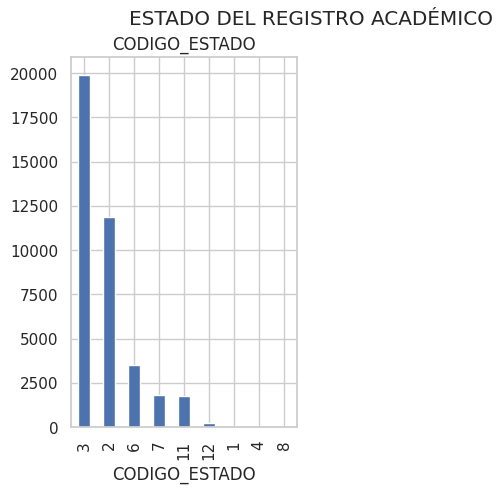

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR ESTADO'}, xlabel='CODIGO_ESTADO', ylabel='CÓDIGO DE ESTADOS'>

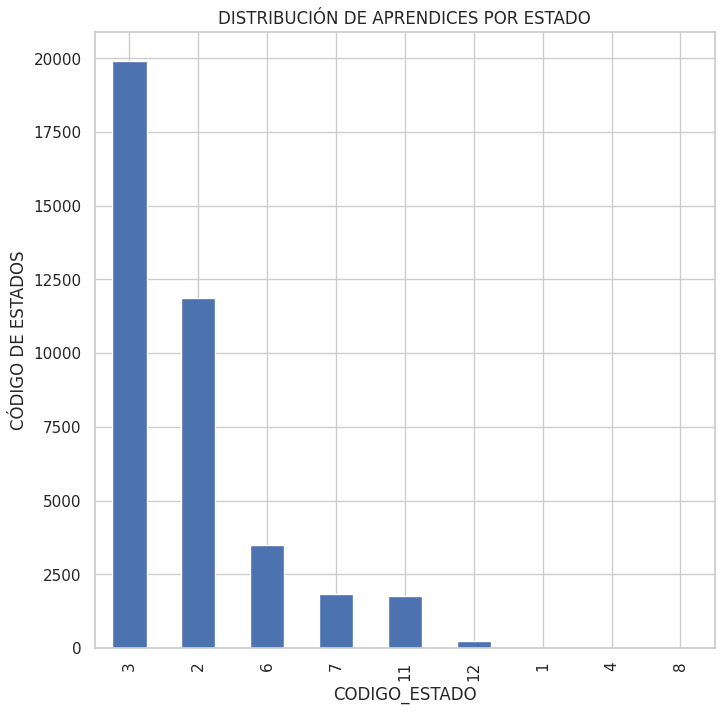

In [ ]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA GENERO
CODIGO_ESTADO = df["CODIGO_ESTADO"].value_counts()
plt.subplot(1,2,1)
plt.title("CODIGO_ESTADO")
CODIGO_ESTADO.plot(kind="bar")
plt.suptitle("ESTADO DEL REGISTRO ACADÉMICO")
plt.show()

plt.xlabel("CANTIDAD DE APRENDICES")
plt.ylabel("CÓDIGO DE ESTADOS")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTADO")
df["CODIGO_ESTADO"].value_counts().plot(kind='bar', figsize=(8,8))

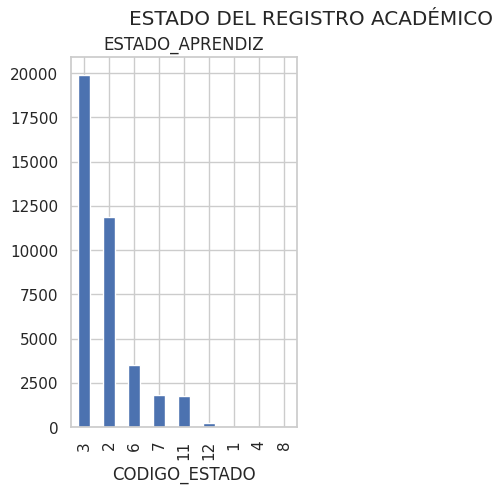

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR ESTADO'}, xlabel='ESTADO_APRENDIZ', ylabel='CANTIDAD DE APRENDICES'>

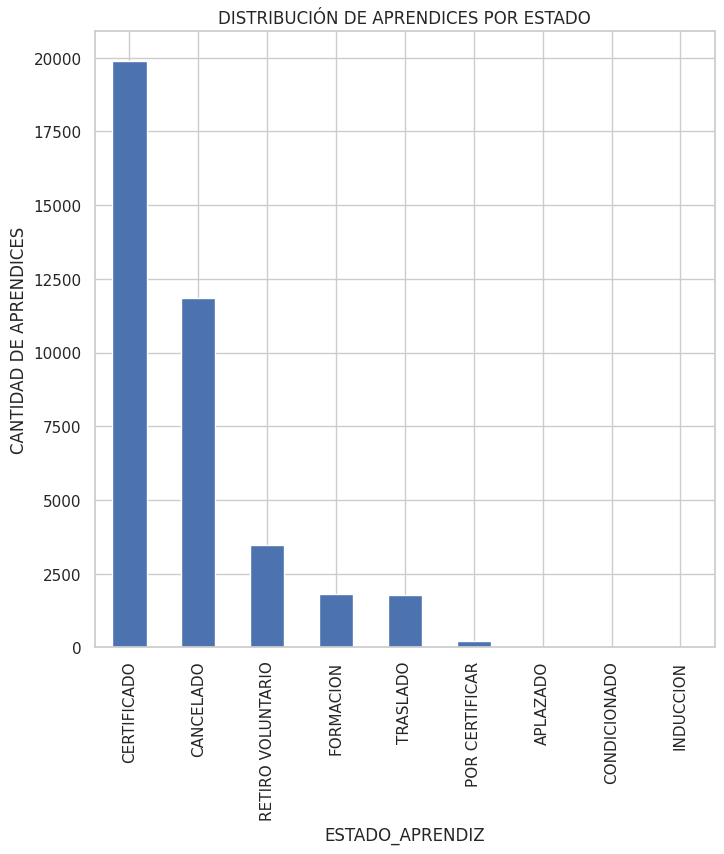

In [ ]:
# INTENTO PARA GENERAR GRAFICA CON NOMBRE ESTADOS
ESTADO_APRENDIZ = df["ESTADO_APRENDIZ"].value_counts()
plt.subplot(1,2,1)
plt.title("ESTADO_APRENDIZ")
CODIGO_ESTADO.plot(kind="bar")
plt.suptitle("ESTADO DEL REGISTRO ACADÉMICO")
plt.show()

plt.xlabel("ESTADOS")
plt.ylabel("CANTIDAD DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTADO")
df["ESTADO_APRENDIZ"].value_counts().plot(kind='bar', figsize=(8,8))

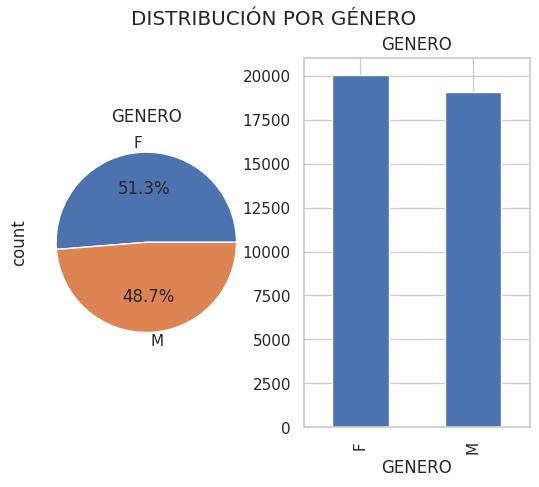

In [ ]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA GENERO
genero = df["GENERO"].value_counts()
plt.subplot(1,2,1)
genero.plot(kind="pie", autopct='%1.01f%%')
plt.title("GENERO")
#plt.suptitle("suptitle")

plt.subplot(1,2,2)
genero.plot(kind="bar")
plt.title("GENERO")
plt.suptitle("DISTRIBUCIÓN POR GÉNERO")
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR COD_NIVEL_FORMACIONL'}, xlabel='COD_NIVEL_FORMACION', ylabel='No. DE APRENDICES'>

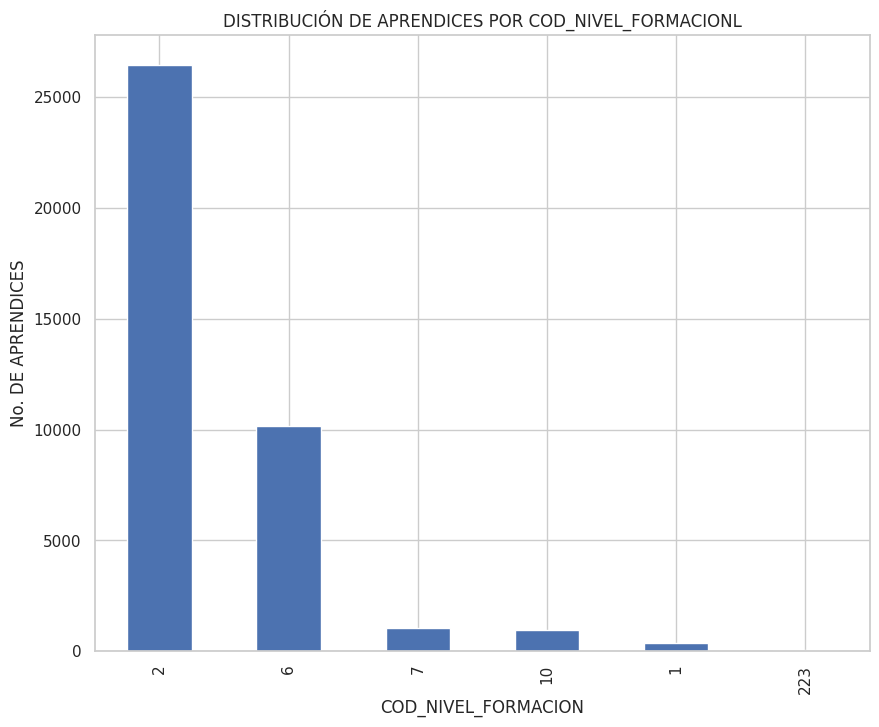

In [ ]:
plt.xlabel("COD_NIVEL_FORMACION")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR COD_NIVEL_FORMACIONL")
df["COD_NIVEL_FORMACION"].value_counts().plot(kind='bar', figsize=(10,8))

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR NIVEL_FORMACIONL'}, xlabel='NIVEL_FORMACION', ylabel='No. DE APRENDICES'>

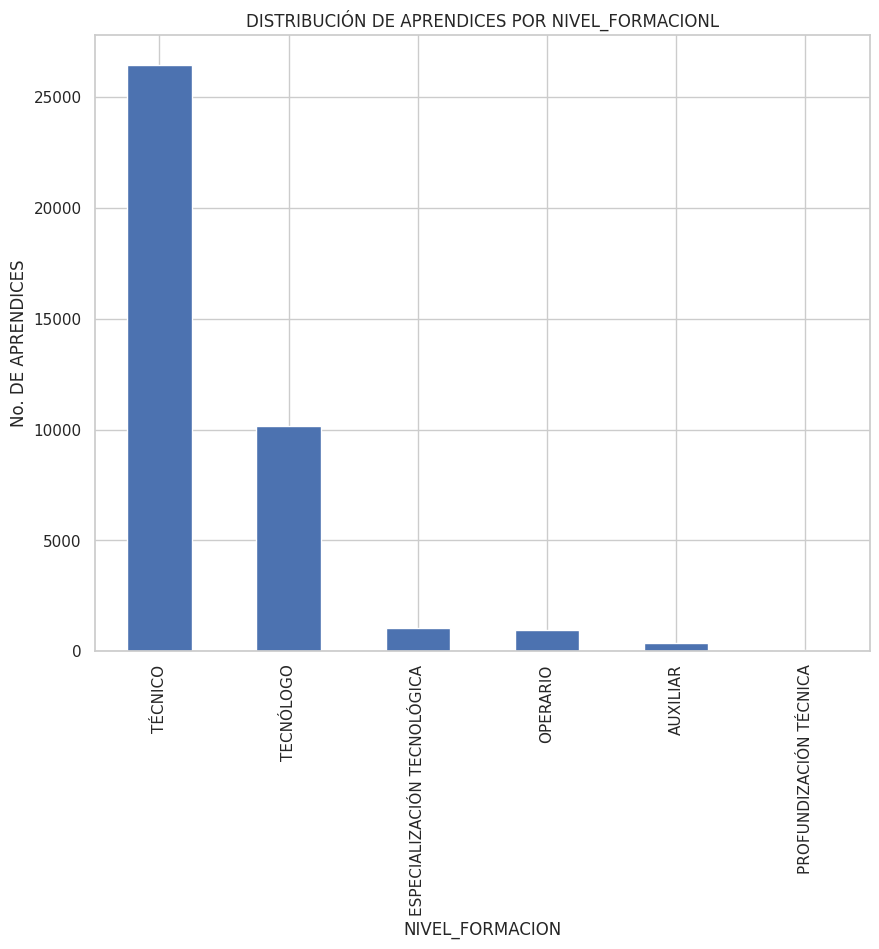

In [ ]:
plt.xlabel("NIVEL_FORMACION")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR NIVEL_FORMACIONL")
df["NIVEL_FORMACION"].value_counts().plot(kind='bar', figsize=(10,8))

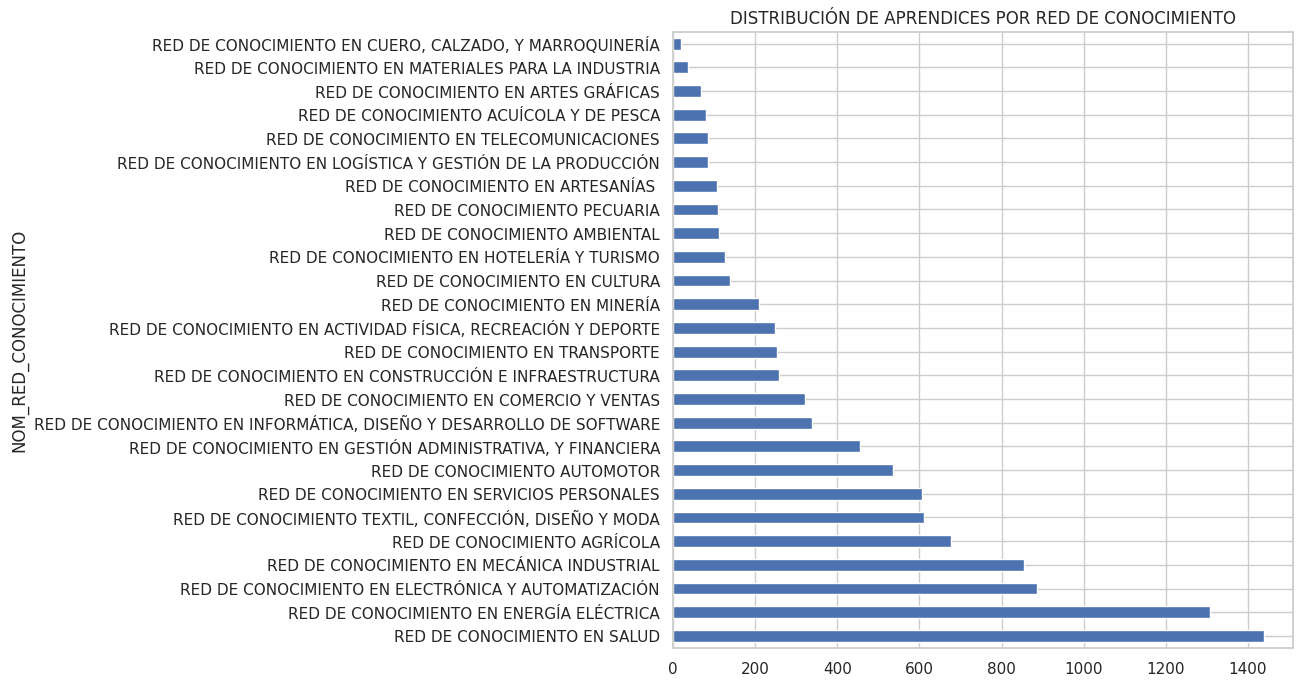

In [ ]:
plt.xlabel("ESTADOS")
plt.ylabel("CANTIDAD DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR RED DE CONOCIMIENTO")
df["NOM_RED_CONOCIMIENTO"].value_counts().plot(kind='barh', figsize=(8,8))
plt.show()

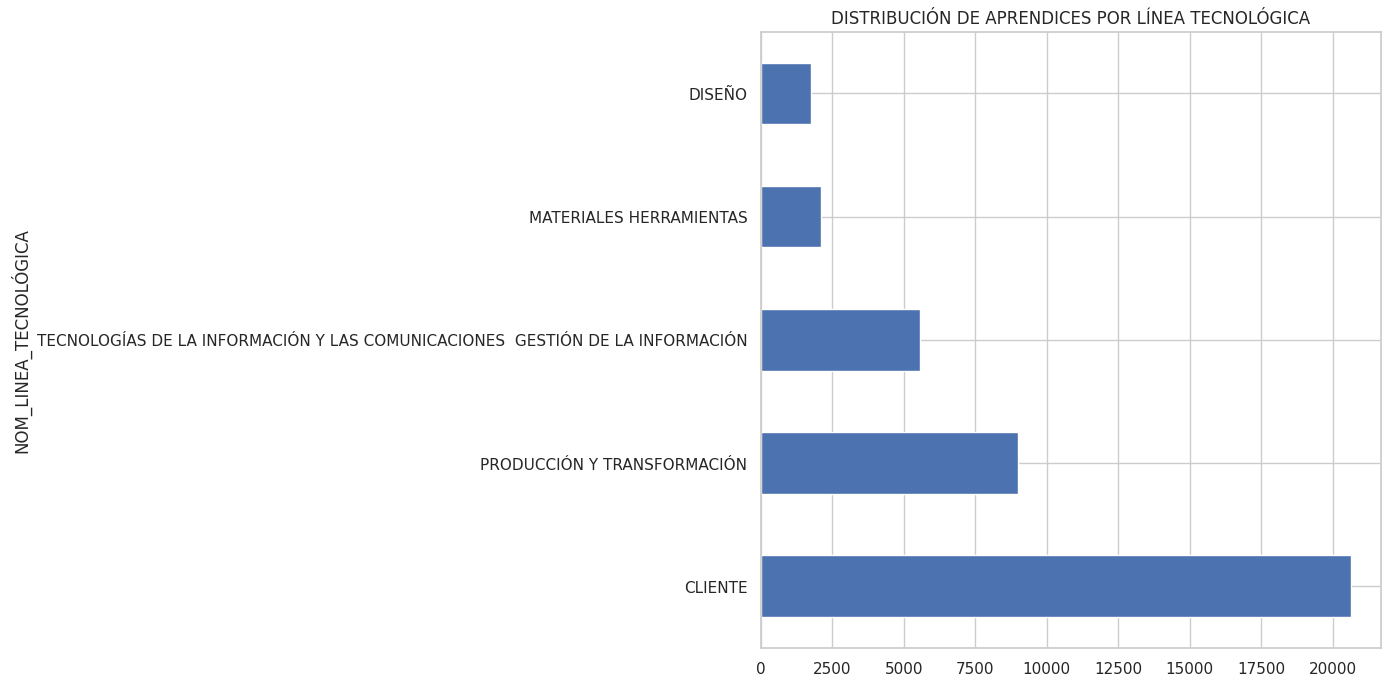

In [ ]:
plt.xlabel("LÍNEA TECNOLÓGICA")
plt.ylabel("CANTIDAD DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR LÍNEA TECNOLÓGICA")
df["NOM_LINEA_TECNOLÓGICA"].value_counts().plot(kind='barh', figsize=(8,8))
plt.show()

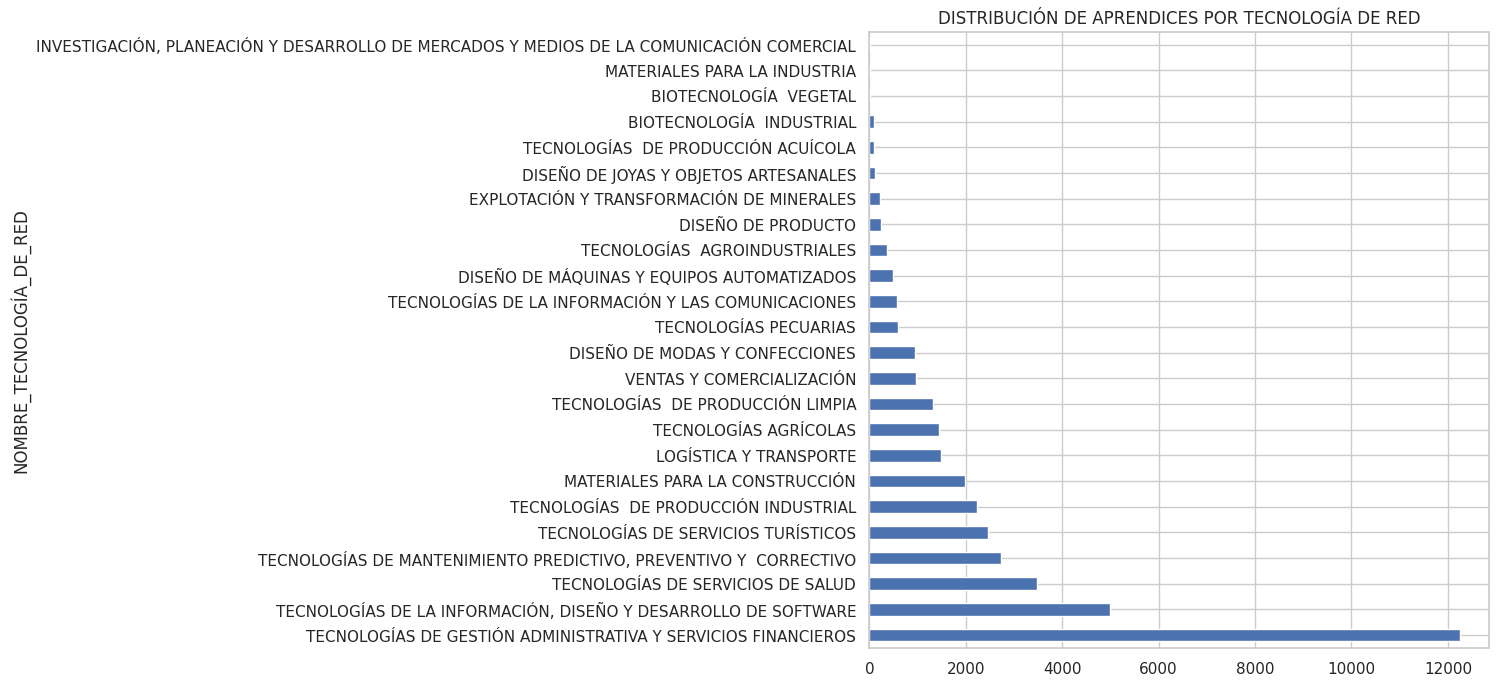

In [ ]:
plt.xlabel("TECNOLOGÍA DE RED")
plt.ylabel("CANTIDAD DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR TECNOLOGÍA DE RED")
df["NOMBRE_TECNOLOGÍA_DE_RED"].value_counts().plot(kind='barh', figsize=(8,8))
plt.show()

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR REGIONAL'}, ylabel='NOMBRE_REGIONAL'>

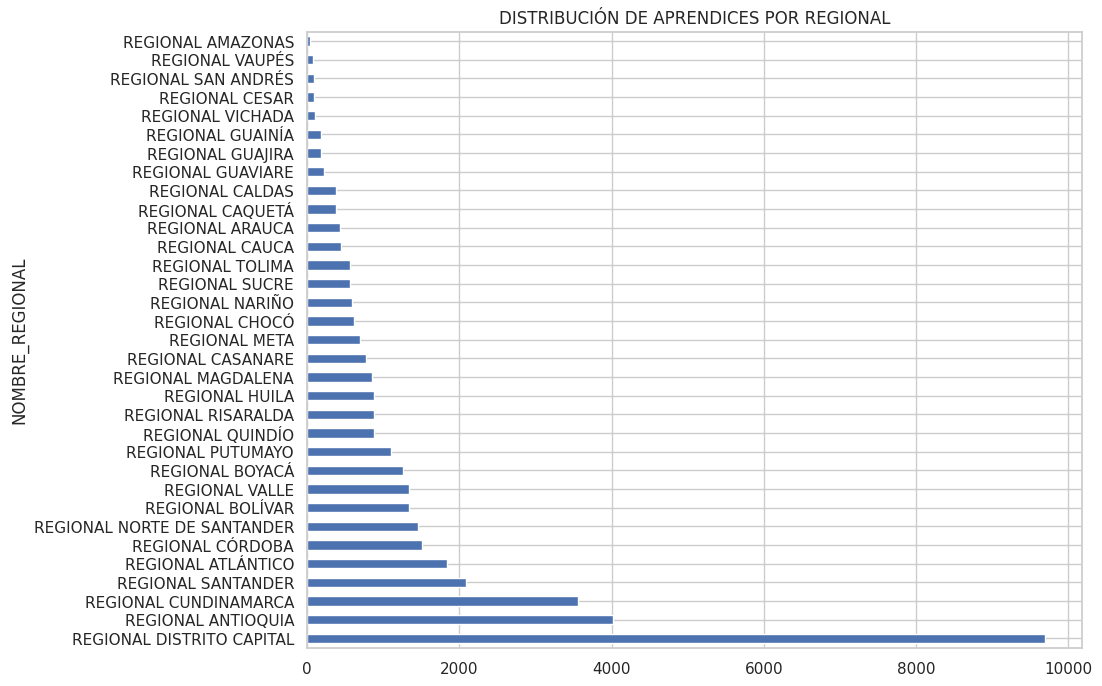

In [ ]:
plt.xlabel("REGIONAL")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR REGIONAL")
df["NOMBRE_REGIONAL"].value_counts().plot(kind='barh', figsize=(10,8))

<Axes: title={'center': 'DISTRIBUCIÓN DE APRENDICES POR TIPO POBLACION'}, xlabel='NOMBRE_TIPO_POBLACIÓN', ylabel='No. DE APRENDICES'>

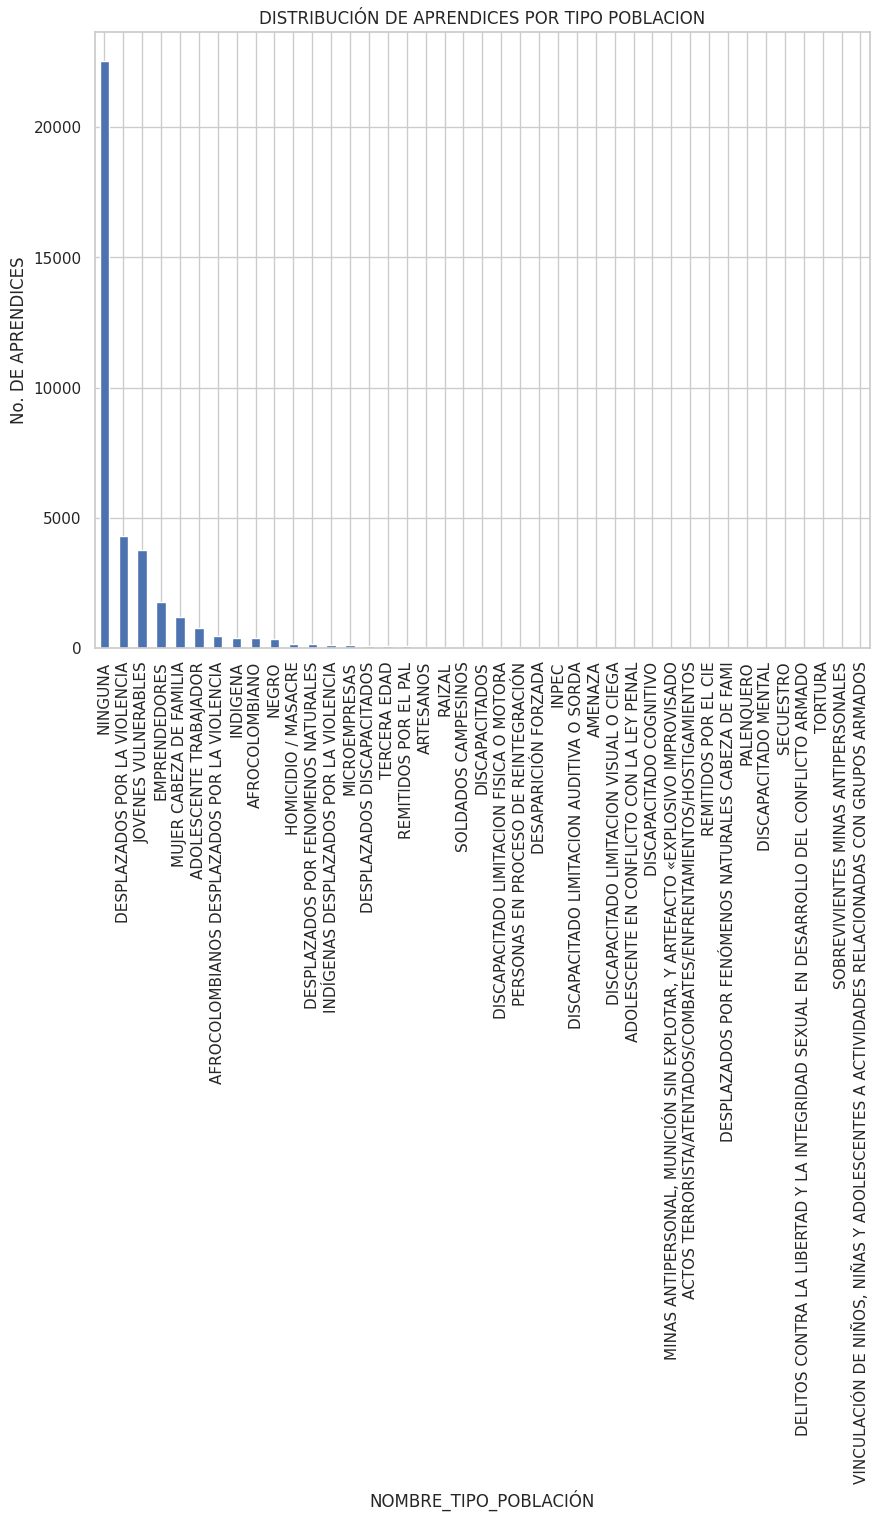

In [ ]:
plt.xlabel("NOMBRE_TIPO_POBLACION")
plt.ylabel("No. DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR TIPO POBLACION")
df["NOMBRE_TIPO_POBLACIÓN"].value_counts().plot(kind='bar', figsize=(10,8))

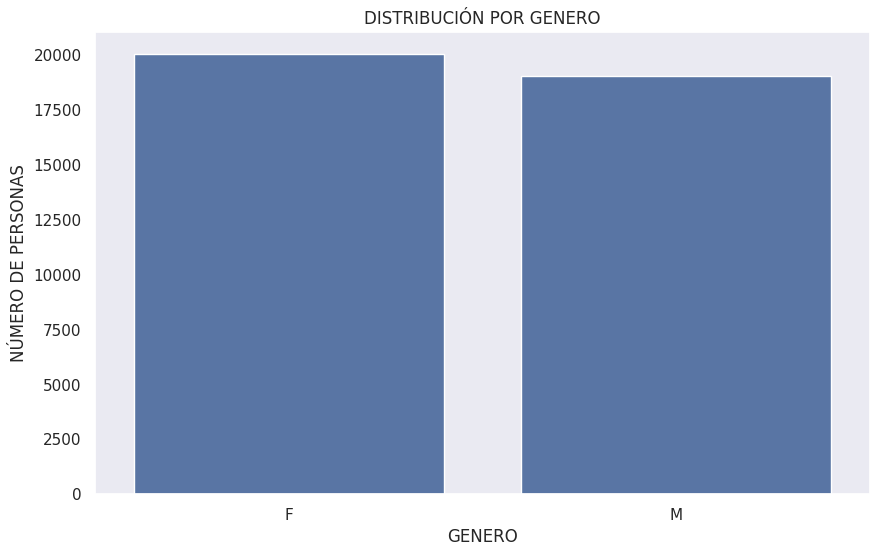

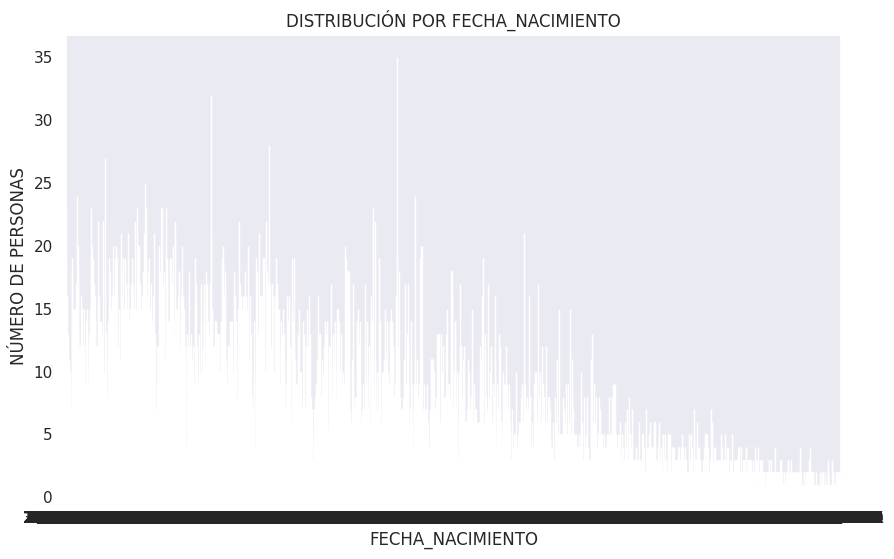

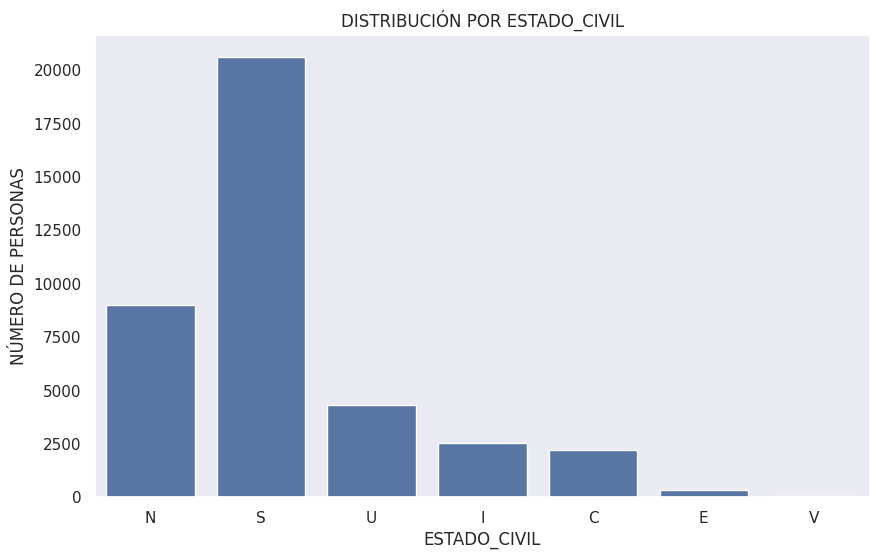

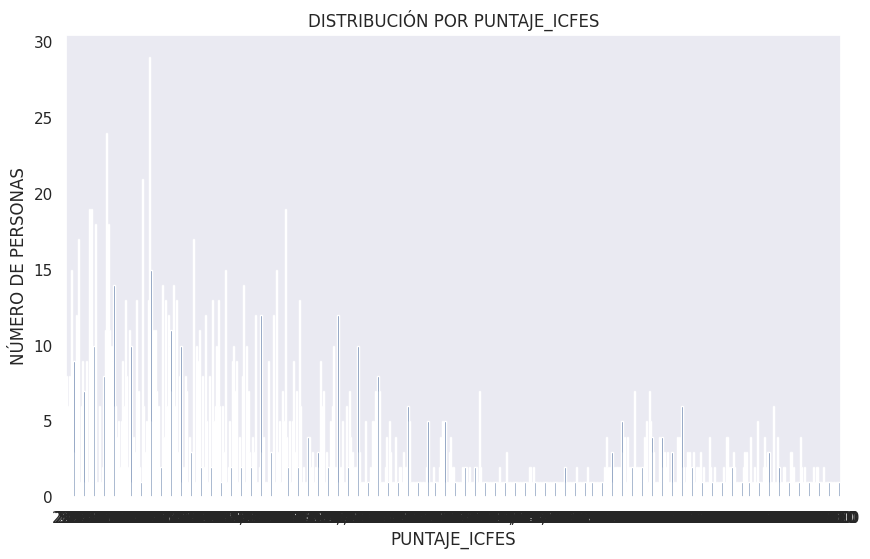

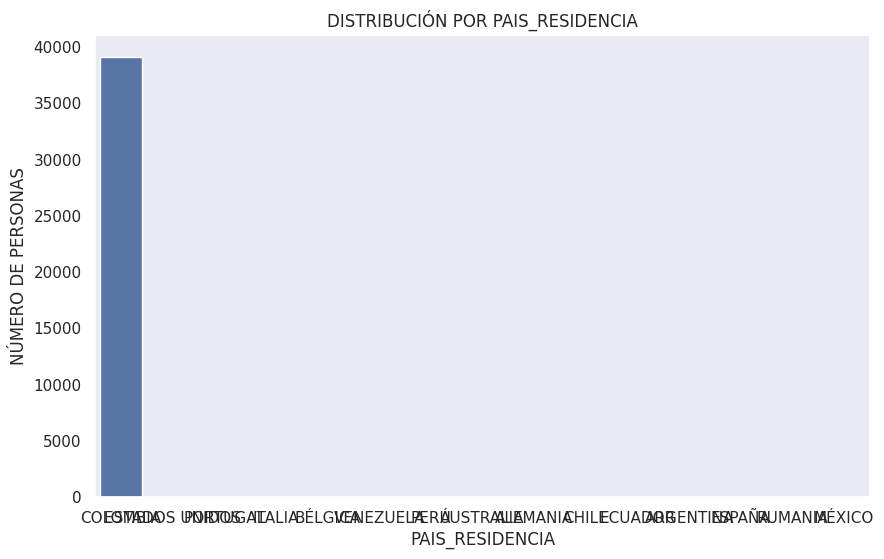

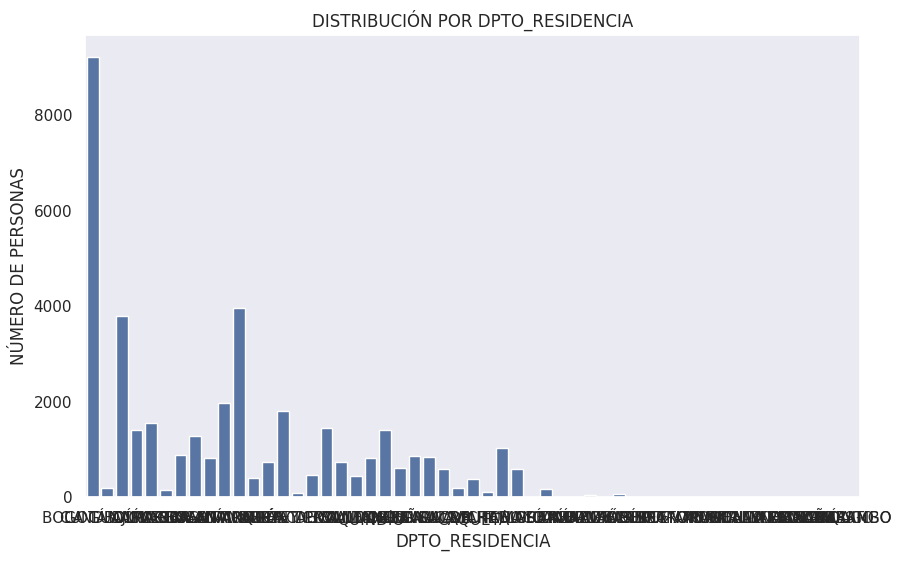

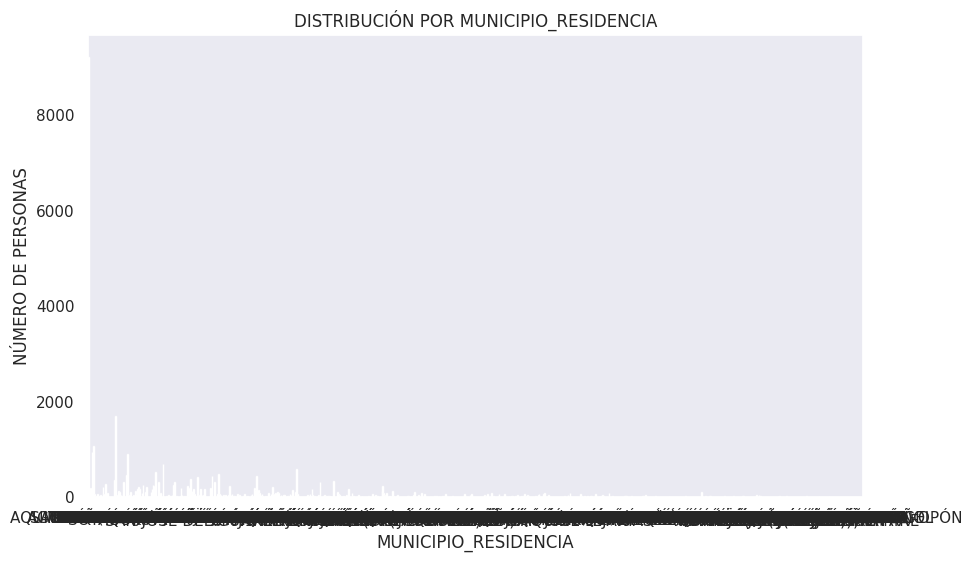

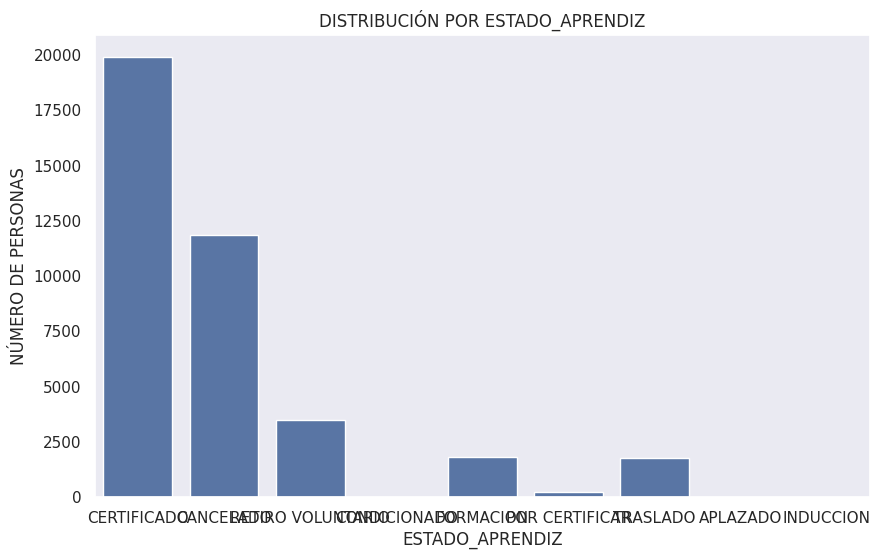

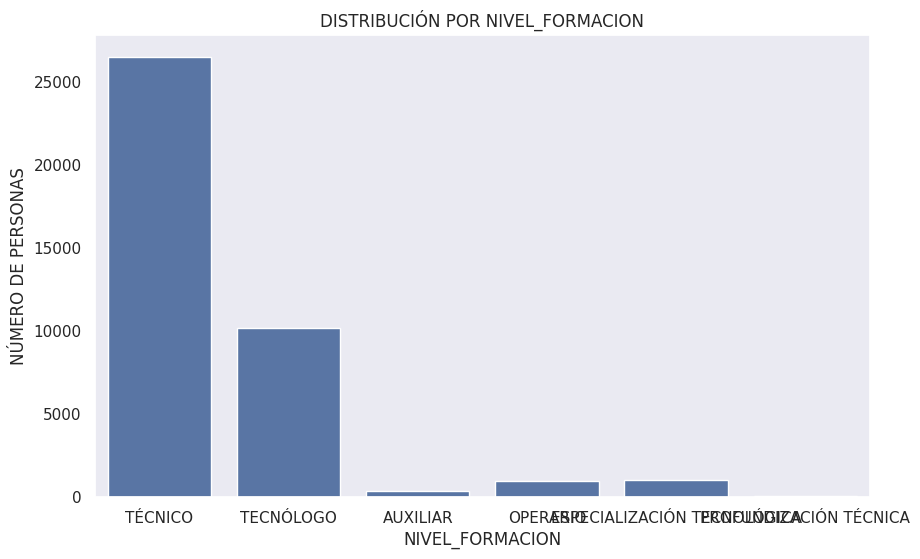

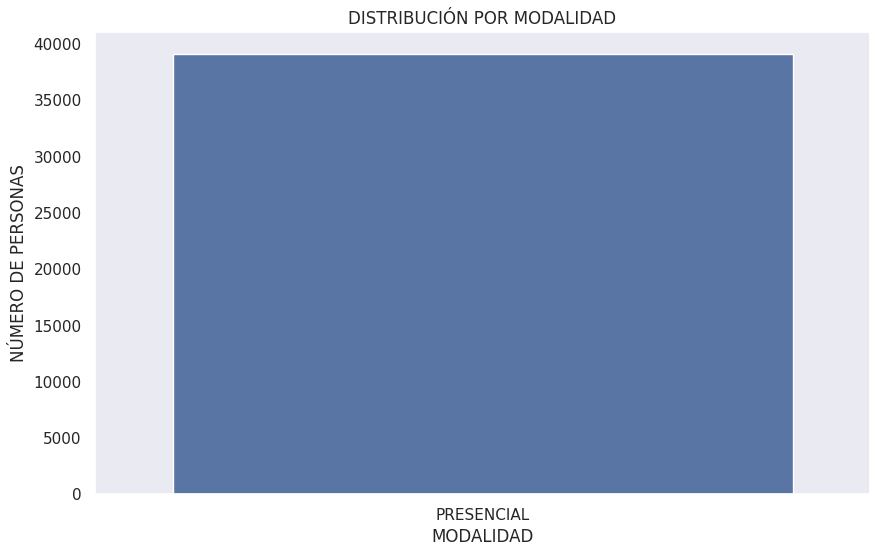

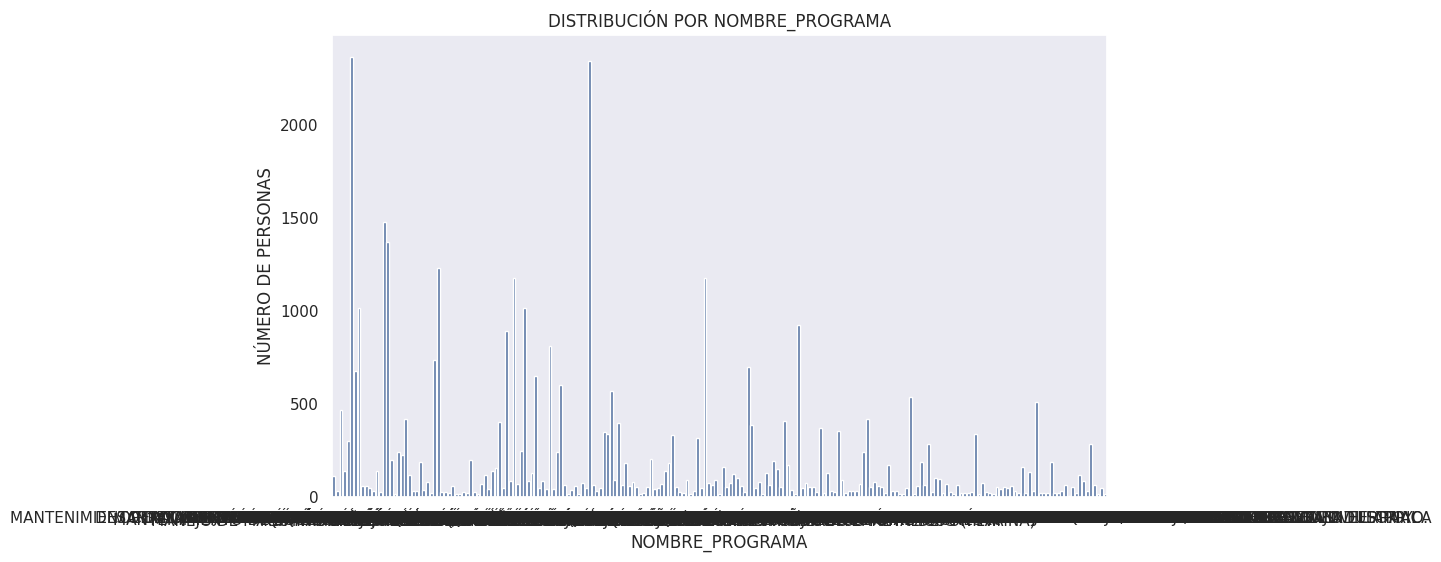

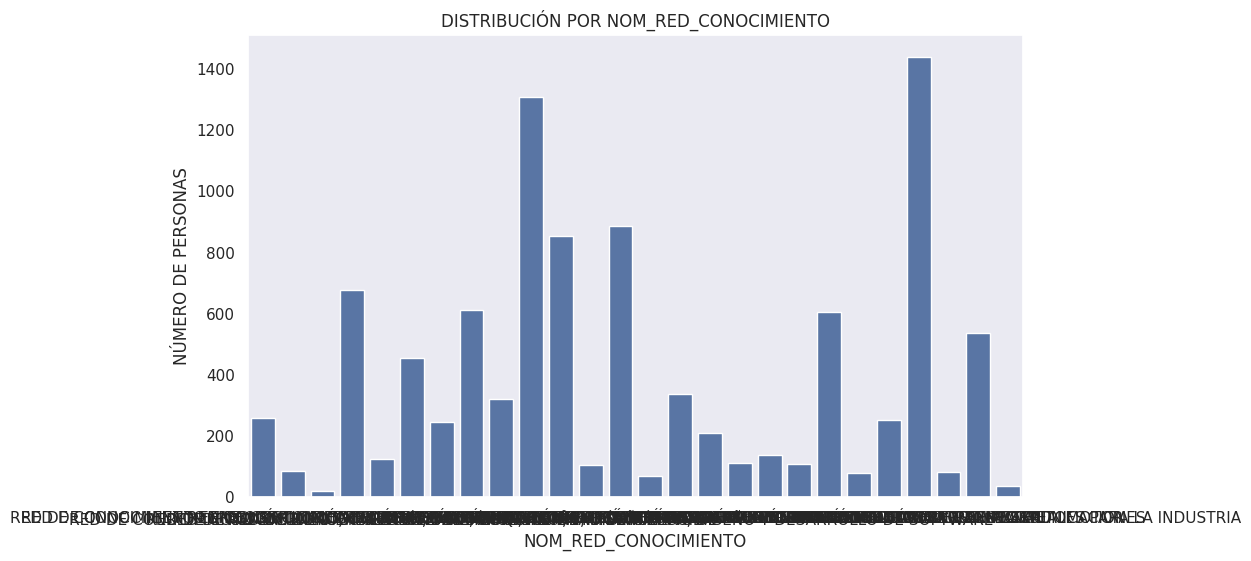

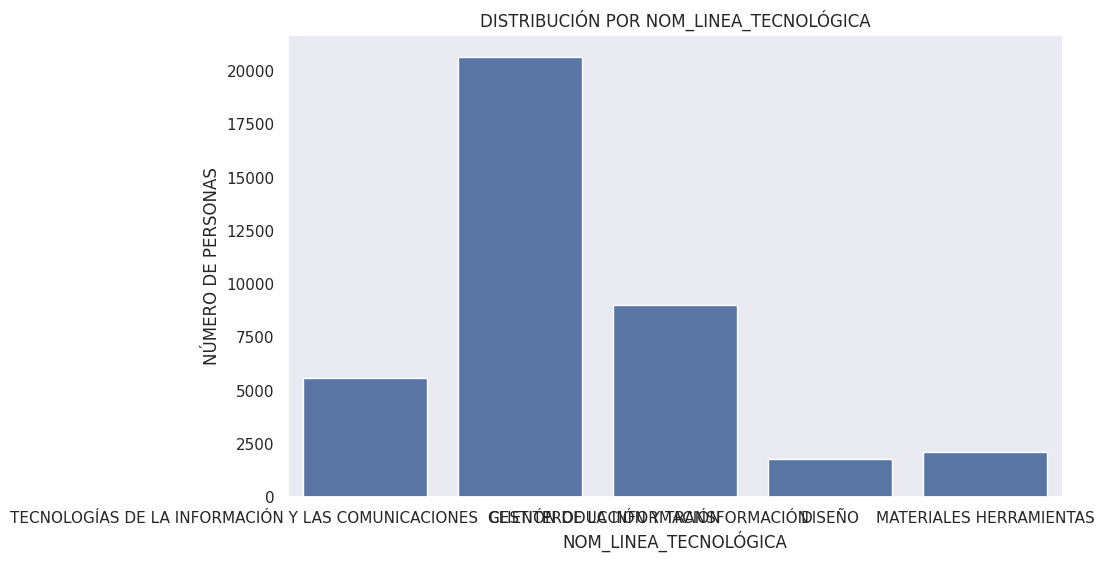

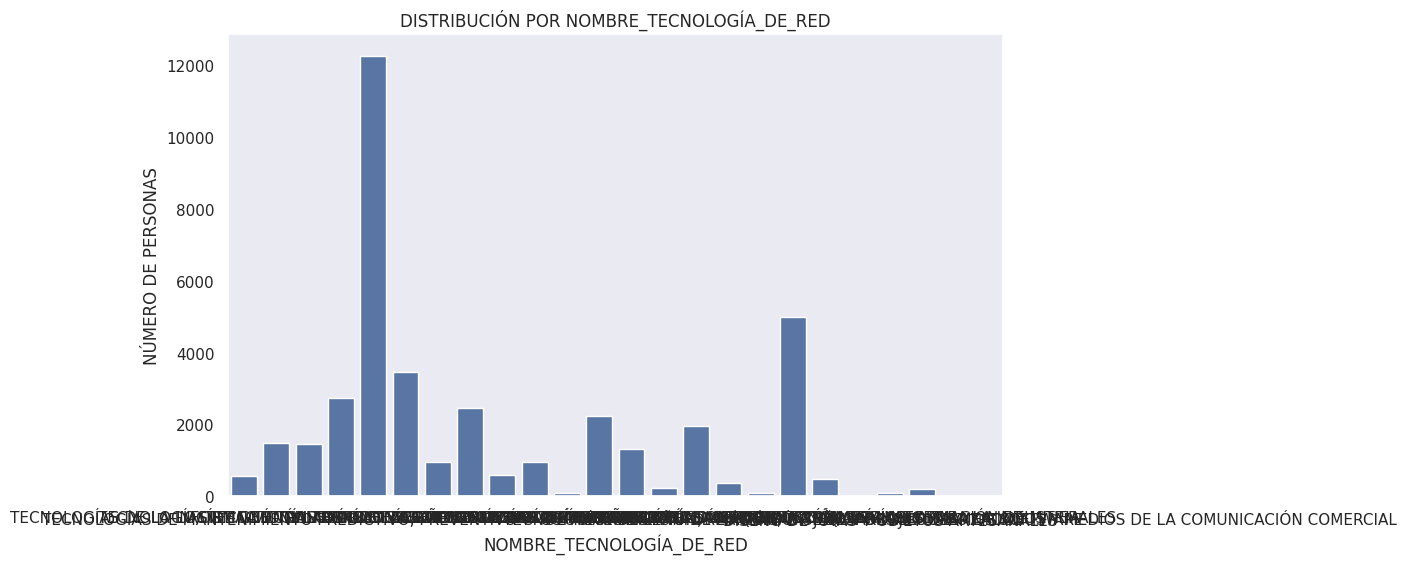

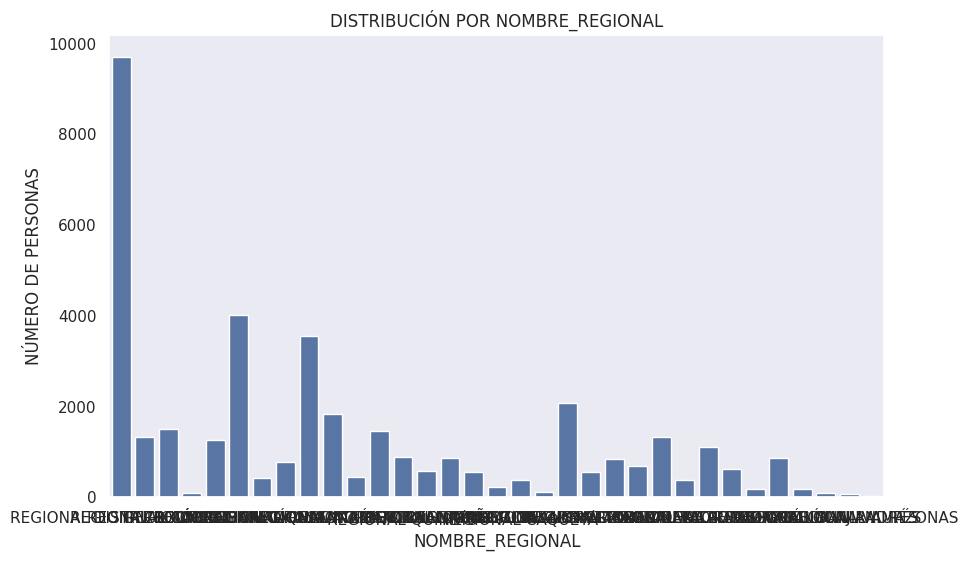

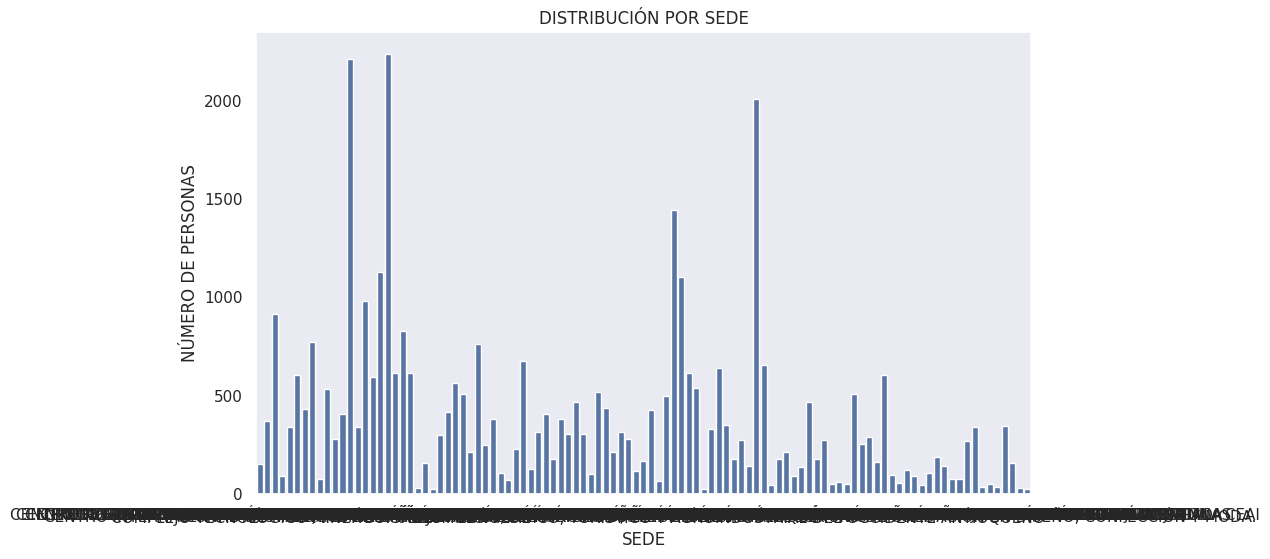

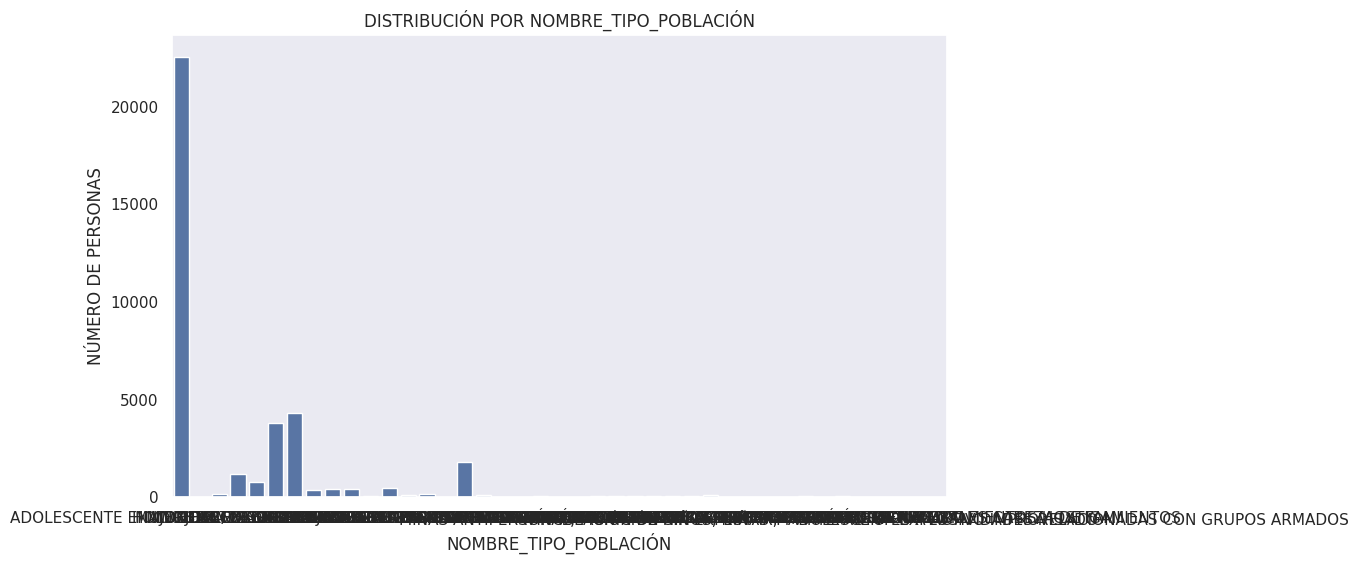

In [ ]:
sns.set_style("dark")
for col in C_col:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'DISTRIBUCIÓN POR {col}')
    plt.xlabel(col)
    plt.ylabel('NÚMERO DE PERSONAS')
    plt.show()

In [ ]:
print("Análisis de Columnas Numéricas")
df.describe()

Análisis de Columnas Numéricas


NIS       ESTRATO  NIVEL_SISBEN   DBU_HIJOS  \
count  3.910200e+04  39102.000000   6997.000000  115.000000   
mean   2.033092e+07      1.623523      2.262112    0.243478   
std    5.915964e+06      0.717811      1.744684    0.555535   
min    7.195145e+06      1.000000      1.000000    0.000000   
25%    1.597555e+07      1.000000      1.000000    0.000000   
50%    2.203987e+07      1.000000      2.000000    0.000000   
75%    2.579352e+07      2.000000      2.000000    0.000000   
max    3.368474e+07      6.000000      6.000000    2.000000   

       COD_PAIS_RESIDENCIA  COD_DPTO_RESIDENCIA  COD_MUNICIPIO_RESIDENCIA  \
count         39102.000000         39102.000000              3.910200e+04   
mean             57.019257         57051.949593              5.717261e+07   
std               3.139227          3139.223270              1.111482e+07   
min              32.000000         32001.000000              3.200100e+07   
25%              57.000000         57011.000000              5.701100e+07   
50%              57.000000         57023.000000              5.702318e+07   
75%              57.000000         57054.000000              5.705450e+07   
max             593.000000        593020.000000              1.000000e+09   

       COD_ZONA_RESIDENCIA  COD_BARRIO_RESIDENCIA  CODIGO_ESTADO  ...  \
count          2781.000000            2420.000000   39102.000000  ...   
mean            134.193456            2408.428099       3.565623  ...   
std             154.954509            2647.520692       2.215282  ...   
min               1.000000               2.000000       1.000000  ...   
25%              10.000000             484.750000       2.000000  ...   
50%              83.000000            1173.000000       3.000000  ...   
75%             208.000000            3095.500000       3.000000  ...   
max             466.000000            9310.000000      12.000000  ...   

       APOYO_SOSTNMTO_2018  APOYO_SOSTNMTO_2019  APOYO_SOSTNMTO_2020  \
count         39102.000000         39102.000000         39102.000000   
mean              0.040919             0.031303             0.002788   
std               0.198104             0.174137             0.052725   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               1.000000             1.000000             1.000000   

       APOYO_SOSTNMTO_2021  APOYO_SOSTNMTO_2022  APOYO_SOSTNMTO_2023  \
count              39102.0              39102.0              39102.0   
mean                   0.0                  0.0                  0.0   
std                    0.0                  0.0                  0.0   
min                    0.0                  0.0                  0.0   
25%                    0.0                  0.0                  0.0   
50%                    0.0                  0.0                  0.0   
75%                    0.0                  0.0                  0.0   
max                    0.0                  0.0                  0.0   

       APOYO_FIC_2018  APOYO_FIC_2019  APOYO_FIC_2020  APOYO_FIC_2021  
count    39102.000000    39102.000000    39102.000000         39102.0  
mean         0.036903        0.024449        0.001509             0.0  
std          0.188527        0.154440        0.038815             0.0  
min          0.000000        0.000000        0.000000             0.0  
25%          0.000000        0.000000        0.000000             0.0  
50%          0.000000        0.000000        0.000000             0.0  
75%          0.000000        0.000000        0.000000             0.0  
max          1.000000        1.000000        1.000000             0.0  

[8 rows x 30 columns]

In [ ]:
N_colA = N_col[:]
columnas_a_excluir = ['NIS', 'COD_PAIS_RESISENCIA', 'COD_DPTO_RESIDENCIA', 'COD_MUNICIPIO_RESIDENCIA', 'COD_ZONA_RESIDENCIA', 'COD_BARRIO_RESIDENCIA']
for col in columnas_a_excluir:
    if col in N_colA:
        N_colA.remove(col)
print(f"# Columnas Numéricas a Analizar = {len(N_colA)}", N_colA)

# Columnas Numéricas a Analizar = 25 ['ESTRATO', 'NIVEL_SISBEN', 'DBU_HIJOS', 'COD_PAIS_RESIDENCIA', 'CODIGO_ESTADO', 'COD_NIVEL_FORMACION', 'COD_PROGRAMA', 'CODIGO_RED_CONOCIMIENTO', 'COD_LINEA_TECNOLÓGICA', 'CÓDIGO_TECNOLOGÍA_DE_RED', 'FICHA_NUM_CURSO', 'CÓDIGO_REGIONAL', 'CÓDIGO_CENTRO', 'EDAD', 'CÓDIGO_TIPO_POBLACIÓN', 'APOYO_SOSTNMTO_2018', 'APOYO_SOSTNMTO_2019', 'APOYO_SOSTNMTO_2020', 'APOYO_SOSTNMTO_2021', 'APOYO_SOSTNMTO_2022', 'APOYO_SOSTNMTO_2023', 'APOYO_FIC_2018', 'APOYO_FIC_2019', 'APOYO_FIC_2020', 'APOYO_FIC_2021']


In [ ]:
result_dfs = []
for col in N_col:
    col_counts = df[col].value_counts()
    total_rows = len(df)
    col_percentages = (col_counts / total_rows) * 100

    result_df = pd.DataFrame({
        "Valores Únicos": col_counts.index,
        "Recuento": col_counts.values,
        "Porcentaje por Categoría": col_percentages.values
    })
    result_dfs.append(result_df)
for col, result_df in zip(N_col, result_dfs):
    print(f"\nAnálisis para la característica'{col}':")
    display(result_df)
    print("-" * 50)


Análisis para la característica'NIS':


Valores Únicos  Recuento  Porcentaje por Categoría
0            26206428         4                  0.010230
1            26160318         4                  0.010230
2            25775421         4                  0.010230
3            26104737         4                  0.010230
4            24361021         4                  0.010230
...               ...       ...                       ...
38049        26208492         1                  0.002557
38050        20899019         1                  0.002557
38051        25238026         1                  0.002557
38052        26221573         1                  0.002557
38053        14218541         1                  0.002557

[38054 rows x 3 columns]

--------------------------------------------------

Análisis para la característica'ESTRATO':


Valores Únicos  Recuento  Porcentaje por Categoría
0               1     19781                 50.588205
1               2     14611                 37.366375
2               3      4422                 11.308884
3               4       238                  0.608665
4               5        38                  0.097182
5               6        12                  0.030689

--------------------------------------------------

Análisis para la característica'NIVEL_SISBEN':


Valores Únicos  Recuento  Porcentaje por Categoría
0             1.0      3205                  8.196512
1             2.0      2138                  5.467751
2             6.0      1127                  2.882206
3             3.0       523                  1.337527
4             4.0         4                  0.010230

--------------------------------------------------

Análisis para la característica'DBU_HIJOS':


Valores Únicos  Recuento  Porcentaje por Categoría
0             0.0        94                  0.240397
1             1.0        14                  0.035804
2             2.0         7                  0.017902

--------------------------------------------------

Análisis para la característica'COD_PAIS_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0               57     39078                 99.938622
1               58         6                  0.015344
2               34         4                  0.010230
3               56         3                  0.007672
4              147         1                  0.002557
5              351         1                  0.002557
6               39         1                  0.002557
7               32         1                  0.002557
8               51         1                  0.002557
9               61         1                  0.002557
10              49         1                  0.002557
11             593         1                  0.002557
12              54         1                  0.002557
13              40         1                  0.002557
14              52         1                  0.002557

--------------------------------------------------

Análisis para la característica'COD_DPTO_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0            57011      9208                 23.548668
1            57005      3953                 10.109457
2            57025      3793                  9.700271
3            57068      1979                  5.061122
4            57008      1801                  4.605903
5            57023      1551                  3.966549
6            57054      1444                  3.692906
7            57076      1409                  3.603396
8            57013      1404                  3.590609
9            57015      1274                  3.258145
10           57086      1040                  2.659711
11           57047       886                  2.265869
12           57041       868                  2.219835
13           57066       848                  2.168687
14           57085       828                  2.117539
15           57063       817                  2.089407
16           57050       746                  1.907831
17           57073       732                  1.872027
18           57052       616                  1.575367
19           57027       592                  1.513989
20           57070       588                  1.503759
21           57019       470                  1.201985
22           57017       438                  1.120147
23           57081       398                  1.017851
24           57018       379                  0.969260
25           57095       204                  0.521712
26           57044       186                  0.475679
27           57094       171                  0.437318
28           57020       155                  0.396399
29           57099       103                  0.263414
30           57088        85                  0.217380
31           57097        68                  0.173904
32           57091        44                  0.112526
33           58019         5                  0.012787
34           34051         3                  0.007672
35           56013         1                  0.002557
36           56004         1                  0.002557
37           40041         1                  0.002557
38           34046         1                  0.002557
39           56009         1                  0.002557
40           54008         1                  0.002557
41          593020         1                  0.002557
42           51013         1                  0.002557
43           58003         1                  0.002557
44           49010         1                  0.002557
45           61006         1                  0.002557
46           32001         1                  0.002557
47           39070         1                  0.002557
48          351015         1                  0.002557
49          147013         1                  0.002557
50           52008         1                  0.002557

--------------------------------------------------

Análisis para la característica'COD_MUNICIPIO_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0          57011001      9208                 23.548668
1          57005001      1702                  4.352719
2          57013001      1068                  2.731318
3          57025754       947                  2.421871
4          57008001       912                  2.332362
..              ...       ...                       ...
895        57041676         1                  0.002557
896        57073067         1                  0.002557
897        57005237         1                  0.002557
898        57005873         1                  0.002557
899        57068720         1                  0.002557

[900 rows x 3 columns]

--------------------------------------------------

Análisis para la característica'COD_ZONA_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0               7.0       188                  0.480794
1               8.0       174                  0.444990
2              11.0       161                  0.411744
3              19.0       112                  0.286430
4              10.0       109                  0.278758
..              ...       ...                       ...
268           320.0         1                  0.002557
269            70.0         1                  0.002557
270            67.0         1                  0.002557
271           366.0         1                  0.002557
272           225.0         1                  0.002557

[273 rows x 3 columns]

--------------------------------------------------

Análisis para la característica'COD_BARRIO_RESIDENCIA':


Valores Únicos  Recuento  Porcentaje por Categoría
0              304.0        33                  0.084395
1              424.0        19                  0.048591
2             2920.0        16                  0.040919
3             2298.0        15                  0.038361
4              664.0        14                  0.035804
...              ...       ...                       ...
1240          4459.0         1                  0.002557
1241           442.0         1                  0.002557
1242           490.0         1                  0.002557
1243          2435.0         1                  0.002557
1244          2193.0         1                  0.002557

[1245 rows x 3 columns]

--------------------------------------------------

Análisis para la característica'CODIGO_ESTADO':


Valores Únicos  Recuento  Porcentaje por Categoría
0               3     19896                 50.882308
1               2     11859                 30.328372
2               6      3487                  8.917702
3               7      1819                  4.651936
4              11      1772                  4.531738
5              12       226                  0.577976
6               1        18                  0.046033
7               4        15                  0.038361
8               8        10                  0.025574

--------------------------------------------------

Análisis para la característica'COD_NIVEL_FORMACION':


Valores Únicos  Recuento  Porcentaje por Categoría
0               2     26480                 67.720321
1               6     10162                 25.988440
2               7      1038                  2.654596
3              10       978                  2.501151
4               1       379                  0.969260
5             223        65                  0.166232

--------------------------------------------------

Análisis para la característica'COD_PROGRAMA':


Valores Únicos  Recuento  Porcentaje por Categoría
0            122121      2361                  6.038054
1            228185      2341                  5.986906
2            112005      1478                  3.779858
3            133146      1367                  3.495985
4            134401      1231                  3.148177
..              ...       ...                       ...
210          931501        15                  0.038361
211          836221        15                  0.038361
212          722303        15                  0.038361
213          135304        15                  0.038361
214          733302         7                  0.017902

[215 rows x 3 columns]

--------------------------------------------------

Análisis para la característica'CODIGO_RED_CONOCIMIENTO':


Valores Únicos  Recuento  Porcentaje por Categoría
0             26.0      1438                  3.677561
1              9.0      1308                  3.345097
2             10.0       886                  2.265869
3              8.0       854                  2.184032
4             23.0       677                  1.731369
5             16.0       611                  1.562580
6             30.0       606                  1.549793
7             14.0       536                  1.370774
8              4.0       454                  1.161066
9             13.0       337                  0.861848
10             5.0       320                  0.818372
11            22.0       258                  0.659813
12            29.0       254                  0.649583
13            28.0       247                  0.631681
14            19.0       210                  0.537057
15             1.0       139                  0.355481
16            27.0       126                  0.322234
17             6.0       112                  0.286430
18            24.0       110                  0.281316
19             2.0       106                  0.271086
20            21.0        86                  0.219938
21            11.0        84                  0.214823
22            25.0        80                  0.204593
23             3.0        69                  0.176462
24            18.0        37                  0.094624
25            17.0        19                  0.048591

--------------------------------------------------

Análisis para la característica'COD_LINEA_TECNOLÓGICA':


Valores Únicos  Recuento  Porcentaje por Categoría
0               5     20643                 52.792696
1               3      9012                 23.047414
2               1      5568                 14.239681
3               4      2105                  5.383356
4               2      1774                  4.536852

--------------------------------------------------

Análisis para la característica'CÓDIGO_TECNOLOGÍA_DE_RED':


Valores Únicos  Recuento  Porcentaje por Categoría
0               25     12248                 31.323206
1                1      4992                 12.766610
2               24      3467                  8.866554
3                9      2740                  7.007314
4               23      2452                  6.270779
5               10      2234                  5.713263
6               18      1974                  5.048335
7               22      1489                  3.807989
8                8      1453                  3.715922
9               11      1311                  3.352770
10              21       970                  2.480692
11               4       946                  2.419314
12              12       589                  1.506317
13               2       576                  1.473070
14               6       488                  1.248018
15              13       372                  0.951358
16               5       234                  0.598435
17               7       210                  0.537057
18               3       106                  0.271086
19              14       103                  0.263414
20              16        86                  0.219938
21              17        23                  0.058821
22              19        22                  0.056263
23              20        17                  0.043476

--------------------------------------------------

Análisis para la característica'FICHA_NUM_CURSO':


Valores Únicos  Recuento  Porcentaje por Categoría
0            1581575       216                  0.552401
1            1581582       211                  0.539614
2            1581576       203                  0.519155
3            1576858       138                  0.352923
4            1578581       120                  0.306890
...              ...       ...                       ...
1376         1578605         4                  0.010230
1377         1578856         3                  0.007672
1378         1580799         3                  0.007672
1379         1571975         3                  0.007672
1380         1578867         3                  0.007672

[1381 rows x 3 columns]

--------------------------------------------------

Análisis para la característica'CÓDIGO_REGIONAL':


Valores Únicos  Recuento  Porcentaje por Categoría
0               11      9699                 24.804358
1                5      4024                 10.291034
2               25      3557                  9.096721
3               68      2088                  5.339880
4                8      1841                  4.708199
5               23      1509                  3.859138
6               54      1454                  3.718480
7               13      1335                  3.414148
8               76      1334                  3.411590
9               15      1263                  3.230014
10              86      1103                  2.820828
11              63       883                  2.258197
12              66       876                  2.240295
13              41       871                  2.227508
14              47       853                  2.181474
15              85       773                  1.976881
16              50       692                  1.769730
17              27       616                  1.575367
18              52       589                  1.506317
19              70       564                  1.442381
20              73       564                  1.442381
21              19       448                  1.145721
22              81       434                  1.109918
23              18       381                  0.974375
24              17       376                  0.961588
25              95       217                  0.554959
26              44       179                  0.457777
27              94       177                  0.452662
28              99       108                  0.276201
29              20        92                  0.235282
30              88        91                  0.232725
31              97        75                  0.191806
32              91        36                  0.092067

--------------------------------------------------

Análisis para la característica'CÓDIGO_CENTRO':


Valores Únicos  Recuento  Porcentaje por Categoría
0              9404      2235                  5.715820
1              9405      2006                  5.130172
2              9210      1442                  3.687791
3              9518      1103                  2.820828
4              9512       984                  2.516495
..              ...       ...                       ...
105            9226        33                  0.084395
106            9535        31                  0.079280
107            9101        29                  0.074165
108            9549        28                  0.071608
109            9202        25                  0.063935

[110 rows x 3 columns]

--------------------------------------------------

Análisis para la característica'EDAD':


Valores Únicos  Recuento  Porcentaje por Categoría
0               17      4909                 12.554345
1               18      4447                 11.372820
2               19      3370                  8.618485
3               20      2770                  7.084037
4               21      2297                  5.874380
..             ...       ...                       ...
71              83         1                  0.002557
72              89         1                  0.002557
73              66         1                  0.002557
74              71         1                  0.002557
75              86         1                  0.002557

[76 rows x 3 columns]

--------------------------------------------------

Análisis para la característica'CÓDIGO_TIPO_POBLACIÓN':


Valores Únicos  Recuento  Porcentaje por Categoría
0             34.0     22518                 57.587847
1              3.0      4291                 10.973863
2              8.0      3760                  9.615876
3             64.0      1769                  4.524065
4             10.0      1193                  3.050995
5             14.0       768                  1.964094
6            127.0       473                  1.209657
7              6.0       394                  1.007621
8            130.0       386                  0.987162
9             11.0       364                  0.930899
10           138.0       171                  0.437318
11             4.0       139                  0.355481
12           101.0       120                  0.306890
13           124.0       101                  0.258299
14           129.0        80                  0.204593
15            13.0        74                  0.189249
16            19.0        72                  0.184134
17           123.0        57                  0.145773
18           132.0        40                  0.102297
19            20.0        38                  0.097182
20           121.0        34                  0.086952
21            26.0        33                  0.084395
22            12.0        26                  0.066493
23           137.0        26                  0.066493
24           122.0        26                  0.066493
25            24.0        21                  0.053706
26           135.0        19                  0.048591
27            25.0        19                  0.048591
28             9.0        15                  0.038361
29           104.0        15                  0.038361
30           134.0        14                  0.035804
31           143.0        11                  0.028132
32           102.0         6                  0.015344
33           126.0         6                  0.015344
34           131.0         5                  0.012787
35           105.0         4                  0.010230
36           139.0         3                  0.007672
37           136.0         2                  0.005115
38           140.0         2                  0.005115
39            33.0         1                  0.002557
40           141.0         1                  0.002557

--------------------------------------------------

Análisis para la característica'APOYO_SOSTNMTO_2018':


Valores Únicos  Recuento  Porcentaje por Categoría
0               0     37502                 95.908138
1               1      1600                  4.091862

--------------------------------------------------

Análisis para la característica'APOYO_SOSTNMTO_2019':


Valores Únicos  Recuento  Porcentaje por Categoría
0               0     37878                 96.869725
1               1      1224                  3.130275

--------------------------------------------------

Análisis para la característica'APOYO_SOSTNMTO_2020':


Valores Únicos  Recuento  Porcentaje por Categoría
0               0     38993                 99.721242
1               1       109                  0.278758

--------------------------------------------------

Análisis para la característica'APOYO_SOSTNMTO_2021':


Valores Únicos  Recuento  Porcentaje por Categoría
0               0     39102                     100.0

--------------------------------------------------

Análisis para la característica'APOYO_SOSTNMTO_2022':


Valores Únicos  Recuento  Porcentaje por Categoría
0               0     39102                     100.0

--------------------------------------------------

Análisis para la característica'APOYO_SOSTNMTO_2023':


Valores Únicos  Recuento  Porcentaje por Categoría
0               0     39102                     100.0

--------------------------------------------------

Análisis para la característica'APOYO_FIC_2018':


Valores Únicos  Recuento  Porcentaje por Categoría
0               0     37659                 96.309652
1               1      1443                  3.690348

--------------------------------------------------

Análisis para la característica'APOYO_FIC_2019':


Valores Únicos  Recuento  Porcentaje por Categoría
0               0     38146                 97.555112
1               1       956                  2.444888

--------------------------------------------------

Análisis para la característica'APOYO_FIC_2020':


Valores Únicos  Recuento  Porcentaje por Categoría
0               0     39043                 99.849113
1               1        59                  0.150887

--------------------------------------------------

Análisis para la característica'APOYO_FIC_2021':


Valores Únicos  Recuento  Porcentaje por Categoría
0               0     39102                     100.0

--------------------------------------------------


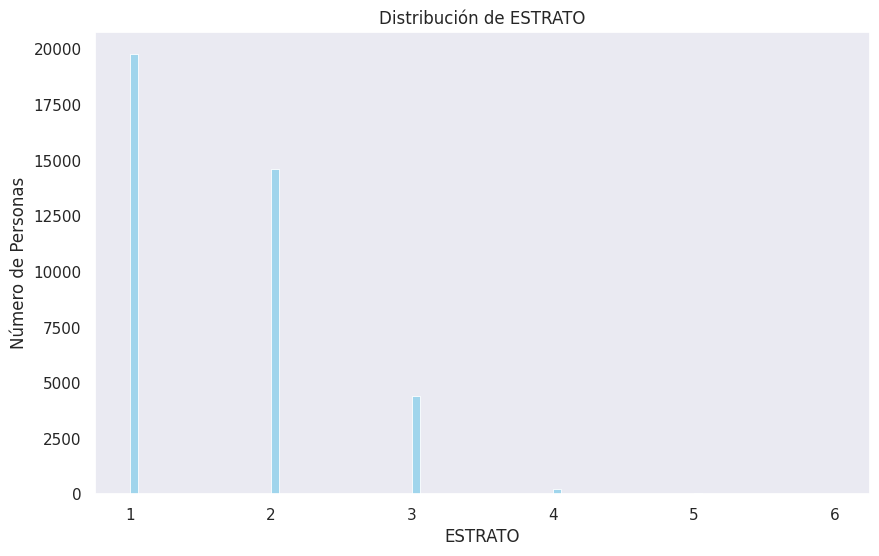

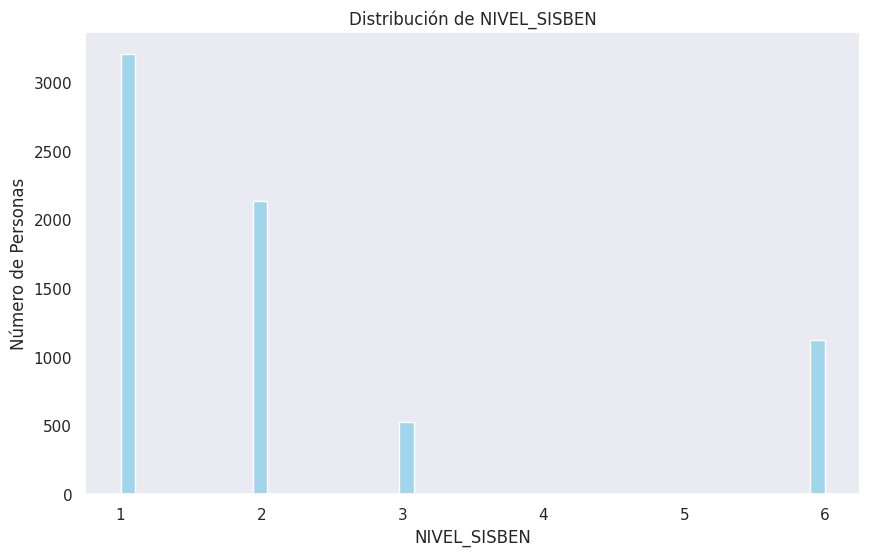

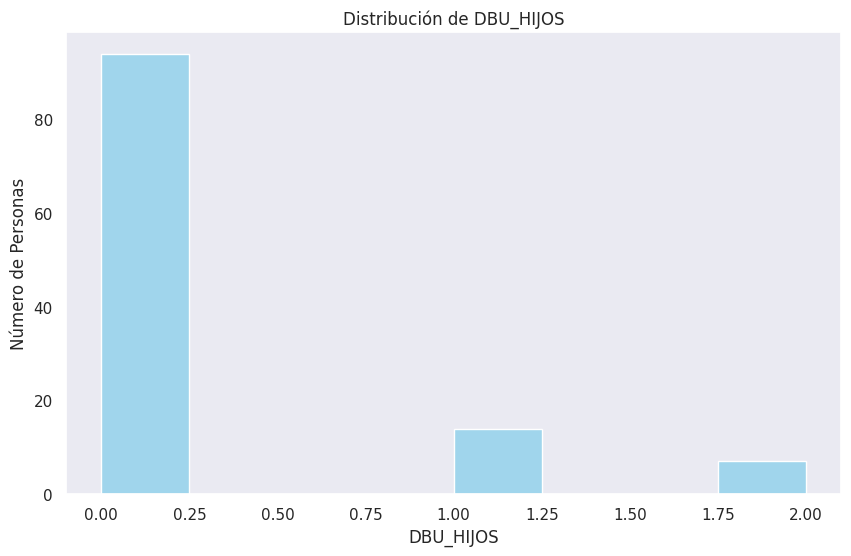

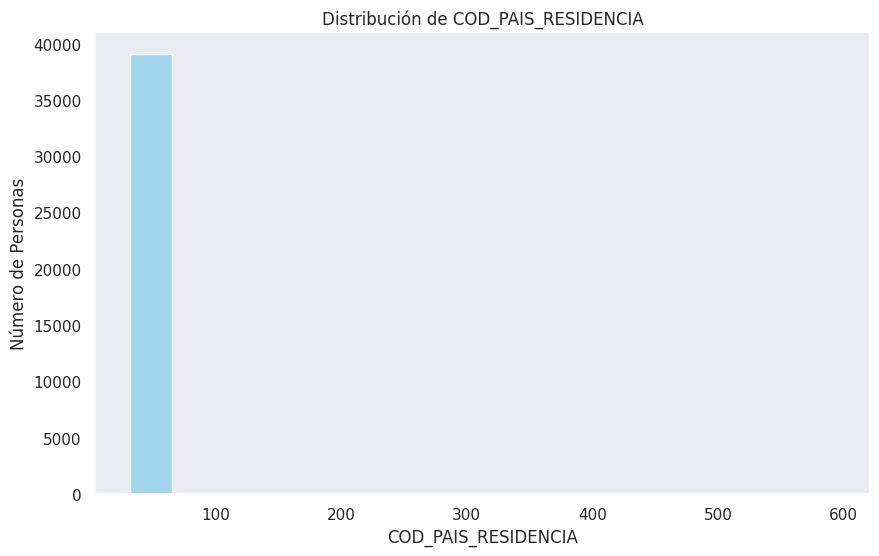

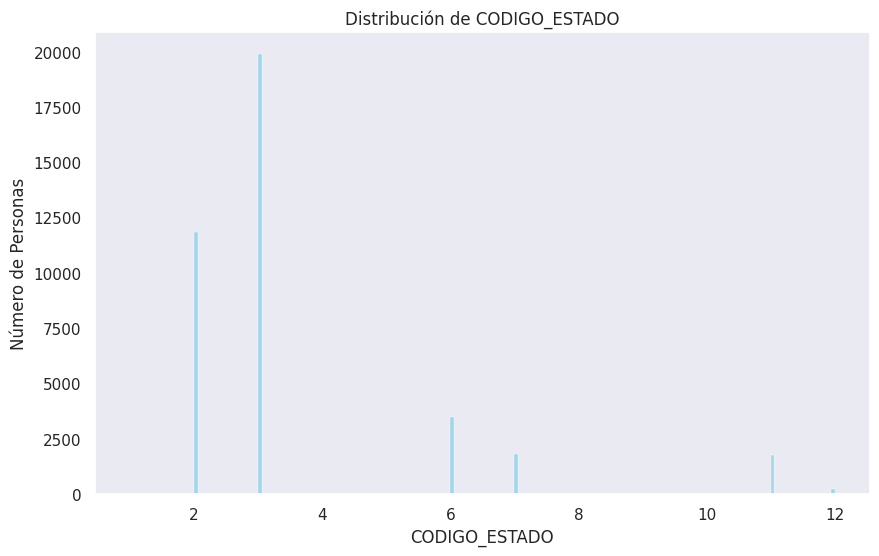

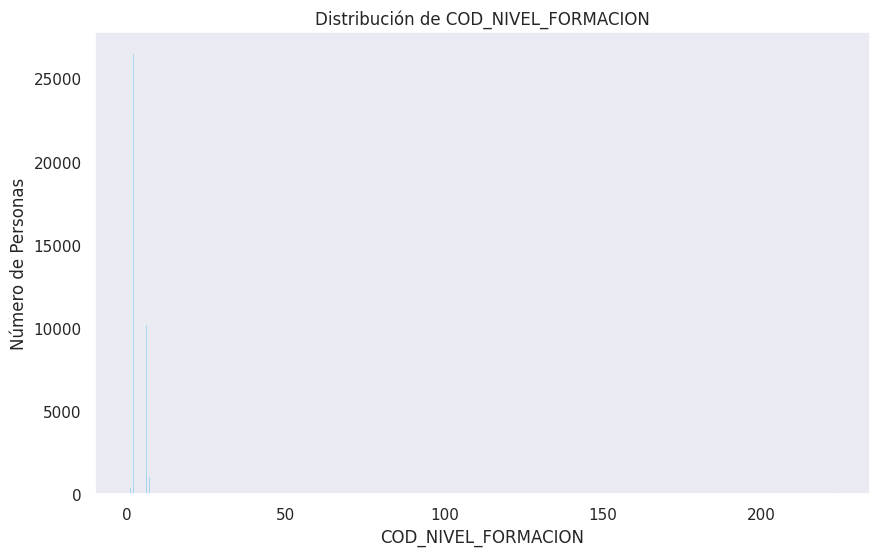

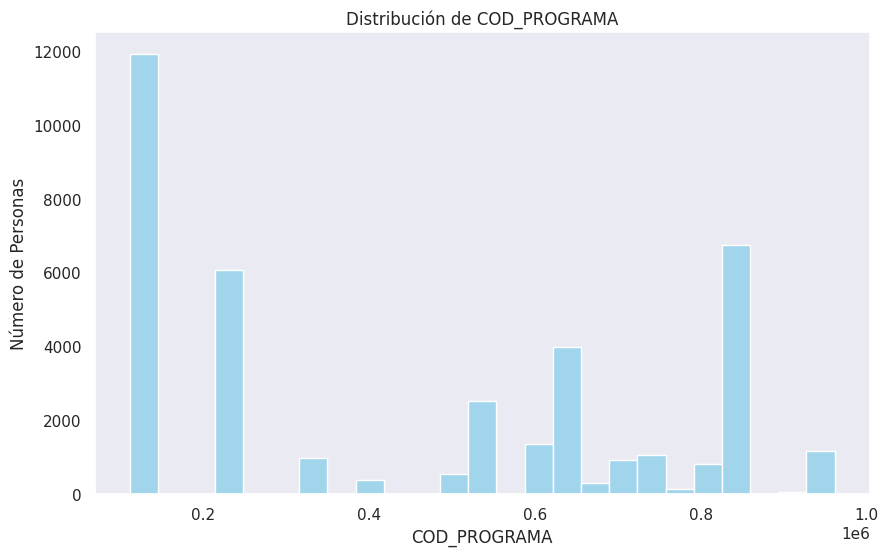

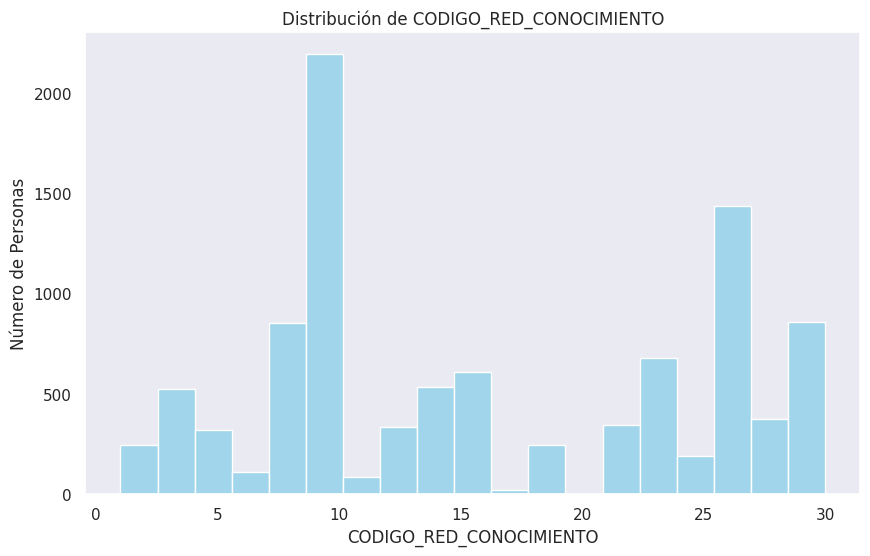

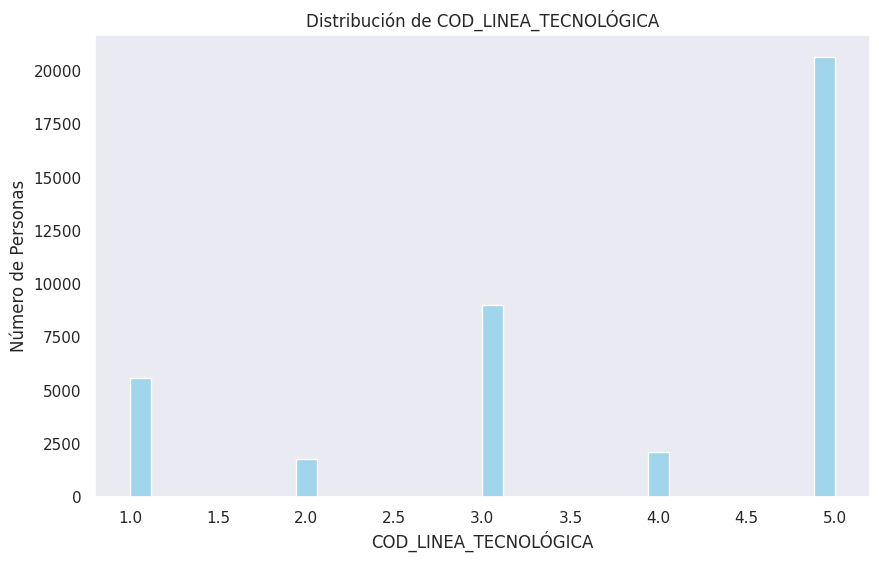

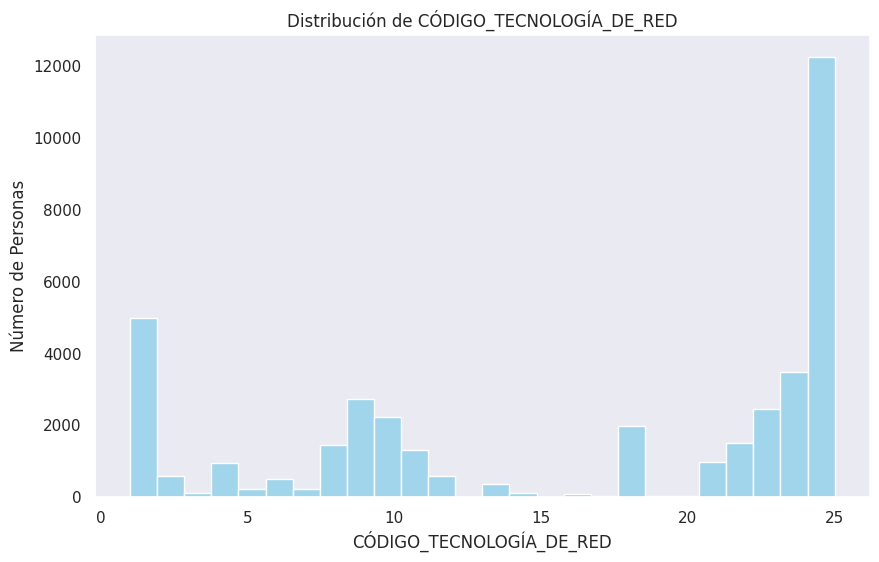

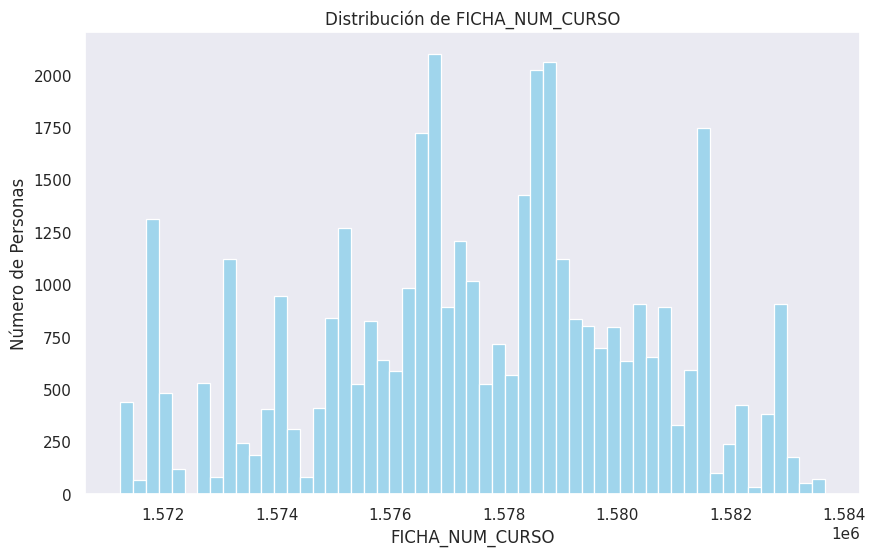

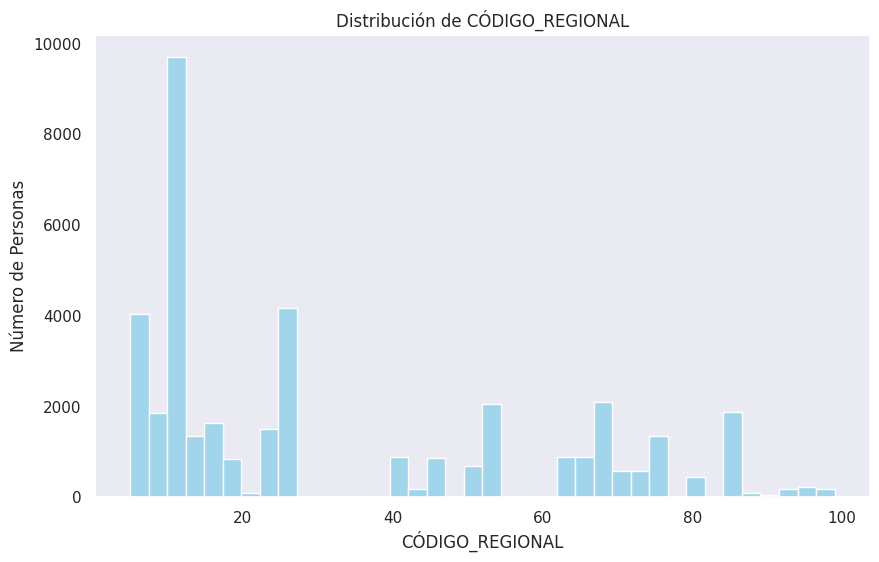

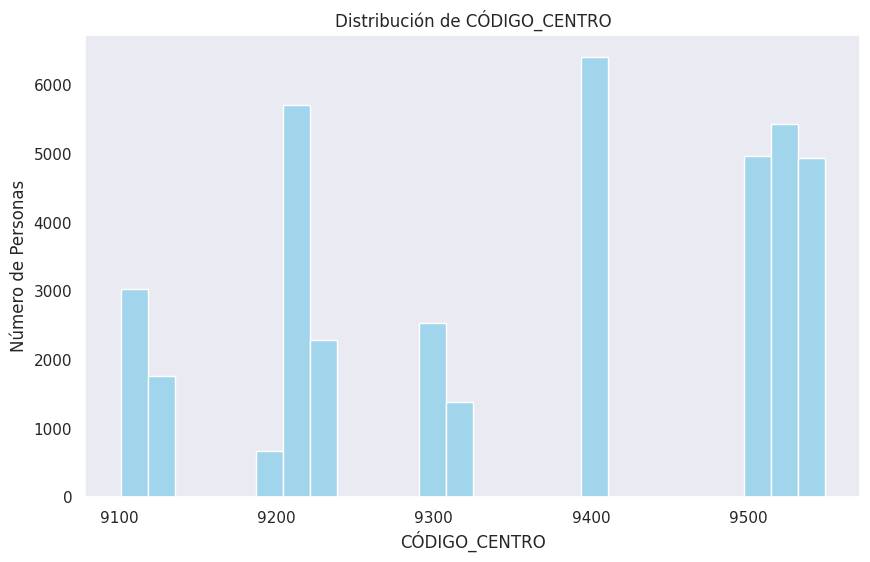

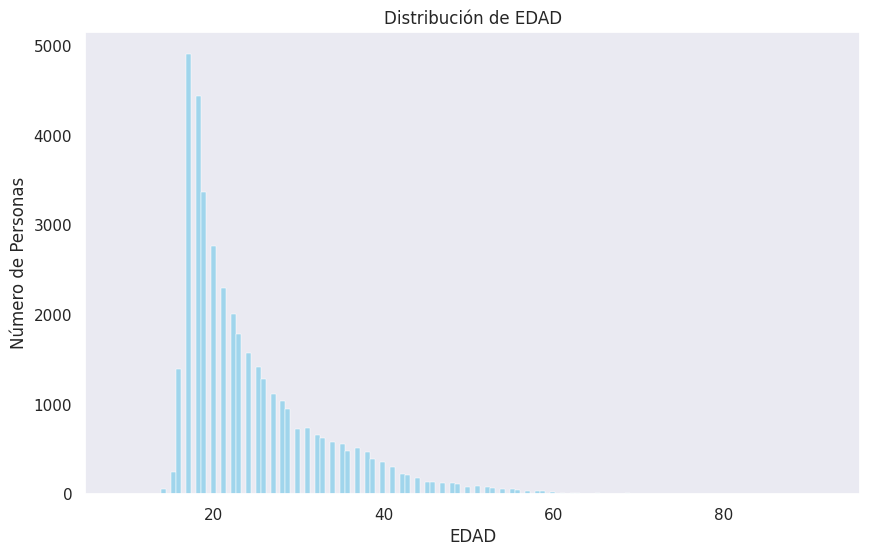

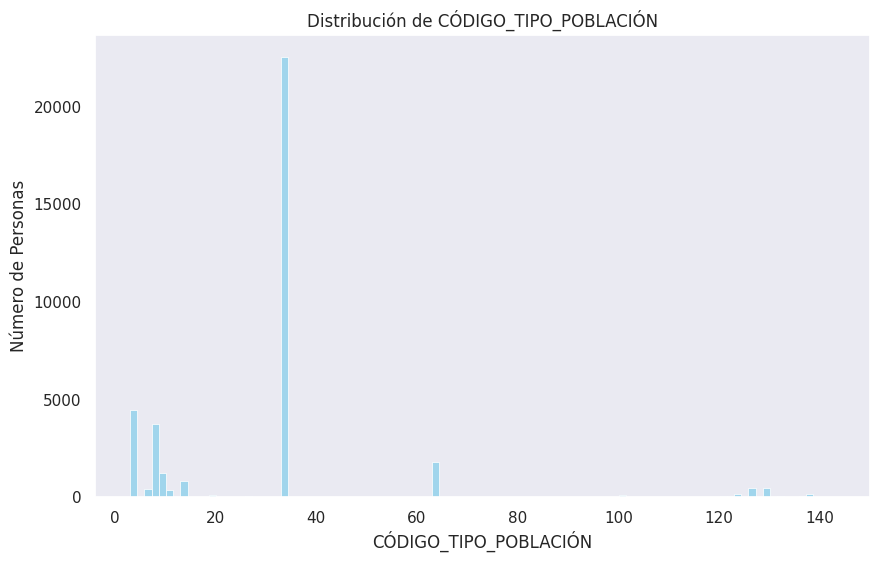

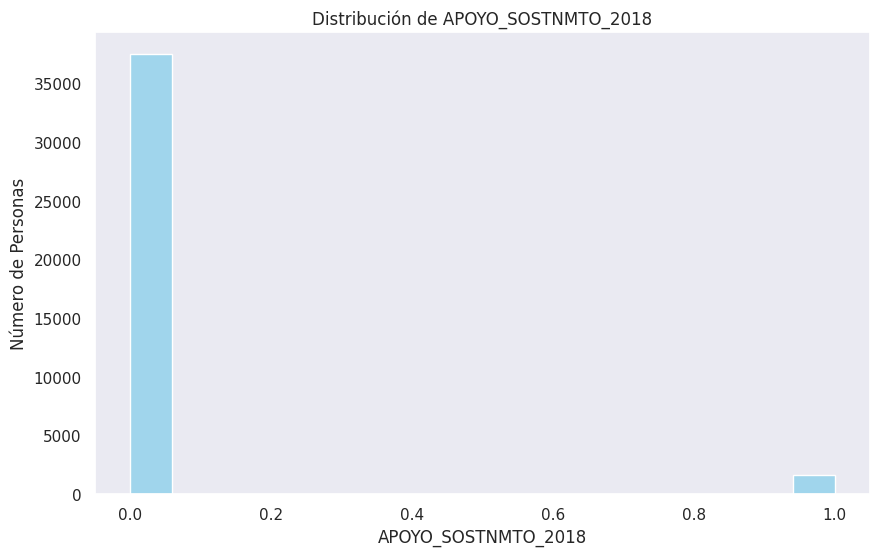

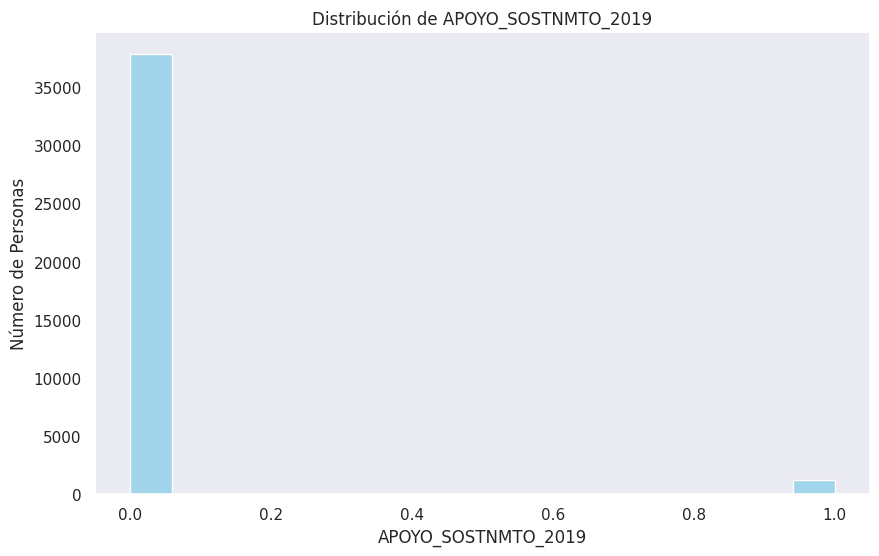

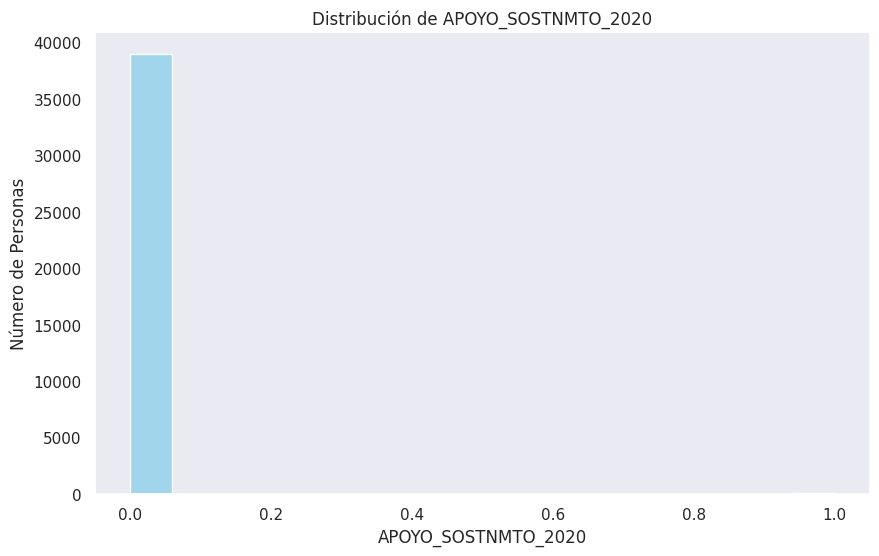

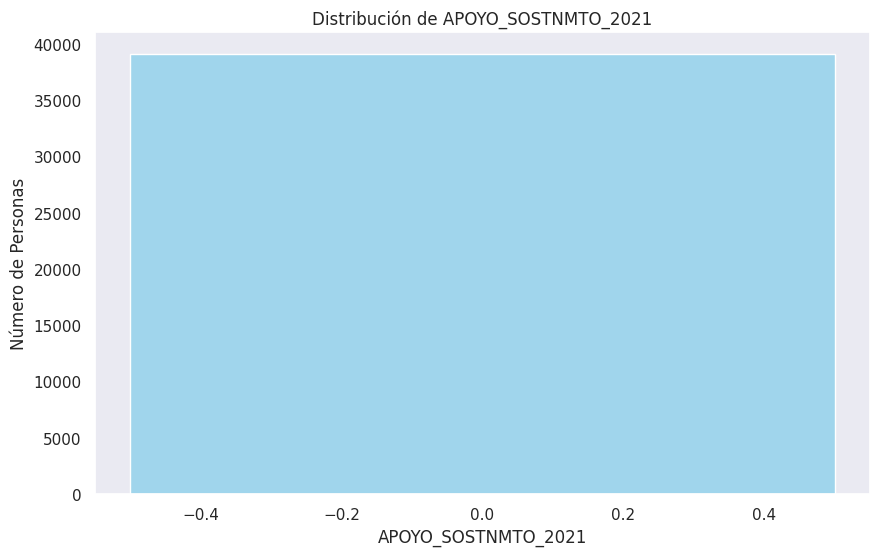

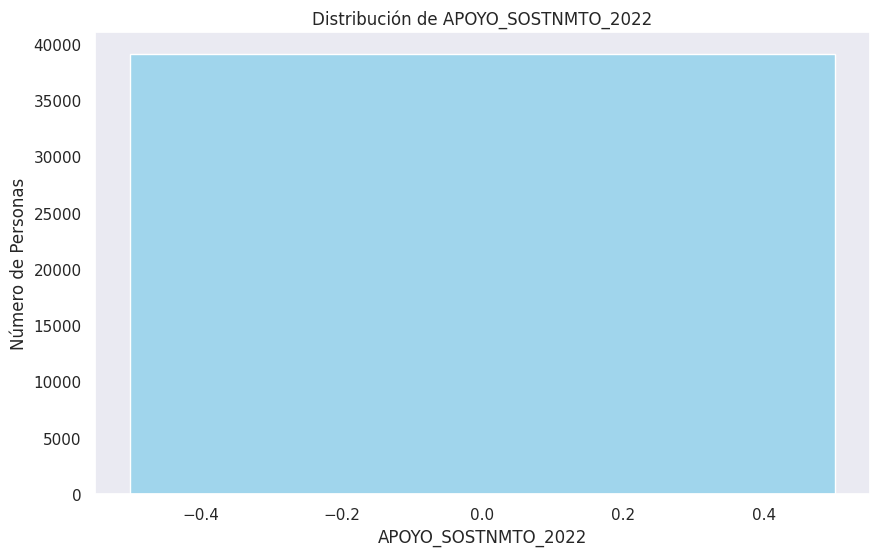

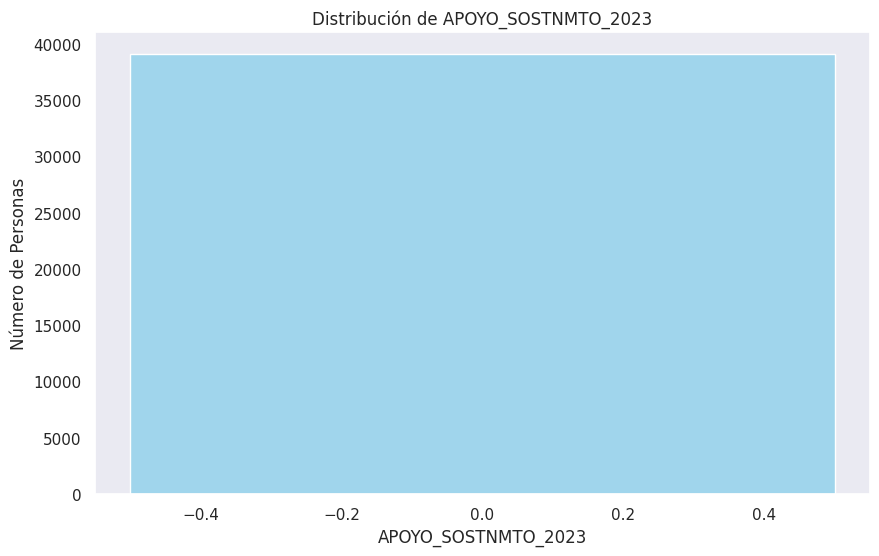

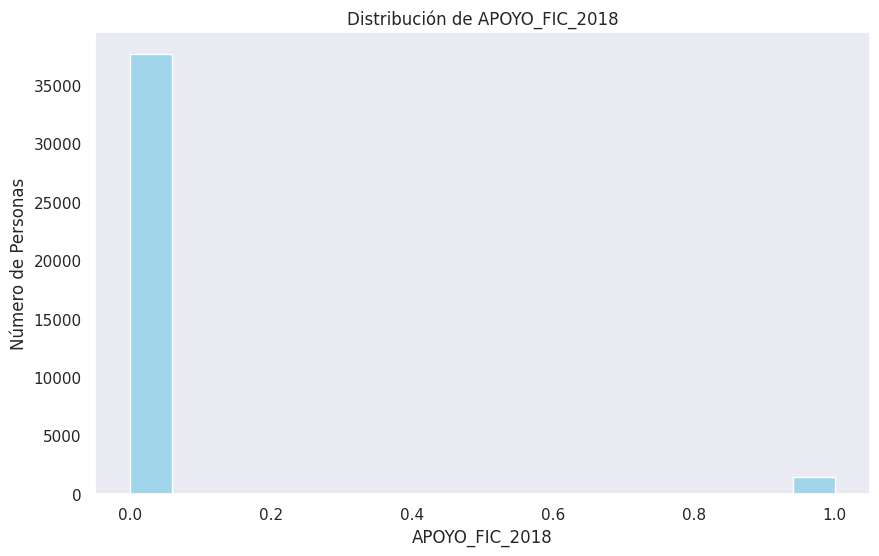

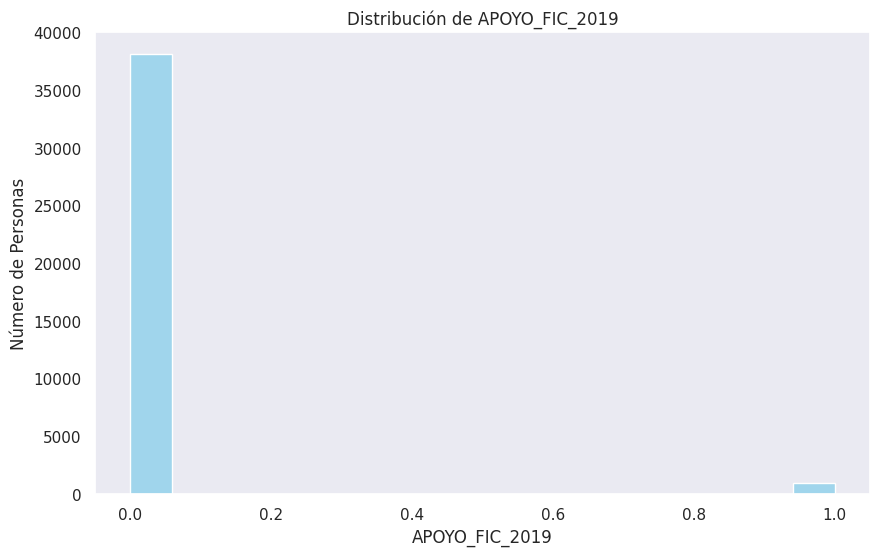

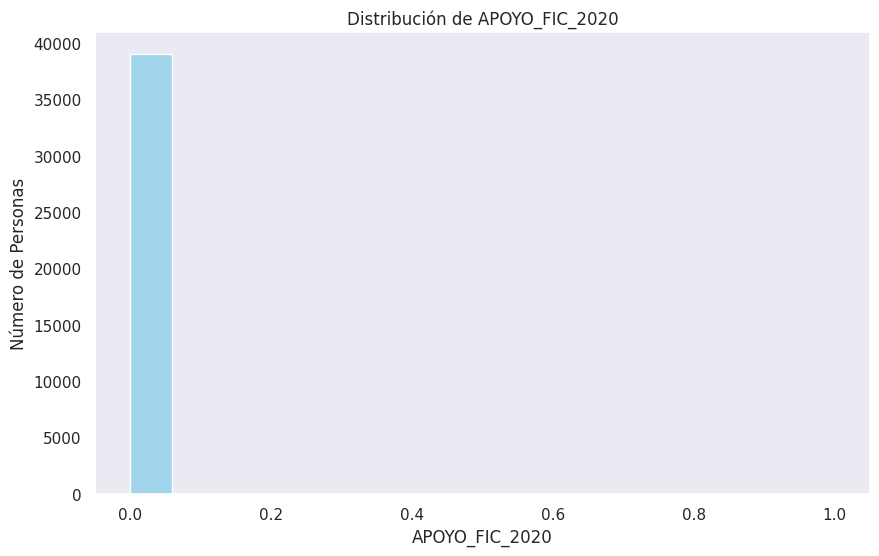

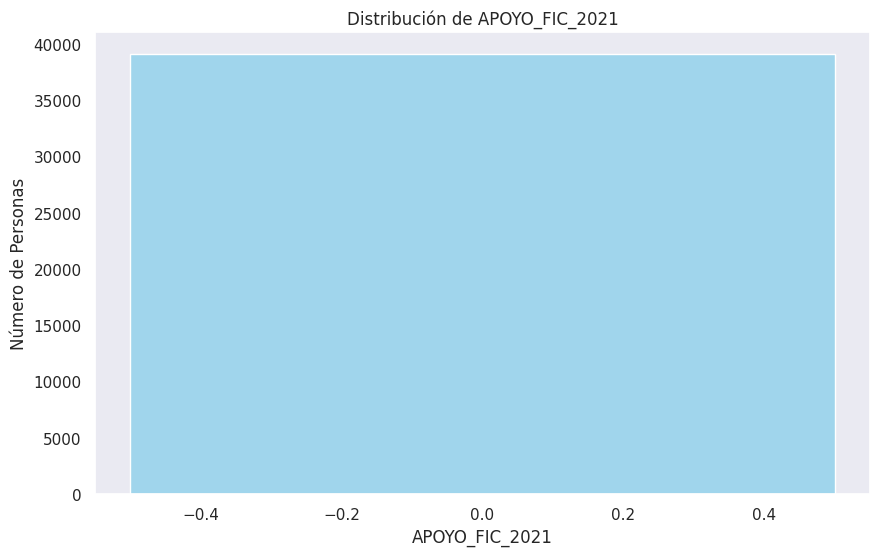

In [ ]:
N_colA
for col in N_colA:
    num_bins=df[col].nunique()
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Personas')
    plt.show()

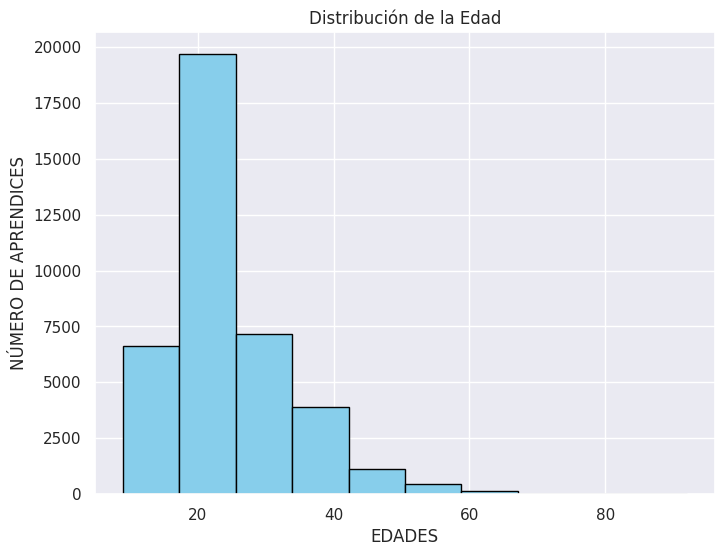

In [ ]:
# Graficar la distribución utilizando Matplotlib
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.hist(df['EDAD'], bins=10, color='skyblue', edgecolor='black')  # Histograma
plt.xlabel('EDADES')  # Etiqueta del eje x
plt.ylabel('NÚMERO DE APRENDICES')  # Etiqueta del eje y
plt.title('Distribución de la Edad')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.show()  # Mostrar la gráfica

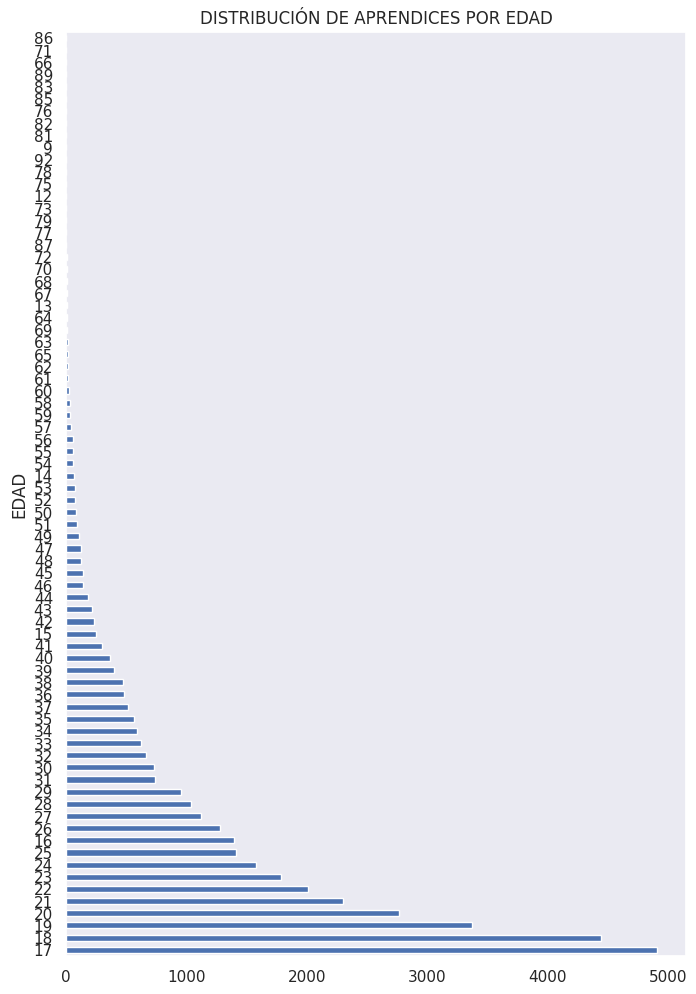

In [ ]:
plt.xlabel("EDAD")
plt.ylabel("CANTIDAD DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR EDAD")
df["EDAD"].value_counts().plot(kind='barh', figsize=(8,12))
plt.show()

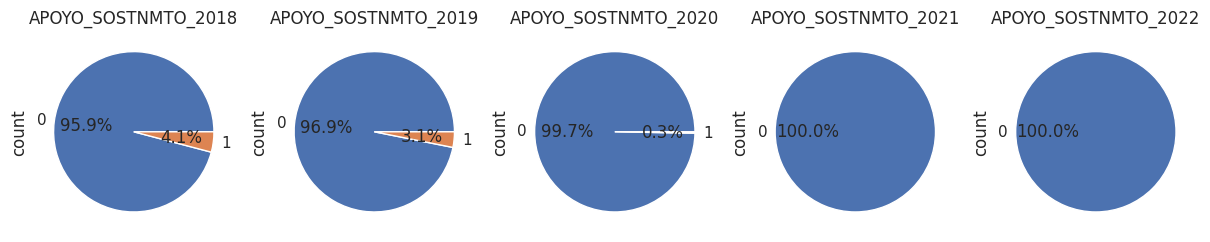

In [ ]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA APOYO_SOSTNMTO

plt.figure(figsize=(15,38))
plt.subplot(1,5,1)
df["APOYO_SOSTNMTO_2018"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_SOSTNMTO_2018")

plt.subplot(1,5,2)
df["APOYO_SOSTNMTO_2019"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_SOSTNMTO_2019")

plt.subplot(1,5,3)
df["APOYO_SOSTNMTO_2020"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_SOSTNMTO_2020")

plt.subplot(1,5,4)
df["APOYO_SOSTNMTO_2021"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_SOSTNMTO_2021")

plt.subplot(1,5,5)
df["APOYO_SOSTNMTO_2022"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_SOSTNMTO_2022")

plt.show()

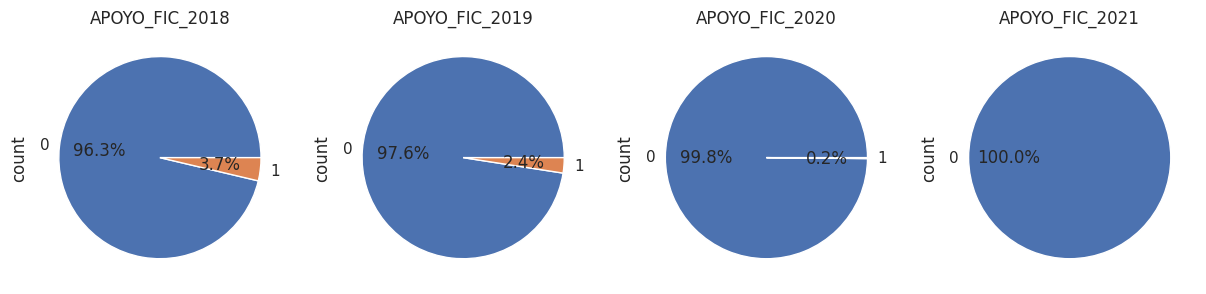

In [ ]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA APOYO_FIC

plt.figure(figsize=(15,38))
plt.subplot(1,4,1)
df["APOYO_FIC_2018"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_FIC_2018")

plt.subplot(1,4,2)
df["APOYO_FIC_2019"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_FIC_2019")

plt.subplot(1,4,3)
df["APOYO_FIC_2020"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_FIC_2020")

plt.subplot(1,4,4)
df["APOYO_FIC_2021"].value_counts().plot(kind="pie", autopct='%1.01f%%')
plt.title("APOYO_FIC_2021")

plt.show()

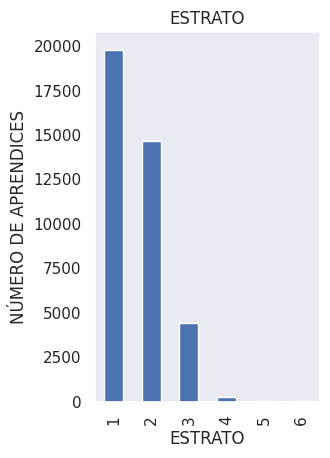

In [ ]:
# INTENTO PARA GENERAR GRAFICA CON PORCENTAJES PARA estrato
estrato = df["ESTRATO"].value_counts()
plt.subplot(1,2,1)
##estrato.plot(kind="pie", autopct='%1.01f%%')
##plt.title("ESTRATO")
#plt.suptitle("suptitle")

plt.subplot(1,2,1)
estrato.plot(kind="bar")
plt.title("ESTRATO")
##plt.suptitle("DISTRIBUCIÓN POR ESTRATO")
##plt.xlabel(col)
plt.ylabel('NÚMERO DE APRENDICES')
plt.show()

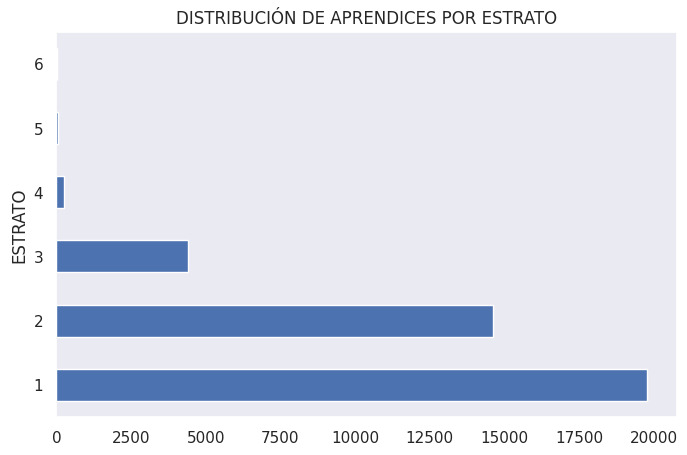

In [ ]:
plt.xlabel("ESTRATO")
plt.ylabel("CANTIDAD DE APRENDICES")
plt.title("DISTRIBUCIÓN DE APRENDICES POR ESTRATO")
df["ESTRATO"].value_counts().plot(kind='barh', figsize=(8,5))
plt.show()

<ipython-input-570-924c8316e60b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='mako_r', ax=ax)
<ipython-input-570-924c8316e60b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='mako_r', ax=ax)
<ipython-input-570-924c8316e60b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette='mako_r', ax=ax)


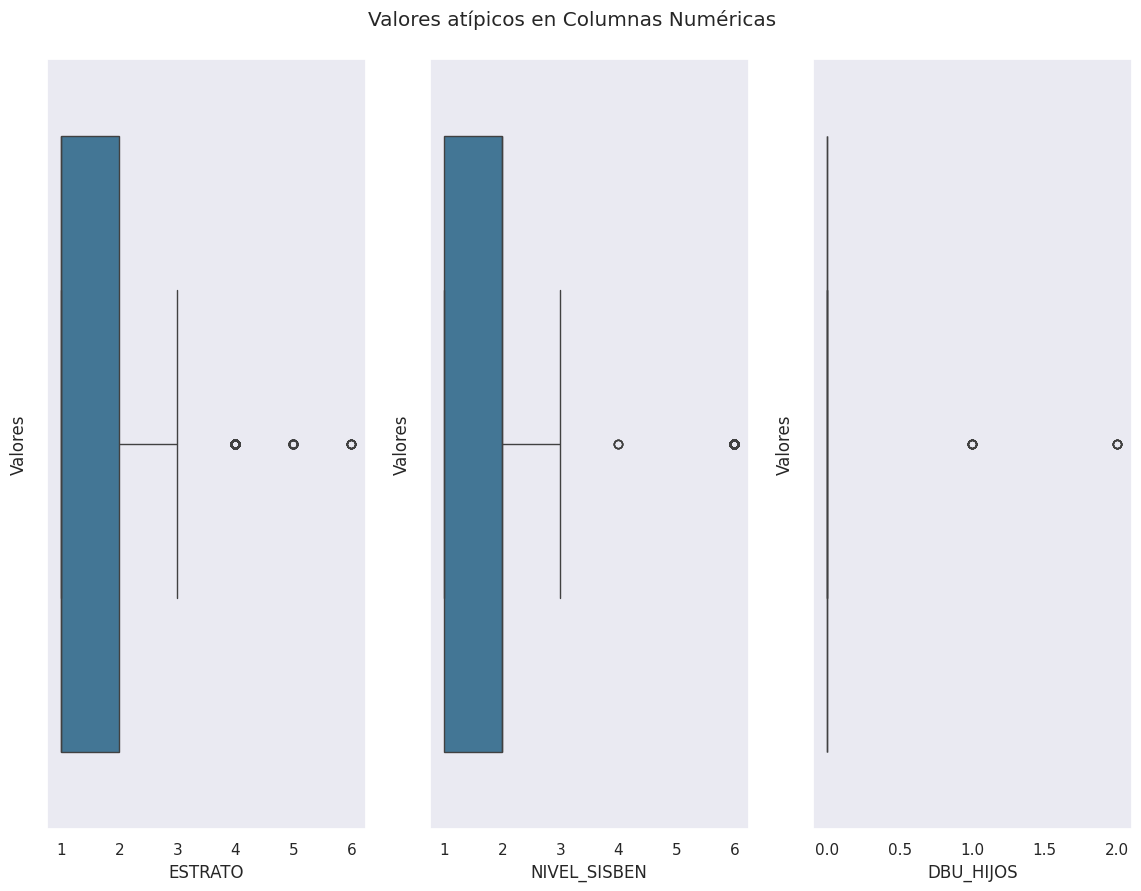

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,10), dpi=100)
fig.suptitle('Valores atípicos en Columnas Numéricas', y = 0.93);
for col, ax in zip(N_colA, axes.ravel()):
    sns.boxplot(data=df, x=col, palette='mako_r', ax=ax)
    ax.set_ylabel('Valores')

ANÁLISIS MULTIVARIADO

GENERO vs RANGO DE EDADES

In [ ]:
pd.crosstab(index=copia_df["GENERO"], columns=copia_df["R_EDAD"], margins=True)

R_EDAD  ADOLESCENCIA  ADULTEZ  JUVENTUD  NIÑEZ  VEJEZ    All
GENERO                                                      
F               5703     3904     10400      1     36  20044
M               5362     3642      9945      0    109  19058
All            11065     7546     20345      1    145  39102

Text(0.5, 1.0, 'DISTRIBUCIÓN DE APRENDICES POR RANGO DE EDAD Y GÉNERO')

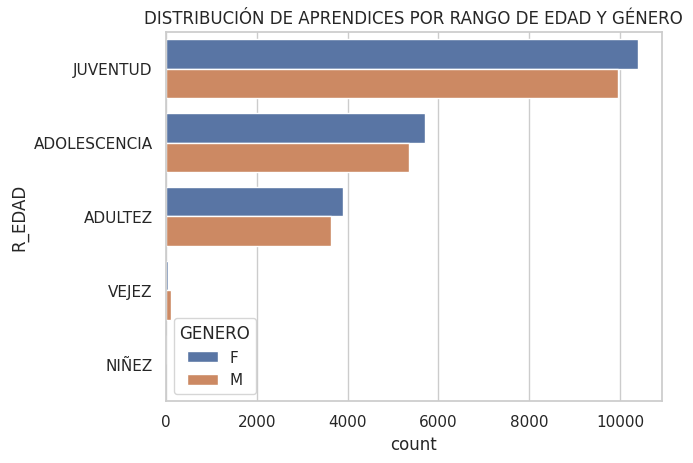

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(y=copia_df["R_EDAD"], hue=copia_df["GENERO"])
ax.set_title("DISTRIBUCIÓN DE APRENDICES POR RANGO DE EDAD Y GÉNERO")

GENERO vs ESTRATO

In [ ]:
pd.crosstab(index=copia_df["GENERO"], columns=copia_df["ESTRATO"], margins=True)

ESTRATO      1      2     3    4   5   6    All
GENERO                                         
F        10687   7212  2025  102  16   2  20044
M         9094   7399  2397  136  22  10  19058
All      19781  14611  4422  238  38  12  39102

Text(0.5, 1.0, 'DISTRIBUCIÓN DE APRENDICES POR ESTRATO Y GÉNERO')

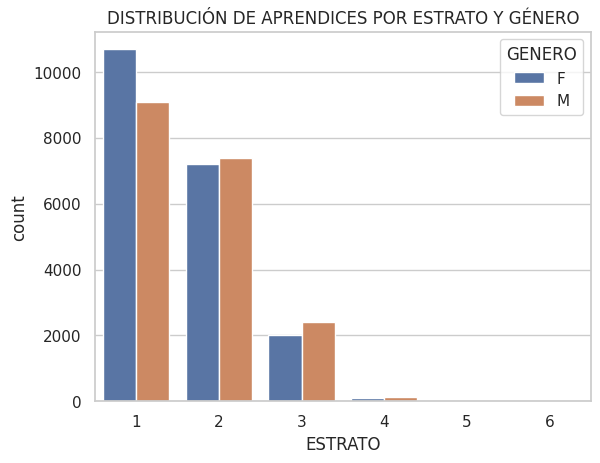

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=copia_df["ESTRATO"], hue=copia_df["GENERO"])
ax.set_title("DISTRIBUCIÓN DE APRENDICES POR ESTRATO Y GÉNERO")

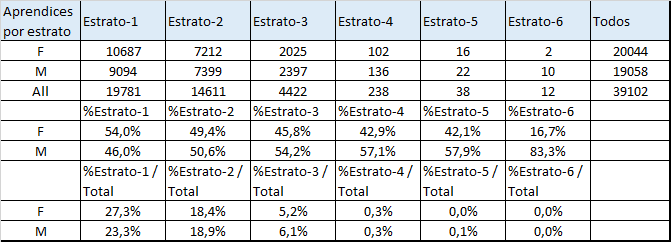